In [ ]:
# %% 

""" Created on February 6, 2023 // Modified May 15, 2025 // @author: Sarah Shi """

import numpy as np
import pandas as pd

import sys
sys.path.append('../src/')
import mineralML as mm

from scipy.stats import ks_2samp

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams.update({
    'xtick.major.size': 4,
    'ytick.major.size': 4,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 12,
    'pdf.fonttype': 42,
    'font.family': 'Avenir',
    'font.size': 12,
    'xtick.direction': 'in',  # Set x-tick direction to 'in'
    'ytick.direction': 'in',  # Set y-tick direction to 'in'
    'xtick.major.size': 5,    # Set x-tick length
    'ytick.major.size': 5,    # Set y-tick length
    'xtick.major.pad': 6.5,   # Set x-tick padding
    'ytick.major.pad': 6.5    # Set y-tick padding
})

In [ ]:
# %% .py for cleaning training dataset, fixing Fe speciation, etc. 

def Fe_Conversion(df):

    """
    Handle inconsistent Fe speciation in PetDB datasets by converting all to FeOt. 

    Parameters
    --------------
    df:class:`pandas.DataFrame`
        Array of oxide compositions.

    Returns
    --------
    df:class:`pandas.DataFrame`
        Array of oxide compositions with corrected Fe.
    """

    fe_conv = 159.688 / (2 * 71.8464)
    conditions = [~np.isnan(df['FeO']) & np.isnan(df['FeOt']) & np.isnan(df['Fe2O3']) & np.isnan([df['Fe2O3t']]),
    ~np.isnan(df['FeOt']) & np.isnan(df['FeO']) & np.isnan(df['Fe2O3']) & np.isnan([df['Fe2O3t']]), 
    ~np.isnan(df['Fe2O3']) & np.isnan(df['Fe2O3t']) & np.isnan(df['FeO']) & np.isnan([df['FeOt']]), # 2
    ~np.isnan(df['Fe2O3t']) & np.isnan(df['Fe2O3']) & np.isnan(df['FeO']) & np.isnan([df['FeOt']]), # 2
    ~np.isnan(df['FeO']) & ~np.isnan(df['Fe2O3']) & np.isnan(df['FeOt']) & np.isnan([df['Fe2O3t']]), # 3
    ~np.isnan(df['FeO']) & ~np.isnan(df['FeOt']) & ~np.isnan(df['Fe2O3']) & np.isnan([df['Fe2O3t']]), # 4
    ~np.isnan(df['FeO']) & ~np.isnan(df['Fe2O3']) & ~np.isnan(df['Fe2O3t']) & np.isnan([df['FeOt']]), # 5
    ~np.isnan(df['FeOt']) & ~np.isnan(df['Fe2O3']) & np.isnan(df['Fe2O3t']) & np.isnan([df['FeO']]), # 6
    ~np.isnan(df['Fe2O3']) & ~np.isnan(df['Fe2O3t']) & np.isnan(df['FeO']) & np.isnan([df['FeOt']]) ] # 7

    choices = [ (df['FeO']), (df['FeOt']),
    (df['Fe2O3']),(df['Fe2O3t']),
    (df['FeO'] + (df['Fe2O3'] / fe_conv)), # 3
    (df['FeOt']), # 4 of interest
    (df['Fe2O3t'] / fe_conv), # 5
    (df['FeOt']), # 6
    (df['Fe2O3t'] / fe_conv) ] # 7

    df.insert(4, 'FeOt_F', np.select(conditions, choices))
    df.drop(['FeOt'], axis=1, inplace=True)
    df.rename(columns={"FeOt_F": "FeOt"}, inplace=True)
    
    return df 


dtypes = {'SiO2': float, 'TiO2': float, 'Al2O3': float, 'FeOt': float, 'Fe2O3t': float, 'FeO': float, 'Fe2O3': float, 
          'MnO': float, 'MgO': float, 'CaO': float, 'Na2O': float, 'K2O': float, 'P2O5': float, 'Cr2O3': float, 'NiO': float, 
          'B2O3': float, 'ZrO2': float}

In [ ]:
# %%

amp_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Amphibole.xlsx', dtype=dtypes)) # 1 
ap_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Apatite.xlsx', dtype=dtypes)) # 2
bt_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Biotite.xlsx', dtype=dtypes)) # 3
cal_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Calcite.xlsx', dtype=dtypes)) # 4
chl_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Chlorite.xlsx', dtype=dtypes)) # 5
cpx_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Clinopyroxene.xlsx', dtype=dtypes)) # 6
ep_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Epidote.xlsx', dtype=dtypes)) # 7
gt_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Garnet.xlsx', dtype=dtypes)) # 8
hem_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Hematite.xlsx', dtype=dtypes)) # 9
ilm_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Ilmenite.xlsx', dtype=dtypes)) # 10
ks_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Kalsilite.xlsx', dtype=dtypes)) # 11
ksp_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/KFeldspar.xlsx', dtype=dtypes)) # 12
lc_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Leucite.xlsx', dtype=dtypes)) # 13
mt_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Magnetite.xlsx', dtype=dtypes)) # 14
ml_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Melilite.xlsx', dtype=dtypes)) # 15
ms_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Muscovite.xlsx', dtype=dtypes)) # 16
ne_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Nepheline.xlsx', dtype=dtypes)) # 17
ol_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Olivine.xlsx', dtype=dtypes)) # 18
opx_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Orthopyroxene.xlsx', dtype=dtypes)) # 19
pl_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Plagioclase.xlsx', dtype=dtypes)) # 20
qz_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Quartz.xlsx', dtype=dtypes)) # 21
rt_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Rutile.xlsx', dtype=dtypes)) # 22
srp_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Serpentine.xlsx', dtype=dtypes)) # 23
sp_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Spinel.xlsx', dtype=dtypes)) # 24
tit_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Titanite.xlsx', dtype=dtypes)) # 25
trm_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Tourmaline.xlsx', dtype=dtypes)) # 26
zr_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Zircon.xlsx', dtype=dtypes)) # 27
gl_df = Fe_Conversion(pd.read_excel('../Training_Data/Mineral/Glass_withMI.xlsx', dtype=dtypes)) # 28

min_df_all = pd.concat([amp_df, ap_df, bt_df, cal_df, chl_df, cpx_df, ep_df, gt_df, hem_df,                        
                        ilm_df, ks_df, ksp_df, lc_df, mt_df, ml_df, ms_df, ne_df, ol_df, 
                        opx_df, pl_df, qz_df, rt_df, srp_df, sp_df, tit_df, trm_df, zr_df, gl_df], axis = 0)

min_df_work = min_df_all[['Sample Name', 'SiO2', 'TiO2', 'Al2O3', 'FeOt', 'MnO',
                          'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'Cr2O3', 'NiO', 'B2O3', 'ZrO2', 'Total', 
                          'Tectonic Setting', 'Mineral', 'Sample Type', 'Volcano', 'Source']]

min_df = min_df_work.copy()
min_df.rename(columns={"FeOt_F": "FeOt"}, inplace=True)

min_df.to_csv('../Training_Data/min_df_v2.csv', index=False)
constants = ['Sample Name', 'Total', 'Tectonic Setting', 'Mineral', 'Sample Type', 'Volcano', 'Source']

# min_df = pd.read_csv('../Training_Data/min_df_v2.csv') 

Sample Name     SiO2    TiO2    Al2O3     FeOt     MnO      MgO  \
0                  Z2099  42.9600  1.8000  14.3300   4.0700  0.0700  17.3900   
1                  Z2070  43.0300  2.3900  13.3500   4.0900  0.0600  17.0100   
2                  Z2073  42.9500  3.0200  14.1200   4.3500  0.0600  17.5300   
3                  Z2067  43.0100  4.6500  12.8300   4.3900  0.0700  17.1400   
4                  Z2068  42.1300  4.8700  12.1500   4.0800  0.0500  16.4200   
...                  ...      ...     ...      ...      ...     ...      ...   
3461  REG51_amphibole_35  55.6188  0.0526   0.6203  11.1573  0.7922  17.1157   
3462  REG51_amphibole_36  55.6349  0.0035   0.7572  10.5723  0.6991  17.6121   
3463  REG51_amphibole_37  55.7980  0.0074   0.3285  12.6749  0.8947  16.0922   
3464  REG51_amphibole_38  55.8905  0.0297   0.3956  13.7177  0.8454  15.6072   
3465  REG51_amphibole_39  56.5229  0.0078   0.1845   7.4194  2.2041  18.2617   

          CaO    Na2O     K2O  ...  Ca_B_leake  Na_A_leake  K_A_leake  \
0     12.0300  3.1000  0.0300  ...    1.852453    0.809713   0.005500   
1     11.7100  2.9700  0.0500  ...    1.821520    0.720434   0.009260   
2     12.0200  3.0400  0.0700  ...    1.828432    0.767548   0.012678   
3     12.1400  2.8800  0.0300  ...    1.848995    0.660636   0.005440   
4     11.8900  2.7500  0.0200  ...    1.855440    0.631994   0.003716   
...       ...     ...     ...  ...         ...         ...        ...   
3461   9.1263  2.6975  0.7157  ...    1.398821    0.294437   0.130612   
3462   9.5506  2.4405  0.6715  ...    1.458748    0.280661   0.122118   
3463   6.8076  4.1030  0.5677  ...    1.053990    0.367975   0.104652   
3464   6.8562  3.8343  0.5613  ...    1.059970    0.318909   0.103321   
3465  12.0524  0.8949  0.2080  ...    1.826585    0.092173   0.037533   

      Ca_A_leake  Sum_T_leake  Sum_C_leake  Sum_B_leake  Sum_A_leake  \
0            0.0     8.000000     4.805192          2.0     0.815213   
1            0.0     8.000000     4.738708          2.0     0.729694   
2            0.0     8.000000     4.677126          2.0     0.780226   
3            0.0     8.000000     4.502238          2.0     0.666076   
4            0.0     8.000000     4.434863          2.0     0.635710   
...          ...          ...          ...          ...          ...   
3461         0.0     8.000000     4.994334          2.0     0.425049   
3462         0.0     8.000000     4.999624          2.0     0.402779   
3463         0.0     8.062842     4.999195          2.0     0.472627   
3464         0.0     8.064453     4.996773          2.0     0.422231   
3465         0.0     8.000000     4.999169          2.0     0.129706   

      Cation_Sum_leake  Mgno_leake  
0            15.620406    0.883944  
1            15.468402    0.881146  
2            15.457352    0.877805  
3            15.168314    0.874369  
4            15.070574    0.877662  
...                ...         ...  
3461         15.419382    0.732231  
3462         15.402403    0.748084  
3463         15.534663    0.693553  
3464         15.483456    0.669763  
3465         15.128875    0.814388  

[3466 rows x 132 columns]

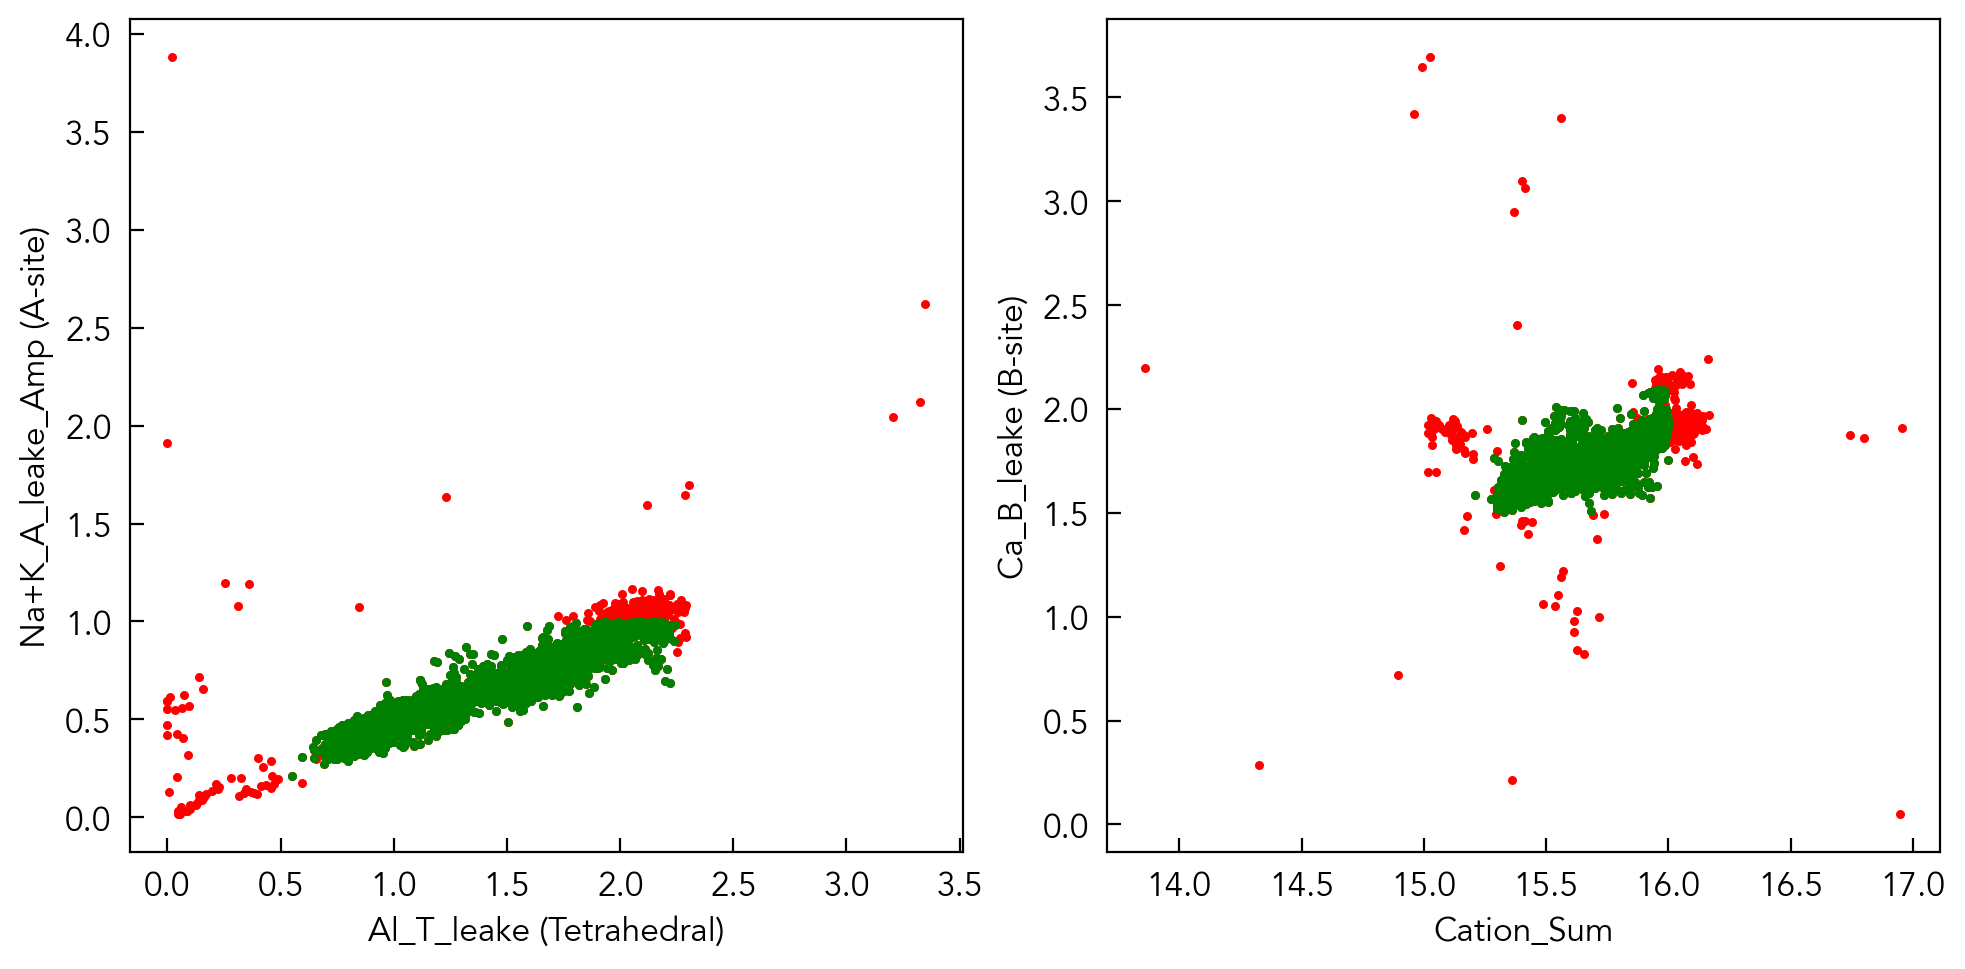

In [ ]:
# %% 

amp_calc = mm.AmphiboleCalculator(min_df[min_df.Mineral=='Amphibole']) # [['SiO2', 'TiO2', 'Al2O3', 'FeOt', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'Cr2O3']])
amp_comp = amp_calc.calculate_components()
display(amp_comp)

amp_comp_filt = amp_comp.loc[((amp_comp['Cation_Sum'].between(15, 16)) & 
                              (amp_comp['Ca_B_leake'].between(1.5, 2.1)) & 
                              (amp_comp['Al_T_leake'].between(0.5, 2.25)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
# Blundy and Holland, 1990 plot A_site v. Al_IV and Al_VI v. Al_IV
ax[0].scatter(amp_comp['Al_T_leake'], amp_comp['Na_A_leake'] + amp_comp['K_A_leake'], s = 5, color = 'r')
ax[0].scatter(amp_comp_filt['Al_T_leake'], amp_comp_filt['Na_A_leake'] + amp_comp_filt['K_A_leake'], s = 5, color = 'g')
ax[0].set_xlabel('Al_T_leake (Tetrahedral)')
ax[0].set_ylabel('Na+K_A_leake_Amp (A-site)')
ax[1].scatter(amp_comp['Cation_Sum'], amp_comp['Ca_B_leake'], s = 5, color = 'r')
ax[1].scatter(amp_comp_filt['Cation_Sum'], amp_comp_filt['Ca_B_leake'], s = 5, color = 'g')
ax[1].set_xlabel('Cation_Sum')
ax[1].set_ylabel('Ca_B_leake (B-site)')
plt.tight_layout()

Sample Name      SiO2      TiO2     Al2O3      FeOt  \
0                     SG-09-32_12  0.170000       NaN       NaN  0.700000   
1                     SG-09-32_23  0.140000       NaN       NaN  0.610000   
2                     SG-09-32_32  0.240000       NaN       NaN  0.560000   
3                      2006-69_65  0.130000       NaN       NaN  0.450000   
4                      2006-69_70  0.200000       NaN       NaN  0.740000   
...                           ...       ...       ...       ...       ...   
2161    Ny17-054_054-Ap-1:15_1431  0.842241  0.033271  0.020773  0.010272   
2162  Smithsonian_Fapatite-5_1461  0.392606       NaN  0.005677  0.039193   
2163  Smithsonian_Fapatite-5_1462  0.387794  0.011623  0.029260  0.033770   
2164  Smithsonian_Fapatite-6_1514  0.343170       NaN       NaN  0.039163   
2165  Smithsonian_Fapatite-6_1515  0.354271       NaN       NaN  0.015667   

           MnO       MgO        CaO      Na2O       K2O  ...  Na_cat_13ox  \
0          NaN  0.130000  54.320000       NaN       NaN  ...     0.000000   
1          NaN  0.200000  53.520000       NaN       NaN  ...     0.000000   
2          NaN  0.210000  53.530000       NaN       NaN  ...     0.000000   
3          NaN  0.240000  53.670000       NaN       NaN  ...     0.000000   
4          NaN  0.230000  53.860000       NaN       NaN  ...     0.000000   
...        ...       ...        ...       ...       ...  ...          ...   
2161  0.014425  0.031751  54.489765  0.001269  0.000291  ...     0.000220   
2162       NaN  0.031592  53.964800  0.285310  0.002916  ...     0.049321   
2163  0.016358  0.020995  54.335100  0.273718       NaN  ...     0.047335   
2164  0.026673  0.022142  54.260000  0.282028  0.000291  ...     0.048776   
2165       NaN  0.013649  54.199300  0.261331  0.005197  ...     0.045337   

      K_cat_13ox  P_cat_13ox  Cr_cat_13ox  Mineral             Source  \
0       0.000000    3.087682          0.0  Apatite      Scottetal2015   
1       0.000000    3.110839          0.0  Apatite      Scottetal2015   
2       0.000000    3.091591          0.0  Apatite      Scottetal2015   
3       0.000000    3.059285          0.0  Apatite      Scottetal2015   
4       0.000000    3.093596          0.0  Apatite      Scottetal2015   
...          ...         ...          ...      ...                ...   
2161    0.000033    3.046346          0.0  Apatite  Molendijketal2024   
2162    0.000332    3.096743          0.0  Apatite  Molendijketal2024   
2163    0.000000    3.080748          0.0  Apatite  Molendijketal2024   
2164    0.000033    3.088263          0.0  Apatite  Molendijketal2024   
2165    0.000593    3.085780          0.0  Apatite  Molendijketal2024   

      Cation_Sum    M_site    T_site      Ca_P  
0       8.353343  5.181161  3.102816  8.268844  
1       8.321227  5.125626  3.123353  8.236466  
2       8.341031  5.157593  3.113173  8.249184  
3       8.399179  5.260841  3.071178  8.320126  
4       8.341776  5.144614  3.111426  8.238210  
...          ...       ...       ...       ...  
2161    8.351975  5.220869  3.121644  8.265903  
2162    8.344409  5.204611  3.131748  8.252033  
2163    8.365639  5.241135  3.115336  8.273313  
2164    8.361400  5.236627  3.118873  8.274099  
2165    8.362596  5.241530  3.117479  8.281973  

[2166 rows x 51 columns]

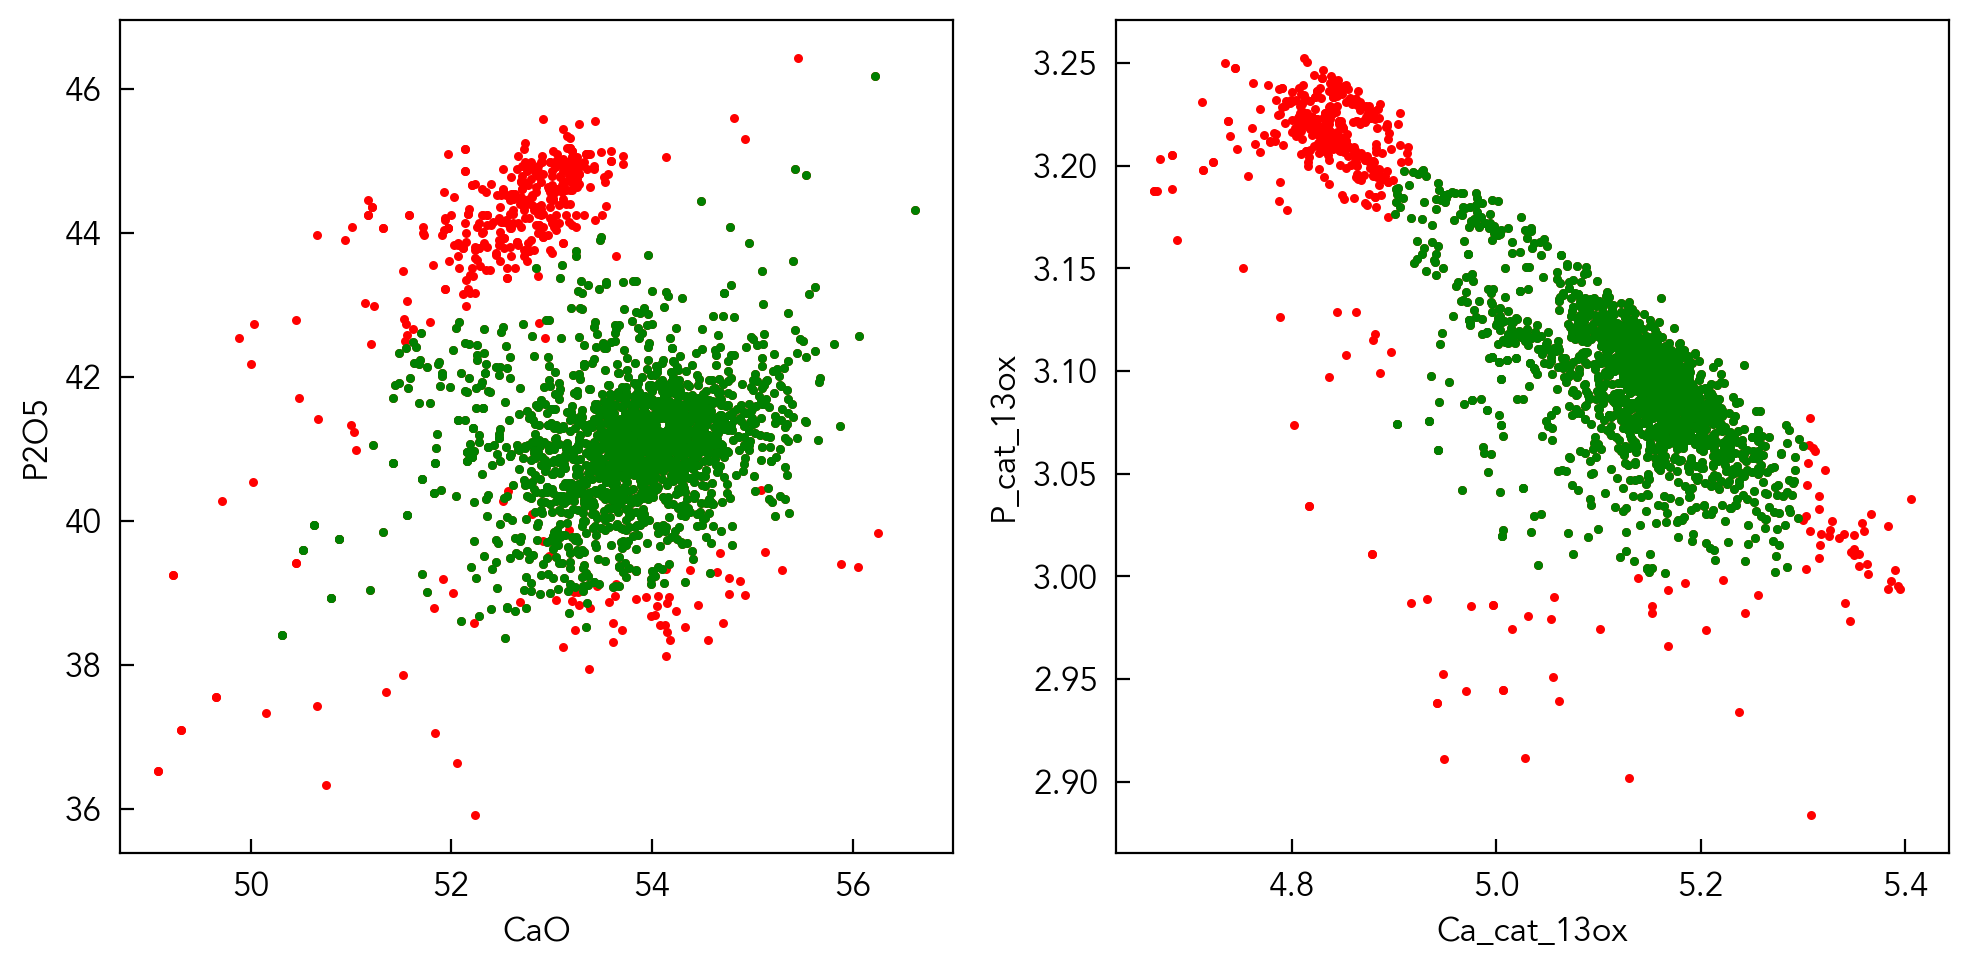

In [ ]:
# %% 

ap_calc = mm.ApatiteCalculator(min_df[min_df.Mineral=='Apatite'])
ap_comp = ap_calc.calculate_components()
display(ap_comp)

ap_comp_filt = ap_comp.loc[((ap_comp.Ca_cat_13ox.between(4.9, 5.3)) & (ap_comp.P_cat_13ox.between(3, 3.2)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(ap_comp['CaO'], ap_comp['P2O5'], s = 5, color = 'r')
ax[0].scatter(ap_comp_filt['CaO'], ap_comp_filt['P2O5'], s = 5, color = 'g')
ax[0].set_xlabel('CaO')
ax[0].set_ylabel('P2O5')
ax[1].scatter(ap_comp['Ca_cat_13ox'], ap_comp['P_cat_13ox'], s = 5, color = 'r')
ax[1].scatter(ap_comp_filt['Ca_cat_13ox'], ap_comp_filt['P_cat_13ox'], s = 5, color = 'g')
ax[1].set_xlabel('Ca_cat_13ox')
ax[1].set_ylabel('P_cat_13ox')
plt.tight_layout()

Sample Name   SiO2  TiO2  Al2O3   FeOt     MnO    MgO     CaO    Na2O  \
0         IgnA_2  36.90  2.31  16.40   8.20  0.0800  20.60  0.0300  0.7100   
1         IgnA_3  38.40  2.61  17.00   8.40  0.0600  20.00  0.0100  0.6900   
2        IgnA_16  37.40  2.30  16.78   7.50  0.0500  20.50     NaN  0.7000   
3        IgnA_18  37.80  2.26  17.40   7.50  0.0500  18.60  0.0100  0.6500   
4        IgnA_22  36.50  2.57  17.50   8.70  0.0600  19.80  0.0100  0.6600   
...          ...    ...   ...    ...    ...     ...    ...     ...     ...   
3770   CAP6_32-2  37.37  3.99  13.55  17.96  0.1819  11.16  0.2094  0.4159   
3771   CAP6_32-3  37.47  3.82  13.40  18.03  0.1417  10.79  0.2545  0.4142   
3772  CAP6_33-1   37.87  3.93  13.57  17.80  0.1191  11.43  0.1958  0.3183   
3773   CAP6_33-2  38.10  3.86  13.58  18.16  0.1793  10.91  0.2156  0.2855   
3774   CAP6_33-3  38.77  3.74  13.97  17.78  0.1578  10.37  0.2154  0.3373   

       K2O  ...  K_cat_11ox  P_cat_11ox  Cr_cat_11ox  Mineral  \
0     8.79  ...    0.820470         0.0     0.005206  Biotite   
1     9.00  ...    0.819412         0.0     0.001693  Biotite   
2     8.91  ...    0.827133         0.0     0.000000  Biotite   
3     8.88  ...    0.830133         0.0     0.000000  Biotite   
4     9.10  ...    0.845100         0.0     0.000000  Biotite   
...    ...  ...         ...         ...          ...      ...   
3770  6.96  ...    0.689848         0.0     0.000000  Biotite   
3771  6.87  ...    0.685084         0.0     0.000000  Biotite   
3772  6.89  ...    0.678089         0.0     0.000000  Biotite   
3773  6.93  ...    0.682197         0.0     0.000000  Biotite   
3774  6.67  ...    0.653888         0.0     0.000000  Biotite   

                  Source  Cation_Sum    X_site    M_site  M_site_expanded  \
0     Lacalamitaetal2011    7.923745  0.923543  2.748684         2.880919   
1     Lacalamitaetal2011    7.860857  0.915654  2.629190         2.773087   
2     Lacalamitaetal2011    7.895853  0.925893  2.680240         2.809357   
3     Lacalamitaetal2011    7.815237  0.923268  2.491493         2.619308   
4     Lacalamitaetal2011    7.920472  0.939033  2.678373         2.822958   
...                  ...         ...       ...       ...              ...   
3770    Roveratoetal2024    7.619021  0.769930  2.459521         2.704936   
3771    Roveratoetal2024    7.602865  0.769174  2.435995         2.670240   
3772    Roveratoetal2024    7.596150  0.741882  2.462886         2.698979   
3773    Roveratoetal2024    7.580672  0.742737  2.426921         2.662941   
3774    Roveratoetal2024    7.523722  0.721878  2.330604         2.557304   

        T_site  
0     4.114077  
1     4.170423  
2     4.160603  
3     4.272660  
4     4.158481  
...        ...  
3770  4.144155  
3771  4.163451  
3772  4.155289  
3773  4.174994  
3774  4.244540  

[3775 rows x 52 columns]

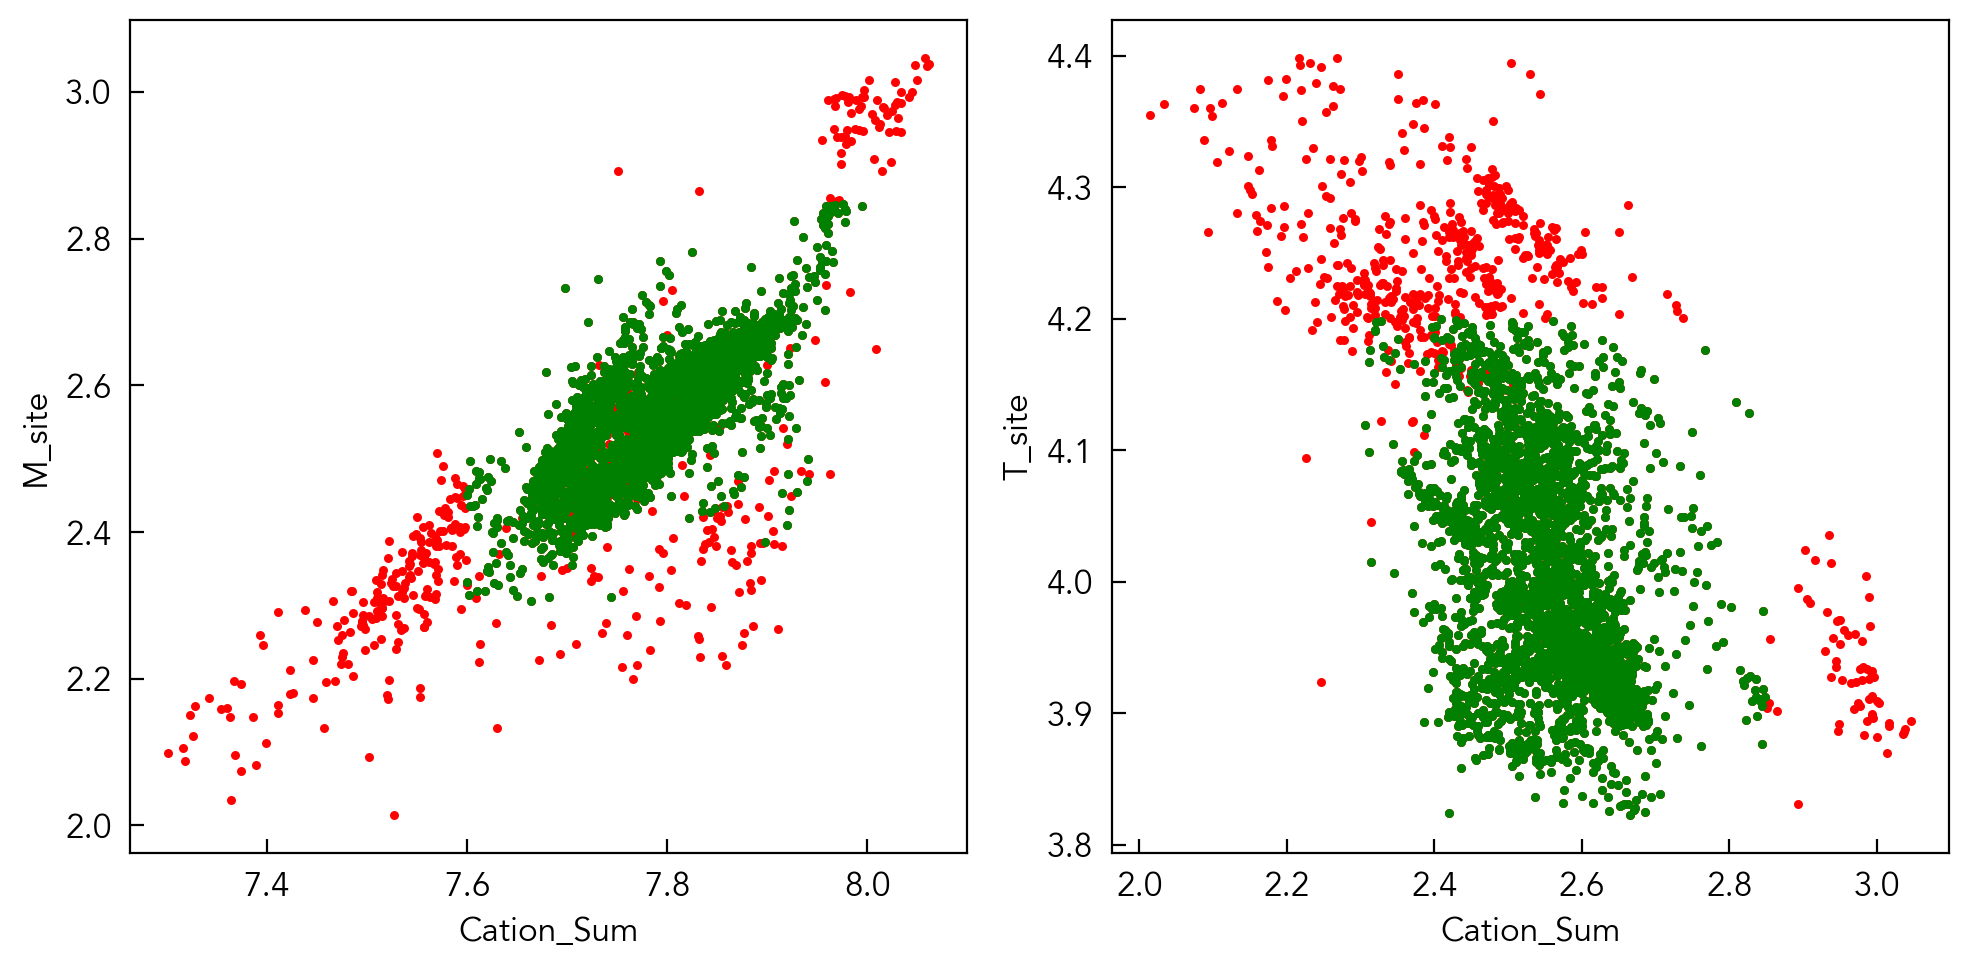

In [ ]:
# %%

bt_calc = mm.BiotiteCalculator(min_df[min_df.Mineral=='Biotite'])
bt_comp = bt_calc.calculate_components()
display(bt_comp)

bt_comp_filt = bt_comp.loc[((bt_comp.Cation_Sum.between(7.6, 8.1)) & (bt_comp.M_site.between(2.25, 2.85)) & (bt_comp.T_site.between(3.8, 4.2)) )]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(bt_comp['Cation_Sum'], bt_comp['M_site'], s = 5, color = 'r')
ax[0].scatter(bt_comp_filt['Cation_Sum'], bt_comp_filt['M_site'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('M_site')
ax[1].scatter(bt_comp['M_site'], bt_comp['T_site'], s = 5, color = 'r')
ax[1].scatter(bt_comp_filt['M_site'], bt_comp_filt['T_site'], s = 5, color = 'g')
ax[1].set_xlabel('Cation_Sum')
ax[1].set_ylabel('T_site')
plt.tight_layout()

Sample Name    SiO2    TiO2  Al2O3    FeOt     MnO     MgO  \
0      REG55_calcite_1  0.0000  0.0000   0.00  0.0700  0.0457  0.0526   
1      REG55_calcite_2  0.0000  0.0000   0.00  0.0402  0.0259  0.0509   
2      REG55_calcite_3  0.0000  0.0000   0.00  0.0058  0.0706  0.0537   
3      REG55_calcite_4  0.0172  0.0259   0.00  0.0163  0.0280  0.0525   
4     DVK_CD_01\n_In01     NaN     NaN    NaN  0.0200  0.0890  0.2270   
...                ...     ...     ...    ...     ...     ...     ...   
1030               6_2  0.0900     NaN   0.16  0.0300     NaN  0.6400   
1031               6_3  0.0300     NaN   0.07  0.0000     NaN  0.6900   
1032               6_4  0.0200     NaN   0.02  0.0500     NaN  0.6800   
1033               6_5  0.3700     NaN   0.29  0.1000     NaN  0.6600   
1034               6_6  0.2100     NaN   0.10  0.0300     NaN  2.7600   

          CaO    Na2O     K2O  ...  K_cat_3ox  P_cat_3ox  Cr_cat_3ox  \
0     57.0312  0.0046  0.0216  ...   0.000449        0.0    0.002264   
1     56.5207  0.0000  0.0440  ...   0.000924        0.0    0.000975   
2     56.6687  0.0078  0.0105  ...   0.000220        0.0    0.001657   
3     62.3095  0.0000  0.0387  ...   0.000737        0.0    0.001975   
4     55.8100     NaN     NaN  ...   0.000000        0.0    0.000000   
...       ...     ...     ...  ...        ...        ...         ...   
1030  55.6000  0.0000  0.0000  ...   0.000000        0.0    0.000000   
1031  55.9200  0.0000  0.0000  ...   0.000000        0.0    0.000000   
1032  54.9900  0.0200  0.0000  ...   0.000000        0.0    0.000000   
1033  54.2300  0.0400  0.0200  ...   0.000428        0.0    0.000000   
1034  51.7300  0.0200  0.0000  ...   0.000000        0.0    0.000000   

      C_cat_3ox  Mineral              Source  Cation_Sum    M_site  \
0      0.998769  Calcite         Beaetal2014    1.001627  0.995906   
1      0.999358  Calcite         Beaetal2014    1.001258  0.997194   
2      0.999093  Calcite         Beaetal2014    1.001219  0.996718   
3      0.998524  Calcite         Beaetal2014    1.001784  0.996798   
4      1.000000  Calcite  Bussweileretal2016    1.000000  0.992852   
...         ...      ...                 ...         ...       ...   
1030   0.997458  Calcite     Coppolaetal2021    1.002047  0.981329   
1031   0.998996  Calcite     Coppolaetal2021    1.000840  0.982135   
1032   0.999474  Calcite     Coppolaetal2021    1.000846  0.981883   
1033   0.992707  Calcite     Coppolaetal2021    1.006377  0.974797   
1034   0.996564  Calcite     Coppolaetal2021    1.002698  0.927306   

      M_site_expanded    C_site  
0            0.998769  0.998769  
1            0.999358  0.999358  
2            0.999093  0.999093  
3            0.998524  0.998524  
4            1.000000  1.000000  
...               ...       ...  
1030         0.997458  0.997458  
1031         0.998996  0.998996  
1032         0.999474  0.999474  
1033         0.992707  0.992707  
1034         0.996564  0.996564  

[1035 rows x 55 columns]

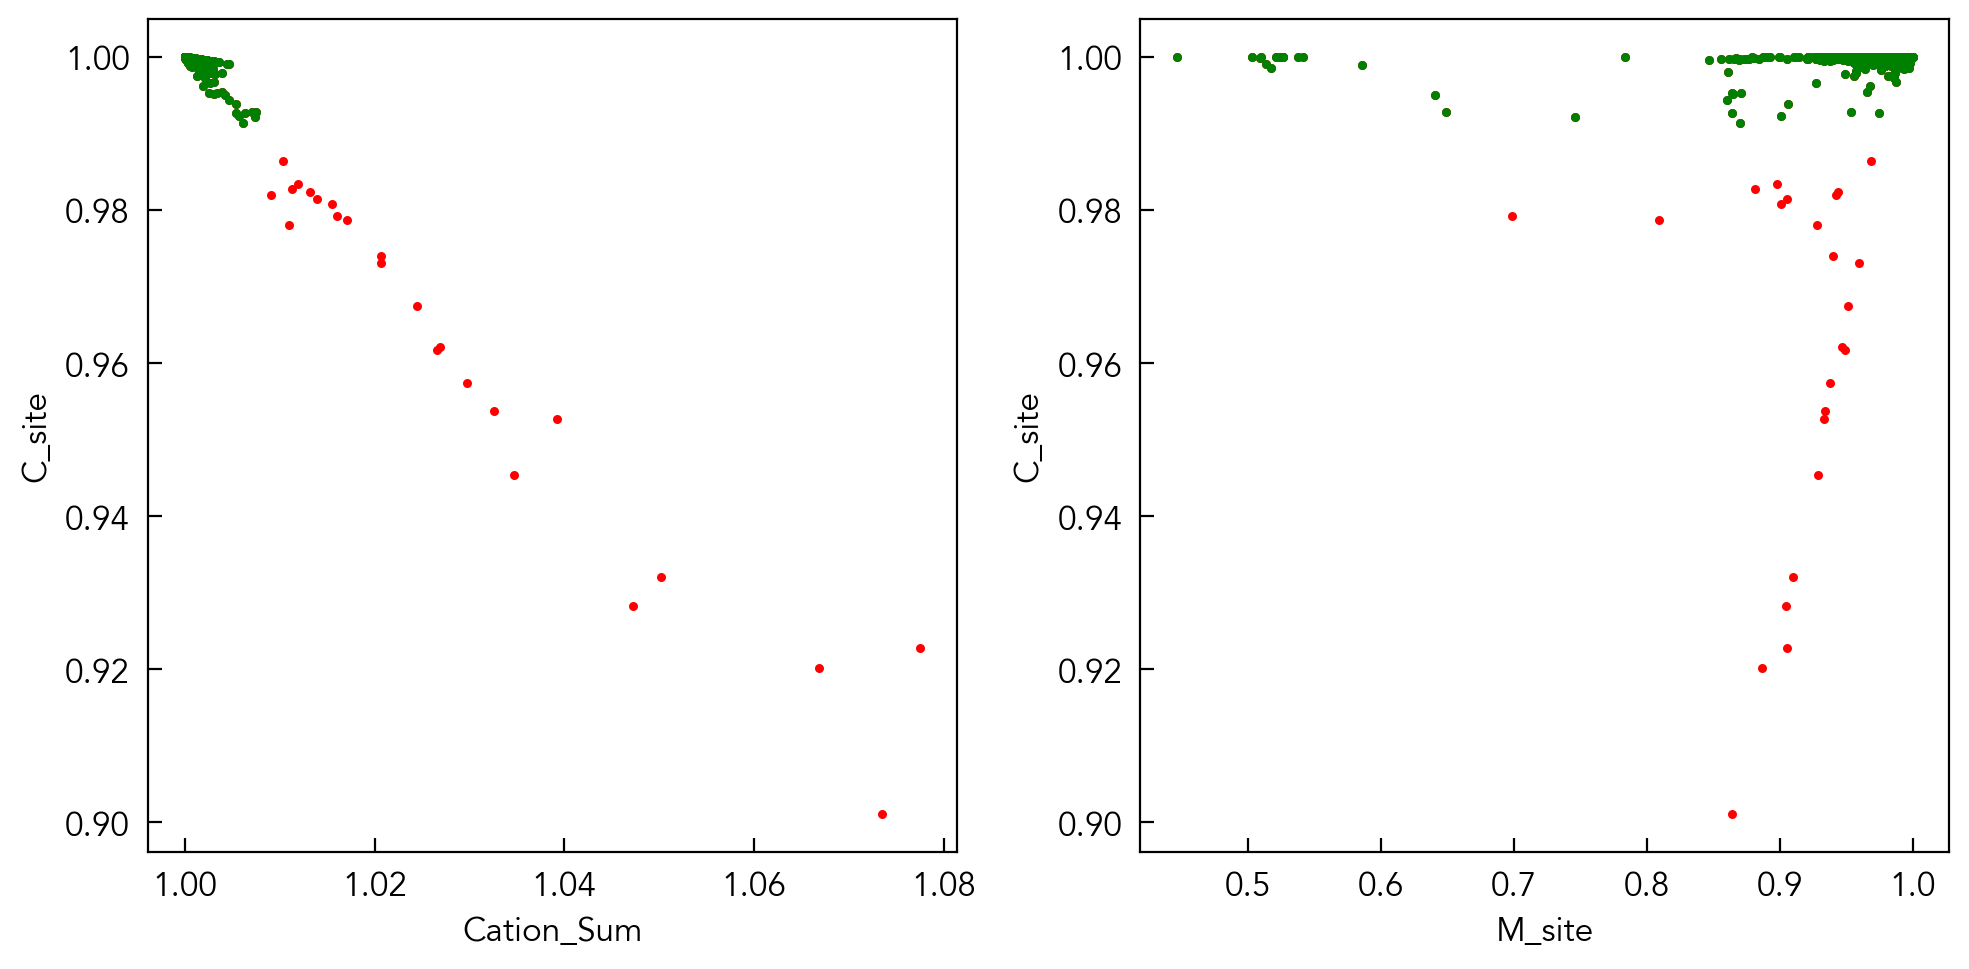

In [ ]:
# %%

cal_calc = mm.CalciteCalculator(min_df[min_df.Mineral=='Calcite'])
cal_comp = cal_calc.calculate_components()
display(cal_comp)

cal_comp_filt = cal_comp.loc[((cal_comp.Cation_Sum.between(0.98, 1.02)) & (cal_comp.C_site.between(0.99, 1.05)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(cal_comp['Cation_Sum'], cal_comp['C_site'], s = 5, color = 'r')
ax[0].scatter(cal_comp_filt['Cation_Sum'], cal_comp_filt['C_site'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('C_site')
ax[1].scatter(cal_comp['M_site'], cal_comp['C_site'], s = 5, color = 'r')
ax[1].scatter(cal_comp_filt['M_site'], cal_comp_filt['C_site'], s = 5, color = 'g')
ax[1].set_xlabel('M_site')
ax[1].set_ylabel('C_site')
plt.tight_layout()

Sample Name   SiO2    TiO2  Al2O3   FeOt     MnO    MgO     CaO  \
0      zk006-07-01-01  27.40  0.0100  19.21  18.67  0.3200  20.19  0.0400   
1      zk006-07-01-02  29.20  0.0000  16.50  19.03  0.2800  20.05  0.1000   
2       zk006-07-0-03  28.17  0.0100  18.65  19.47  0.3000  19.93  0.0100   
3      zk006-07-01-04  27.98  0.0500  19.45  18.53  0.3600  20.68  0.0000   
4      zk006-19-01-01  28.24  0.0200  18.10  20.07  0.2400  20.61  0.0500   
...               ...    ...     ...    ...    ...     ...    ...     ...   
1842  Chlorite_6_1039  21.56  0.0009  19.23  18.21  0.2237   8.72  0.0700   
1843  Chlorite_6_1040  27.19  0.0375  22.65  26.04  0.3538  10.21  0.1807   
1844  Chlorite_6_1041  26.25  0.0891  22.53  26.20  0.3690   9.84  0.1258   
1845  Chlorite_6_1042  26.62  0.0004  23.18  27.01  0.3937  10.13  0.1449   
1846  Chlorite_6_1043  26.37  0.0223  22.12  26.18  0.3409   9.97  0.0841   

        Na2O     K2O  ...   Mineral                     Source  Cation_Sum  \
0     0.0000  0.0500  ...  Chlorite              Zhangetal2020    9.982142   
1     0.0300  0.0900  ...  Chlorite              Zhangetal2020    9.936512   
2     0.0000  0.1200  ...  Chlorite              Zhangetal2020    9.965835   
3     0.0200  0.1200  ...  Chlorite              Zhangetal2020    9.979721   
4     0.0300  0.0100  ...  Chlorite              Zhangetal2020   10.006154   
...      ...     ...  ...       ...                        ...         ...   
1842  0.0911  0.0260  ...  Chlorite  González-Esvertitetal2024    9.657864   
1843  0.1241  0.1402  ...  Chlorite  González-Esvertitetal2024    9.725636   
1844  0.0676  0.1525  ...  Chlorite  González-Esvertitetal2024    9.742264   
1845  0.1237  0.1367  ...  Chlorite  González-Esvertitetal2024    9.769240   
1846  0.1238  0.1606  ...  Chlorite  González-Esvertitetal2024    9.753604   

      VII_site    T_site     Al_IV     Al_VI    M_site  M1_vacancy       XMg  
0     3.136254  5.195785  1.155009  1.195785  5.971069    0.020388  0.658438  
1     3.156678  5.089879  0.944805  1.089879  5.907203    0.072537  0.652553  
2     3.083034  5.175463  1.092889  1.175463  5.948931    0.041287  0.645981  
3     3.166628  5.196239  1.143783  1.196239  5.960136    0.026228  0.665488  
4     3.168430  5.091427  1.099545  1.091427  5.993368   -0.004059  0.646713  
...        ...       ...       ...       ...       ...         ...       ...  
1842  1.759255  5.856652  1.144775  1.856652  5.620147    0.355938  0.460512  
1843  1.677063  5.707297  1.120121  1.707297  5.660700    0.293588  0.411396  
1844  1.633679  5.701677  1.165535  1.701677  5.692550    0.268071  0.401016  
1845  1.654483  5.694738  1.189549  1.694738  5.709116    0.252595  0.400679  
1846  1.668029  5.680736  1.143386  1.680736  5.695646    0.268675  0.404357  

[1847 rows x 55 columns]

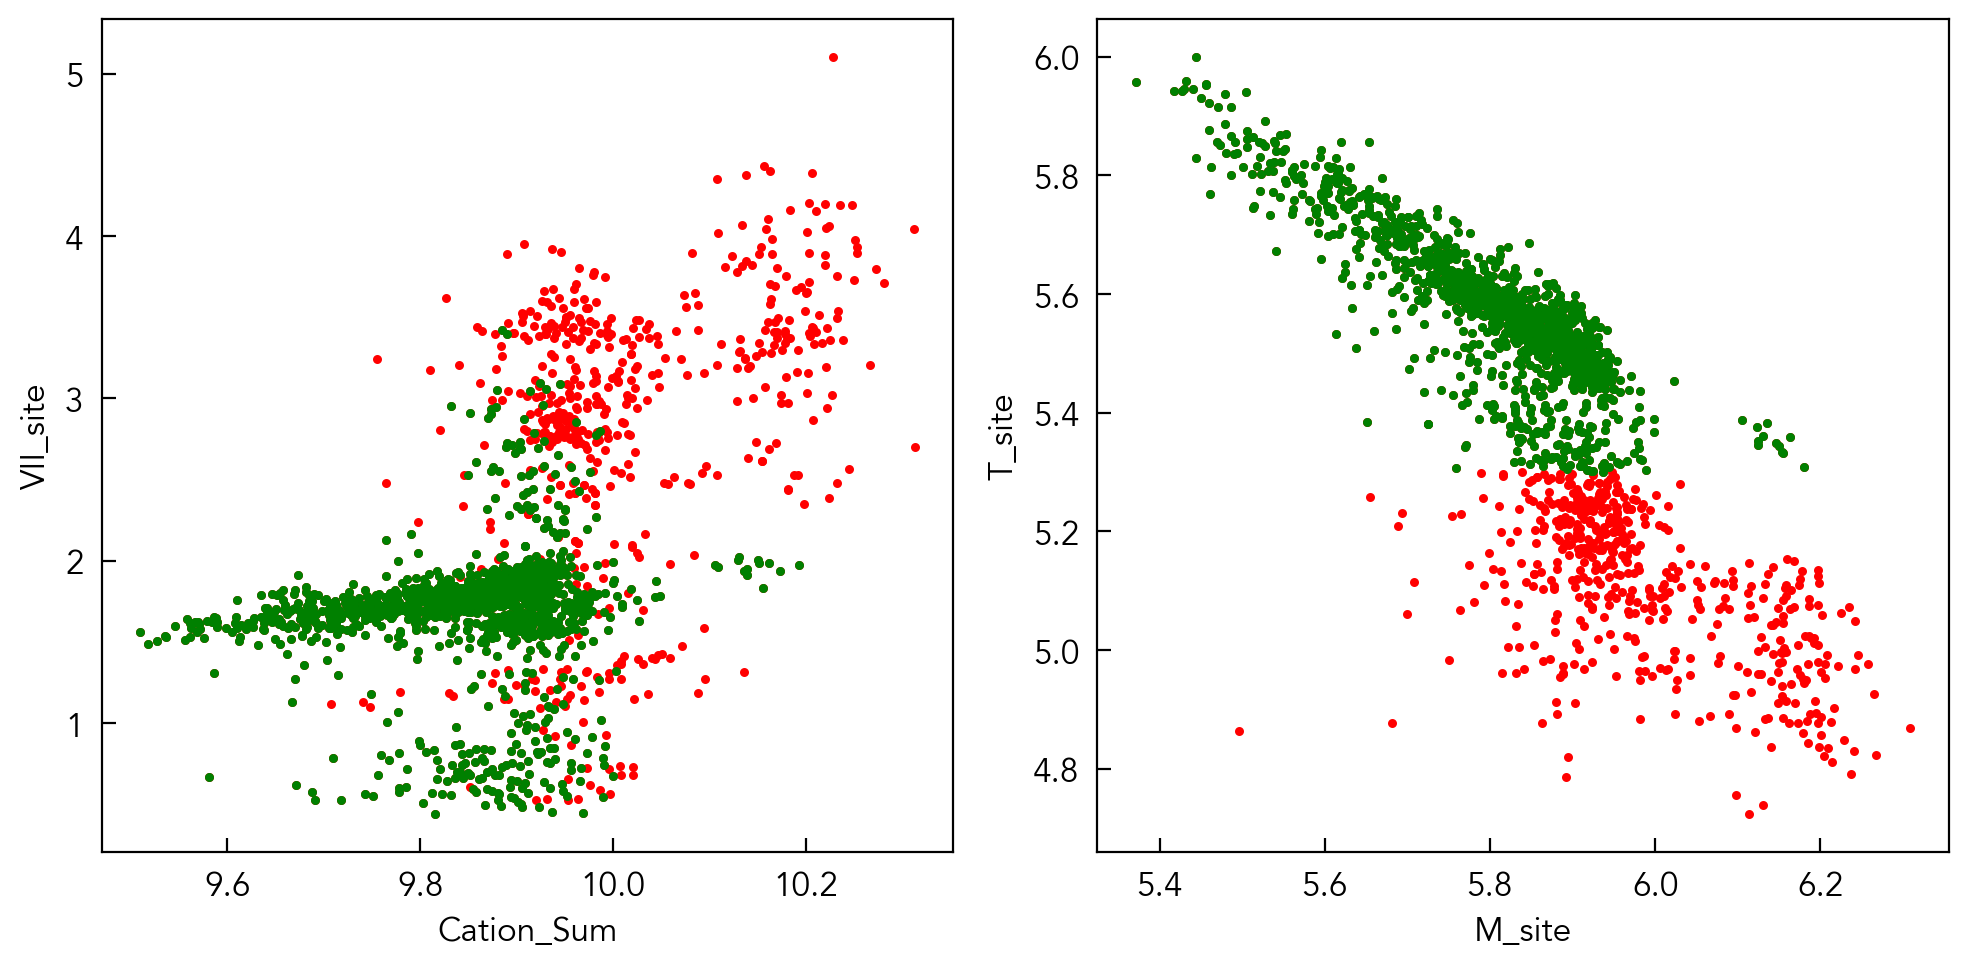

In [ ]:
# %%

chl_calc = mm.ChloriteCalculator(min_df[min_df.Mineral=='Chlorite'])
chl_comp = chl_calc.calculate_components()
display(chl_comp)

chl_comp_filt = chl_comp.loc[((chl_comp.Cation_Sum.between(9, 10.25)) & (chl_comp.T_site.between(5.3, 6)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(chl_comp['Cation_Sum'], chl_comp['VII_site'], s = 5, color = 'r')
ax[0].scatter(chl_comp_filt['Cation_Sum'], chl_comp_filt['VII_site'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('VII_site')
ax[1].scatter(chl_comp['M_site'], chl_comp['T_site'], s = 5, color = 'r')
ax[1].scatter(chl_comp_filt['M_site'], chl_comp_filt['T_site'], s = 5, color = 'g')
ax[1].set_xlabel('M_site')
ax[1].set_ylabel('T_site')
plt.tight_layout()

Sample Name     SiO2      TiO2    Al2O3     FeOt       MnO  \
0             17MMSG37_cpx4_1  46.8911  2.872200  6.59480  8.46850  0.188600   
1             17MMSG37_cpx4_2  47.0099  2.881500  6.16480  8.33290  0.124400   
2             17MMSG37_cpx4_3  49.2254  1.937800  5.15640  7.38740  0.187500   
3             17MMSG37_cpx4_4  49.0144  1.879300  4.70320  7.39630  0.156300   
4             17MMSG37_cpx4_5  48.0983  2.413000  5.41350  7.99800  0.152400   
...                       ...      ...       ...      ...      ...       ...   
11265  Ny17-178_178-px19_2400  48.4295  1.776680  6.16219  4.55014  0.061536   
11266   Ny17-218_218-px1_2444  51.8518  0.971556  3.49232  3.76788  0.049631   
11267   Ny17-218_218-px2_2445  48.0708  2.116830  6.66201  5.89416  0.128728   
11268   Ny17-218_218-px5_2446  48.3623  2.241370  5.31308  5.90293  0.134268   
11269   Ny17-218_218-px6_2447  51.6379  0.966732  3.46008  3.84936  0.068407   

           MgO      CaO      Na2O       K2O  ...      CaTs        Jd  \
0      13.8840  20.2569  0.340300       NaN  ...  0.027064  0.024766   
1      13.3498  21.2249  0.389700       NaN  ...  0.013580  0.028427   
2      14.5309  21.1051  0.343200       NaN  ...  0.027887  0.024697   
3      14.5894  21.2841  0.337200       NaN  ...  0.013922  0.024426   
4      14.0731  20.8235  0.362800       NaN  ...  0.016241  0.026374   
...        ...      ...       ...       ...  ...       ...       ...   
11265  14.2288  23.4889  0.293748  0.004048  ...  0.048941  0.021170   
11266  16.1659  23.2756  0.275268  0.008210  ...  0.018393  0.019433   
11267  13.8645  22.5593  0.430815  0.009870  ...  0.046597  0.031033   
11268  13.9379  23.4001  0.224815  0.011587  ...  0.021845  0.016264   
11269  16.0749  23.0529  0.262690  0.015338  ...  0.021503  0.018650   

       Jd_from 0=Na, 1=Al      CaTi  DiHd_1996      EnFs  DiHd_2003        Di  \
0                       0  0.106425   0.679848  0.181443   0.679848  0.503634   
1                       0  0.108885   0.731578  0.139677   0.731578  0.539728   
2                       0  0.072544   0.736051  0.148624   0.736051  0.569466   
3                       0  0.077413   0.757946  0.142869   0.757946  0.587335   
4                       0  0.090181   0.728069  0.154662   0.728069  0.549499   
...                   ...       ...        ...       ...        ...       ...   
11265                   0  0.075452   0.805326  0.062286   0.805326  0.681412   
11266                   0  0.046824   0.831380  0.080416   0.831380  0.734114   
11267                   0  0.083739   0.766565  0.092224   0.766565  0.616327   
11268                   0  0.086842   0.824434  0.067509   0.824434  0.663231   
11269                   0  0.043833   0.829301  0.083032   0.829301  0.729535   

       Fe3_Wang21  Fe2_Wang21  
0        0.047783    0.218049  
1        0.051375    0.210809  
2        0.031133    0.198166  
3        0.043589    0.187508  
4        0.039998    0.210785  
...           ...         ...  
11265    0.039911    0.101532  
11266    0.017490    0.097241  
11267    0.046815    0.136315  
11268    0.043020    0.141170  
11269    0.014735    0.103142  

[11270 rows x 71 columns]

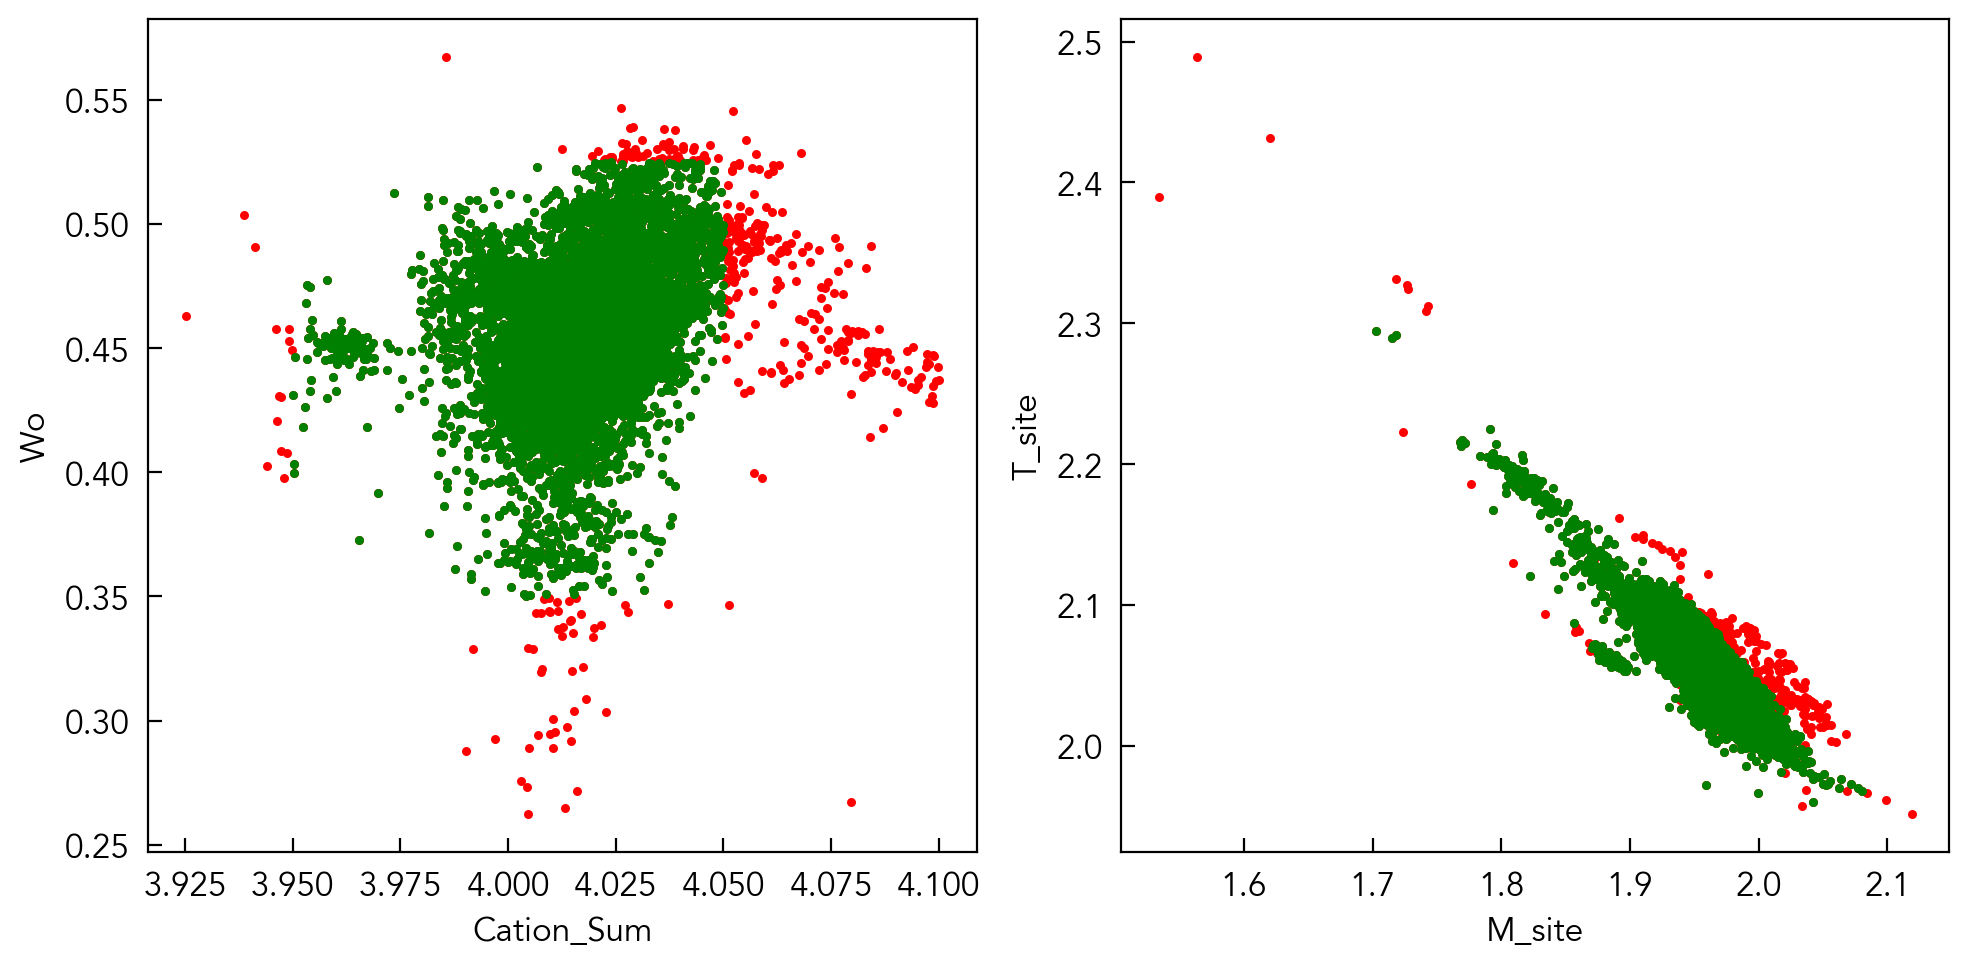

In [ ]:
# %% 

cpx_calc = mm.ClinopyroxeneCalculator(min_df[min_df.Mineral=='Clinopyroxene'])
cpx_comp = cpx_calc.calculate_components()
display(cpx_comp)

cpx_comp_filt = cpx_comp.loc[((cpx_comp.Cation_Sum.between(3.95, 4.05)) & (cpx_comp.Wo.between(0.35, 0.525)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(cpx_comp['Cation_Sum'], cpx_comp['Wo'], s = 5, color = 'r')
ax[0].scatter(cpx_comp_filt['Cation_Sum'], cpx_comp_filt['Wo'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('Wo')
ax[1].scatter(cpx_comp['M_site'], cpx_comp['T_site'], s = 5, color = 'r')
ax[1].scatter(cpx_comp_filt['M_site'], cpx_comp_filt['T_site'], s = 5, color = 'g')
ax[1].set_xlabel('M_site')
ax[1].set_ylabel('T_site')
plt.tight_layout()

Sample Name   SiO2  TiO2  Al2O3     Fe2O3t   MnO   MgO    CaO  \
0     CL09MB009 C2 ep 20  37.38  0.01  21.29  17.058689  0.29  0.06  23.19   
1     CL09MB009 C1 ep 19  37.55  0.03  22.51  14.969416  0.55  0.02  22.97   
2     CL09MB010 C5 ep 26  37.59  0.02  21.72  16.147411  0.20  0.01  23.30   
3     CL09MB010 C4 ep 25  36.61  0.00  19.84  18.047760  0.32  0.07  22.92   
4     CL09MB010 C2 ep 24  39.08  0.02  23.24  12.924596  1.65  0.04  20.78   
...                  ...    ...   ...    ...        ...   ...   ...    ...   
1432  CL09MB232 C1 ep 26  37.37  0.14  23.93  13.346896  0.54  0.02  23.02   
1433  CL09MB233 C2 ep 39  37.54  0.03  22.64  15.280585  0.10  0.00  23.36   
1434  CL09MB233 C3 ep 41  37.77  0.18  23.16  14.280401  0.13  0.02  23.20   
1435  CL09MB233 C1 ep 35  37.73  0.06  25.02  11.868847  0.19  0.02  23.37   
1436  CL09MB233 C4 ep 43  37.57  0.06  23.42  14.358193  0.27  0.04  22.90   

      Na2O   K2O  ...   Al_M1M3     Fe_M3         Al_M3     Fe_M1     Al_M1  \
0     0.00  0.00  ...  0.999663  0.980425  4.510281e-17  0.042606  0.999663   
1     0.03  0.02  ...  1.112430  0.896961  6.594577e-02  0.000000  1.046484   
2     0.01  0.02  ...  1.038022  0.967417  1.909617e-02  0.000000  1.018926   
3     0.03  0.01  ...  0.902474  0.977948  4.857226e-17  0.127052  0.902474   
4     0.42  0.04  ...  1.166676  0.769372  1.200747e-01  0.000000  1.046601   
...    ...   ...  ...       ...       ...           ...       ...       ...   
1432  0.03  0.02  ...  1.238137  0.797051  1.666526e-01  0.000000  1.071484   
1433  0.01  0.01  ...  1.117317  0.912454  8.082457e-02  0.000000  1.036492   
1434  0.00  0.04  ...  1.160880  0.850735  1.405482e-01  0.000000  1.020331   
1435  0.00  0.01  ...  1.326771  0.704753  2.825491e-01  0.000000  1.044222   
1436  0.03  0.01  ...  1.187859  0.856434  1.254387e-01  0.000000  1.062420   

        XMn_Ep    XFe_Ep       XEp       XZo  XSum  
0     0.019575  0.042606  0.937819  0.000000   1.0  
1     0.037093  0.000000  0.896961  0.065946   1.0  
2     0.013487  0.000000  0.967417  0.019096   1.0  
3     0.022052  0.127052  0.850896  0.000000   1.0  
4     0.110553  0.000000  0.769372  0.120075   1.0  
...        ...       ...       ...       ...   ...  
1432  0.036297  0.000000  0.797051  0.166653   1.0  
1433  0.006721  0.000000  0.912454  0.080825   1.0  
1434  0.008717  0.000000  0.850735  0.140548   1.0  
1435  0.012698  0.000000  0.704753  0.282549   1.0  
1436  0.018127  0.000000  0.856434  0.125439   1.0  

[1437 rows x 62 columns]

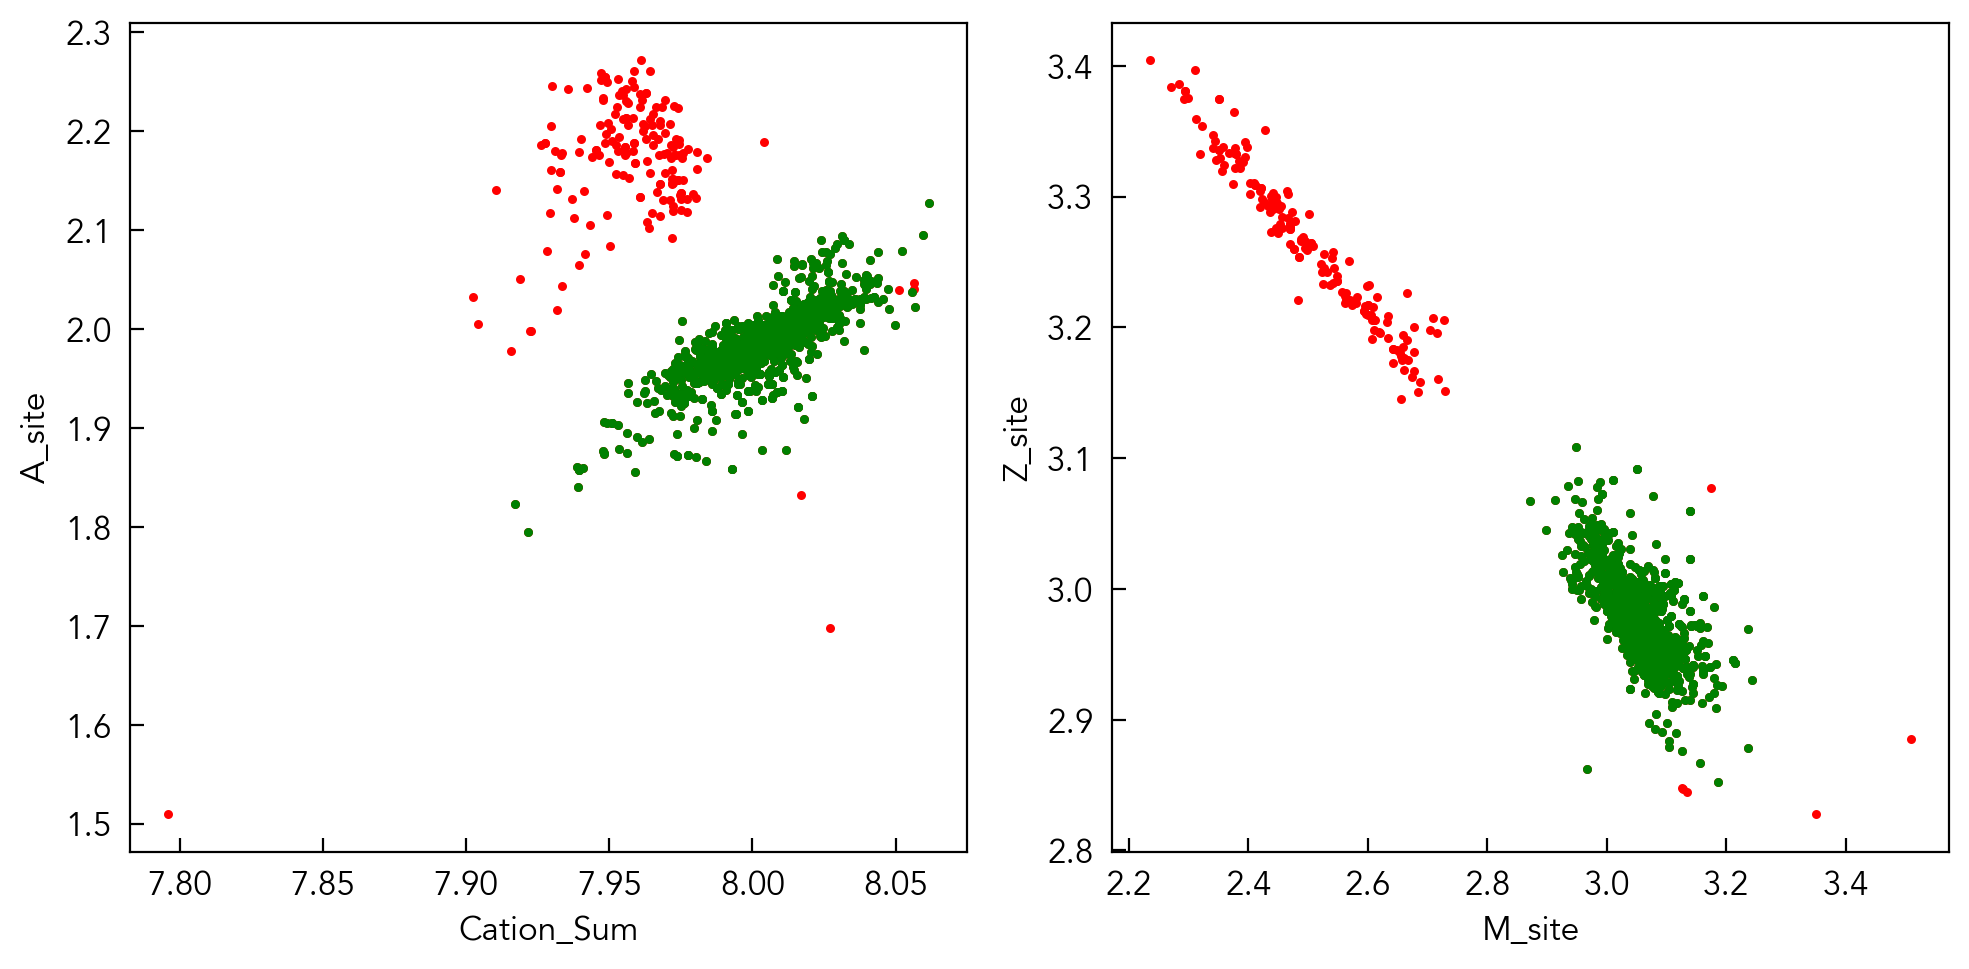

In [ ]:
# %% 

ep_calc = mm.EpidoteCalculator(min_df[min_df.Mineral=='Epidote'])
ep_comp = ep_calc.calculate_components()
display(ep_comp)

ep_comp_filt = ep_comp.loc[((ep_comp.Cation_Sum.between(7.9, 8.1)) & (ep_comp.M_site.between(2.8, 3.3)) & (ep_comp.Z_site.between(2.85, 3.15)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(ep_comp['Cation_Sum'], ep_comp['A_site'], s = 5, color = 'r')
ax[0].scatter(ep_comp_filt['Cation_Sum'], ep_comp_filt['A_site'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('A_site')
ax[1].scatter(ep_comp['M_site'], ep_comp['Z_site'], s = 5, color = 'r')
ax[1].scatter(ep_comp_filt['M_site'], ep_comp_filt['Z_site'], s = 5, color = 'g')
ax[1].set_xlabel('M_site')
ax[1].set_ylabel('Z_site')
plt.tight_layout()

Sample Name   SiO2  TiO2  Al2O3        FeO     Fe2O3   MnO  \
0             Lw-Ec_GR1_core  38.52  0.04  21.84  27.045034  0.027743  1.49   
1              Lw-Ec_GR1_rim  38.84  0.02  21.82  27.810000  0.000000  0.81   
2     Lw-Ec_GR1_reaction rim  40.08  0.05  22.83  20.116665  0.525972  0.21   
3             Zo-Ec_MR4_core  39.12  0.73  21.00  26.390000  0.000000  2.09   
4              Zo-Ec_MR4_rim  39.84  0.06  22.54  25.270000  0.000000  0.78   
...                      ...    ...   ...    ...        ...       ...   ...   
2058                  77SL-9  41.96  0.15  23.01  11.400000  0.000000  0.35   
2059                    SL-7  41.65  0.15  22.94  16.030000  0.000000  0.46   
2060              SLC-20-175  40.62  0.24  22.95  12.063875  0.873545  0.35   
2061              SLC-20-180  40.32  0.21  22.64  16.630000  0.000000  0.36   
2062              SLC-20-186  40.76  0.26  22.84  15.751783  0.020243  0.36   

        MgO   CaO  Na2O  ...   Cr_AlCr  Fe3_prop       And   Ca_corr  \
0      5.58  5.82  0.03  ...  0.000000  0.000922  0.000432  0.482829   
1      5.51  6.20  0.00  ...  0.000307  0.000000  0.000000  0.513976   
2     12.56  4.10  0.00  ...  0.000881  0.022986  0.008966  0.282572   
3      4.98  5.97  0.08  ...  0.002231  0.000000  0.000000  0.497512   
4      7.74  4.97  0.03  ...  0.000892  0.000000  0.000000  0.403571   
...     ...   ...   ...  ...       ...       ...       ...       ...   
2058  17.44  5.11  0.02  ...  0.009243  0.000000  0.000000  0.394539   
2059  15.65  4.22  0.02  ...  0.000877  0.000000  0.000000  0.327286   
2060  16.42  5.47  0.02  ...  0.001459  0.061171  0.017383  0.356773   
2061  14.33  4.17  0.03  ...  0.000888  0.000000  0.000000  0.332833   
2062  14.95  4.70  0.04  ...  0.002636  0.001155  0.000380  0.368469   

           Alm       Prp       Sps       Grs  End_Sum       XMg  
0     0.588943  0.216393  0.032830  0.161402      1.0  0.268893  
1     0.599406  0.211702  0.017682  0.171210      1.0  0.261003  
2     0.427770  0.464583  0.004413  0.094268      1.0  0.526734  
3     0.586016  0.197130  0.047005  0.169849      1.0  0.251715  
4     0.546676  0.298482  0.017090  0.137752      1.0  0.353167  
...        ...       ...       ...       ...      ...       ...  
2058  0.230817  0.629450  0.007177  0.132556      1.0  0.731692  
2059  0.321886  0.560191  0.009355  0.108567      1.0  0.635081  
2060  0.261785  0.595109  0.007207  0.118515      1.0  0.708137  
2061  0.347314  0.533492  0.007615  0.111579      1.0  0.605687  
2062  0.323184  0.546125  0.007472  0.122839      1.0  0.628509  

[2063 rows x 69 columns]

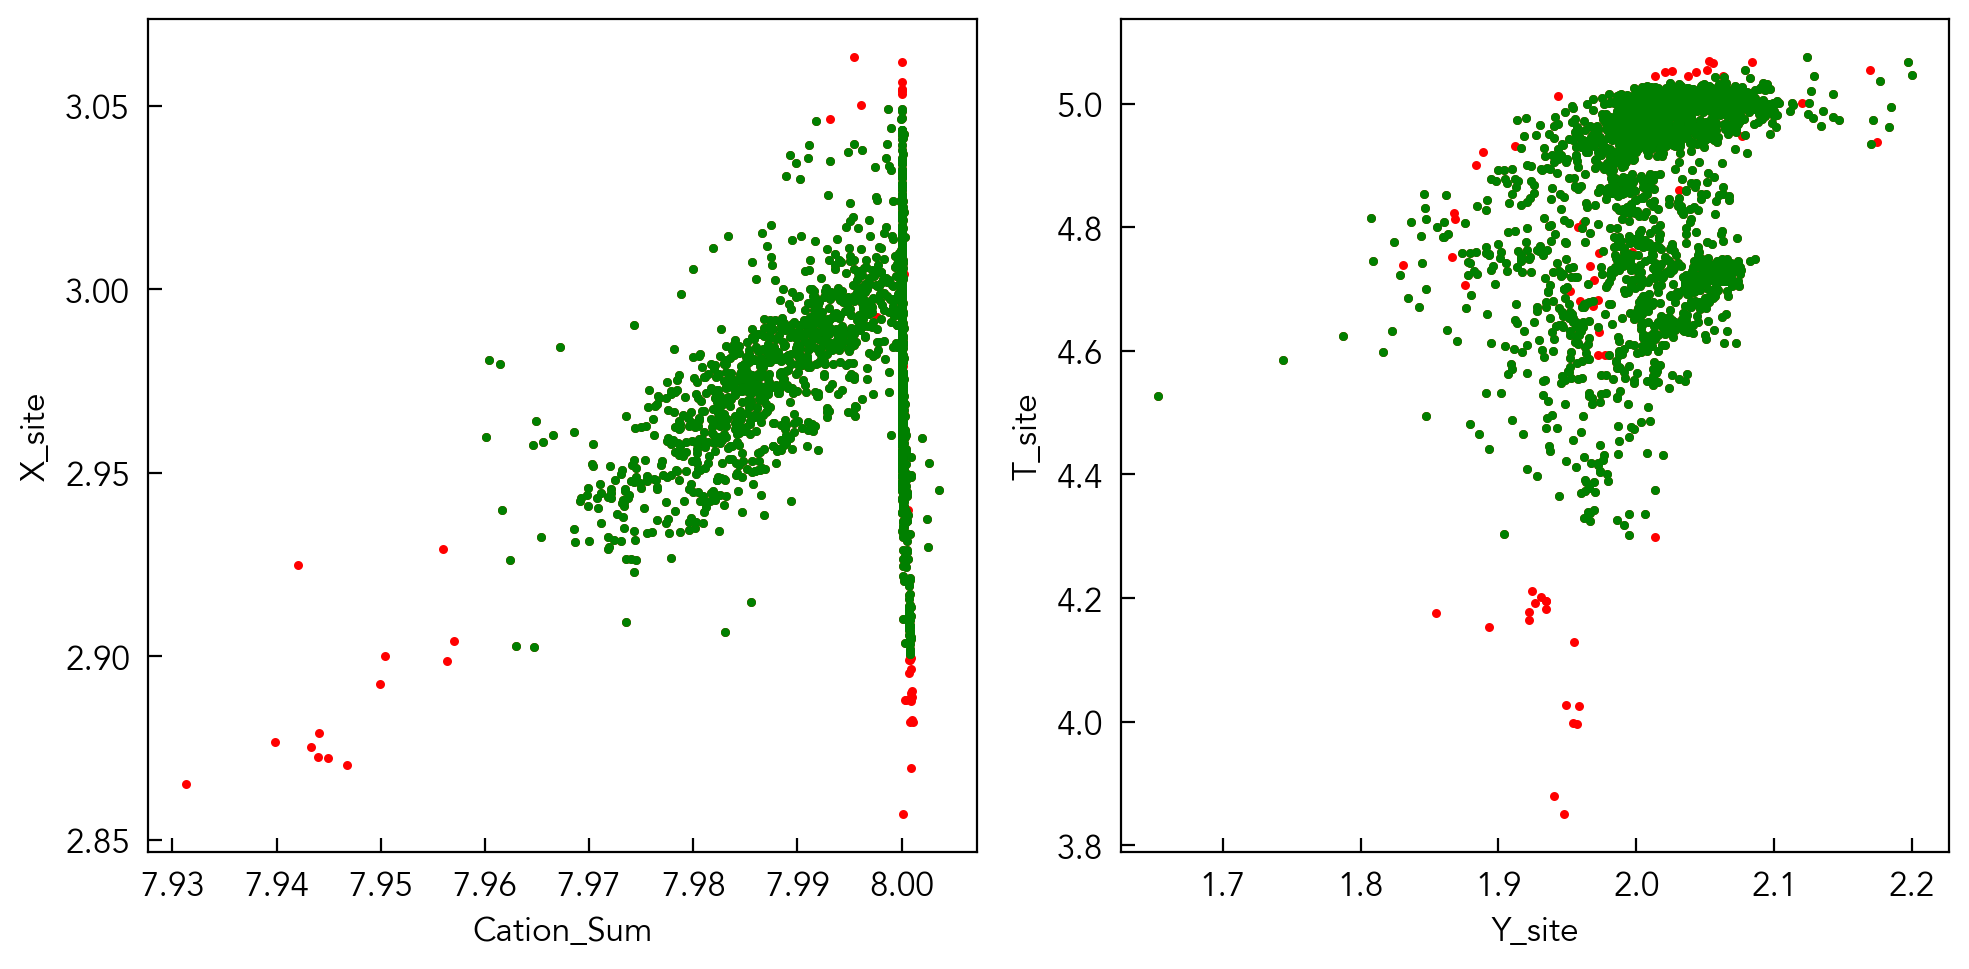

In [ ]:
# %% 

gt_calc = mm.GarnetCalculator(min_df[min_df.Mineral=='Garnet'])
gt_comp = gt_calc.calculate_components()
display(gt_comp)

gt_comp_filt = gt_comp.loc[((gt_comp.Cation_Sum.between(7.96, 8.04)) & (gt_comp.X_site.between(2.9, 3.05)) & (gt_comp.T_site.between(4.3, 5.1)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(gt_comp['Cation_Sum'], gt_comp['X_site'], s = 5, color = 'r')
ax[0].scatter(gt_comp_filt['Cation_Sum'], gt_comp_filt['X_site'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('X_site')
ax[1].scatter(gt_comp['Y_site'], gt_comp['T_site'], s = 5, color = 'r')
ax[1].scatter(gt_comp_filt['Y_site'], gt_comp_filt['T_site'], s = 5, color = 'g')
ax[1].set_xlabel('Y_site')
ax[1].set_ylabel('T_site')
plt.tight_layout()

['SiO2', 'TiO2', 'Al2O3', 'FeO', 'Fe2O3', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'Cr2O3']


Sample Name   SiO2   TiO2  Al2O3        FeO      Fe2O3  \
0             LS-13_C1_Hem-1 _1  0.396  0.026  0.218  28.848347  64.611483   
1             LS-13_C1_Hem-2 _2  0.519  0.063  0.415  28.704286  64.836036   
2              LS-13_C1_Hem-3_3  0.395  0.071  0.757  28.392488  64.445740   
3             LS-13_C1_Hem-4 _1  0.378  0.151  0.350  28.732636  64.603382   
4             LS-13_C1_Hem-5 _2  0.420  0.028  0.324  28.819658  64.841180   
..                          ...    ...    ...    ...        ...        ...   
380   MB98a_zonedhematite_rim_7    NaN    NaN  0.090  33.090308  73.688304   
381   MB98a_zonedhematite_rim_8  0.050    NaN  0.040  32.949280  73.296375   
382   MB98a_zonedhematite_rim_9    NaN    NaN  0.070  32.956983  73.360717   
383  MB98a_zonedhematite_rim_10  0.860    NaN  0.050  32.357638  71.946173   
384  MB98a_zonedhematite_rim_11    NaN    NaN  0.080  33.107276  73.829255   

       MnO    MgO    CaO   Na2O  ...  A_site_expanded    B_site  A_B_site  \
0      NaN  0.016  0.096    NaN  ...         0.733951  1.486113  2.220064   
1      NaN    NaN  0.084  0.041  ...         0.723794  1.487296  2.211090   
2    0.031  0.013  0.109    NaN  ...         0.719013  1.494318  2.213330   
3      NaN  0.010  0.102    NaN  ...         0.729234  1.490444  2.219678   
4      NaN  0.011  0.131    NaN  ...         0.729907  1.488910  2.218817   
..     ...    ...    ...    ...  ...              ...       ...       ...   
380    NaN    NaN    NaN    NaN  ...         0.747851  1.501432  2.249284   
381    NaN    NaN    NaN    NaN  ...         0.748363  1.499280  2.247644   
382    NaN    NaN    NaN    NaN  ...         0.748321  1.501119  2.249440   
383    NaN    NaN    NaN    NaN  ...         0.737471  1.477103  2.214574   
384    NaN  0.030    NaN    NaN  ...         0.748093  1.501271  2.249364   

        Fe_Ti  Fe3_prop      XHem      XIlm    XMnIlm           XGk  XSum  
0    2.211530  0.668364  0.999597  0.000402  0.000000  3.975736e-07   1.0  
1    2.196343  0.670240  0.999029  0.000971  0.000000  0.000000e+00   1.0  
2    2.184986  0.671319  0.998899  0.001099  0.000001  8.971198e-07   1.0  
3    2.206715  0.669227  0.997666  0.002332  0.000000  1.446842e-06   1.0  
4    2.206764  0.669370  0.999568  0.000432  0.000000  2.936884e-07   1.0  
..        ...       ...       ...       ...       ...           ...   ...  
380  2.246417  0.667091  1.000000  0.000000  0.000000  0.000000e+00   1.0  
381  2.246364  0.666856  1.000000  0.000000  0.000000  0.000000e+00   1.0  
382  2.247200  0.666999  1.000000  0.000000  0.000000  0.000000e+00   1.0  
383  2.212968  0.666750  1.000000  0.000000  0.000000  0.000000e+00   1.0  
384  2.245615  0.667402  1.000000  0.000000  0.000000  0.000000e+00   1.0  

[385 rows x 63 columns]

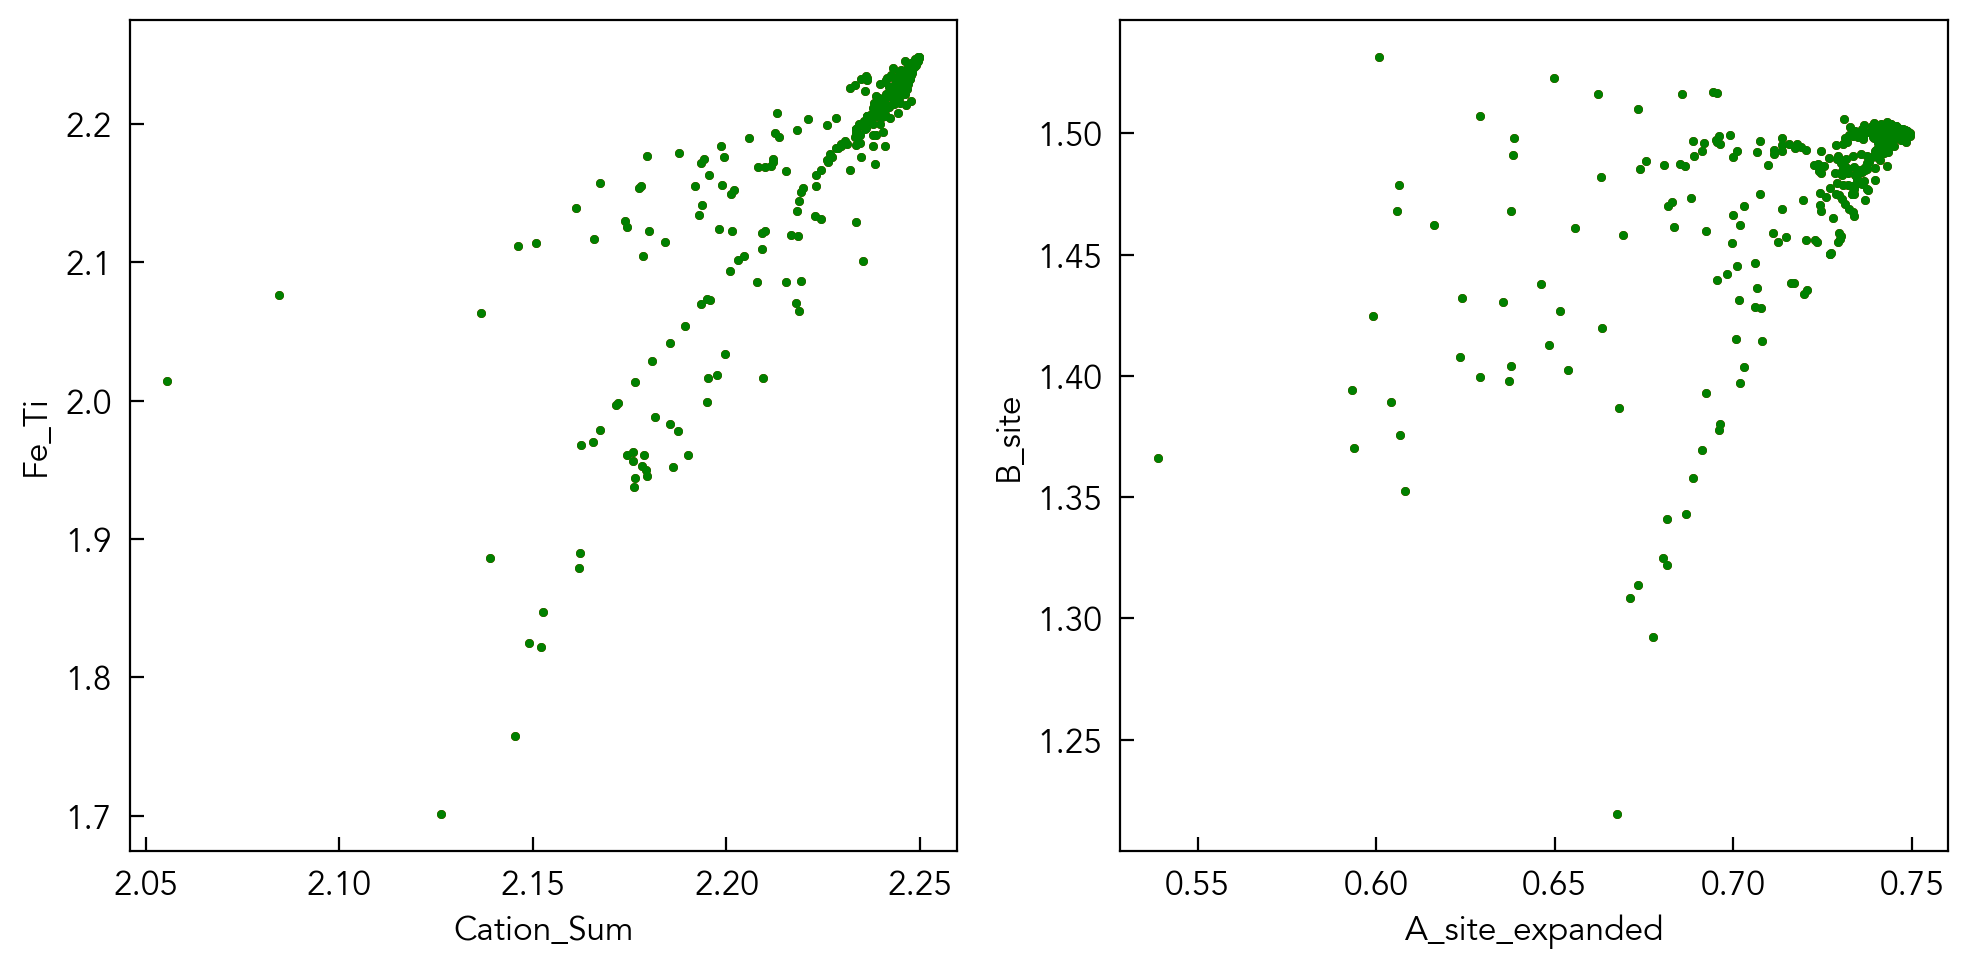

In [ ]:
# %% 

hem_calc = mm.OxideCalculator(min_df[min_df.Mineral=='Hematite'])
hem_comp = hem_calc.calculate_components()
display(hem_comp)

hem_comp_filt = hem_comp.loc[((hem_comp.Cation_Sum.between(2.0, 2.3)))] # & (hem_comp.Fe_Ti.between(2.05, 2.3)) & (hem_comp.A_site_expanded.between(0.66, 0.76)))

fe_conversion = 159.688 / (2 * 71.8464)
hem_comp_filt["FeOt"] = (hem_comp_filt["FeO"] + hem_comp_filt["Fe2O3"] / fe_conversion)

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(hem_comp['Cation_Sum'], hem_comp['Fe_Ti'], s = 5, color = 'r')
ax[0].scatter(hem_comp_filt['Cation_Sum'], hem_comp_filt['Fe_Ti'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('Fe_Ti')
ax[1].scatter(hem_comp['A_site_expanded'], hem_comp['B_site'], s = 5, color = 'r')
ax[1].scatter(hem_comp_filt['A_site_expanded'], hem_comp_filt['B_site'], s = 5, color = 'g')
ax[1].set_xlabel('A_site_expanded')
ax[1].set_ylabel('B_site')
plt.tight_layout()

['SiO2', 'TiO2', 'Al2O3', 'FeO', 'Fe2O3', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'Cr2O3']


Sample Name    SiO2     TiO2   Al2O3        FeO      Fe2O3     MnO  \
0            UC1250  0.0000  52.4210  0.0897  42.008600   0.000000  0.6127   
1            UC1250  0.2007  50.6936  0.2047  42.595100   0.000000  0.7440   
2            UC1250  0.0424  49.1927  0.0757  37.810208   6.817577  1.6045   
3            UC1250  0.0473  46.3737  0.1023  36.477255   9.502351  2.0188   
4            UC1250  0.0010  49.9869  0.1263  42.109514   3.407166  1.1098   
...             ...     ...      ...     ...        ...        ...     ...   
2061  AC6-ox163_Ilm  0.0000  45.3740  0.3630  34.495751  14.788549  0.6600   
2062  AC6-ox164_Ilm  0.0000  45.6700  0.3900  34.799969  14.983898  0.6540   
2063  AC6-ox166_Ilm  0.0000  45.3530  0.3660  34.229423  15.920233  0.6360   
2064  AC6-ox169_Ilm  0.0010  45.1690  0.5250  34.717516  14.357620  0.5940   
2065  AC6-ox171_Ilm  0.0000  46.0130  0.2820  35.900312  12.839790  0.7090   

         MgO     CaO  Na2O  ...  A_site_expanded    B_site  A_B_site  \
0     0.4309  0.0179   NaN  ...         0.943171  1.028923  1.972093   
1     0.1313  0.0119   NaN  ...         0.962751  1.014748  1.977499   
2     2.8229  0.0139   NaN  ...         0.935743  1.063783  1.999526   
3     1.9944  0.0142   NaN  ...         0.909426  1.090980  2.000406   
4     1.0022  0.0212   NaN  ...         0.964961  1.034676  1.999637   
...      ...     ...   ...  ...              ...       ...       ...   
2061  3.5740  0.0000   NaN  ...         0.865101  1.139602  2.004702   
2062  3.5500  0.0190   NaN  ...         0.863859  1.140395  2.004254   
2063  3.7850  0.0000   NaN  ...         0.857608  1.147761  2.005369   
2064  3.3580  0.0080   NaN  ...         0.865612  1.138625  2.004237   
2065  2.9110  0.1050   NaN  ...         0.878637  1.122099  2.000737   

         Fe_Ti  Fe3_prop      XHem      XIlm    XMnIlm       XGk  XSum  
0     1.938884  0.000000  0.000000  0.968001  0.014299  0.017700   1.0  
1     1.949310  0.000000  0.000000  0.977340  0.017290  0.005370   1.0  
2     1.856898  0.139600  0.121645  0.746858  0.032099  0.099398   1.0  
3     1.875731  0.189895  0.169962  0.719572  0.040334  0.070132   1.0  
4     1.933073  0.067866  0.063770  0.875703  0.023375  0.037152   1.0  
...        ...       ...       ...       ...       ...       ...   ...  
2061  1.846641  0.278377  0.245679  0.626477  0.012140  0.115704   1.0  
2062  1.848155  0.279250  0.246908  0.627117  0.011936  0.114038   1.0  
2063  1.841993  0.295038  0.259688  0.608843  0.011458  0.120012   1.0  
2064  1.850679  0.271207  0.241068  0.637894  0.011054  0.109985   1.0  
2065  1.868078  0.243471  0.218048  0.671466  0.013431  0.097056   1.0  

[2066 rows x 63 columns]

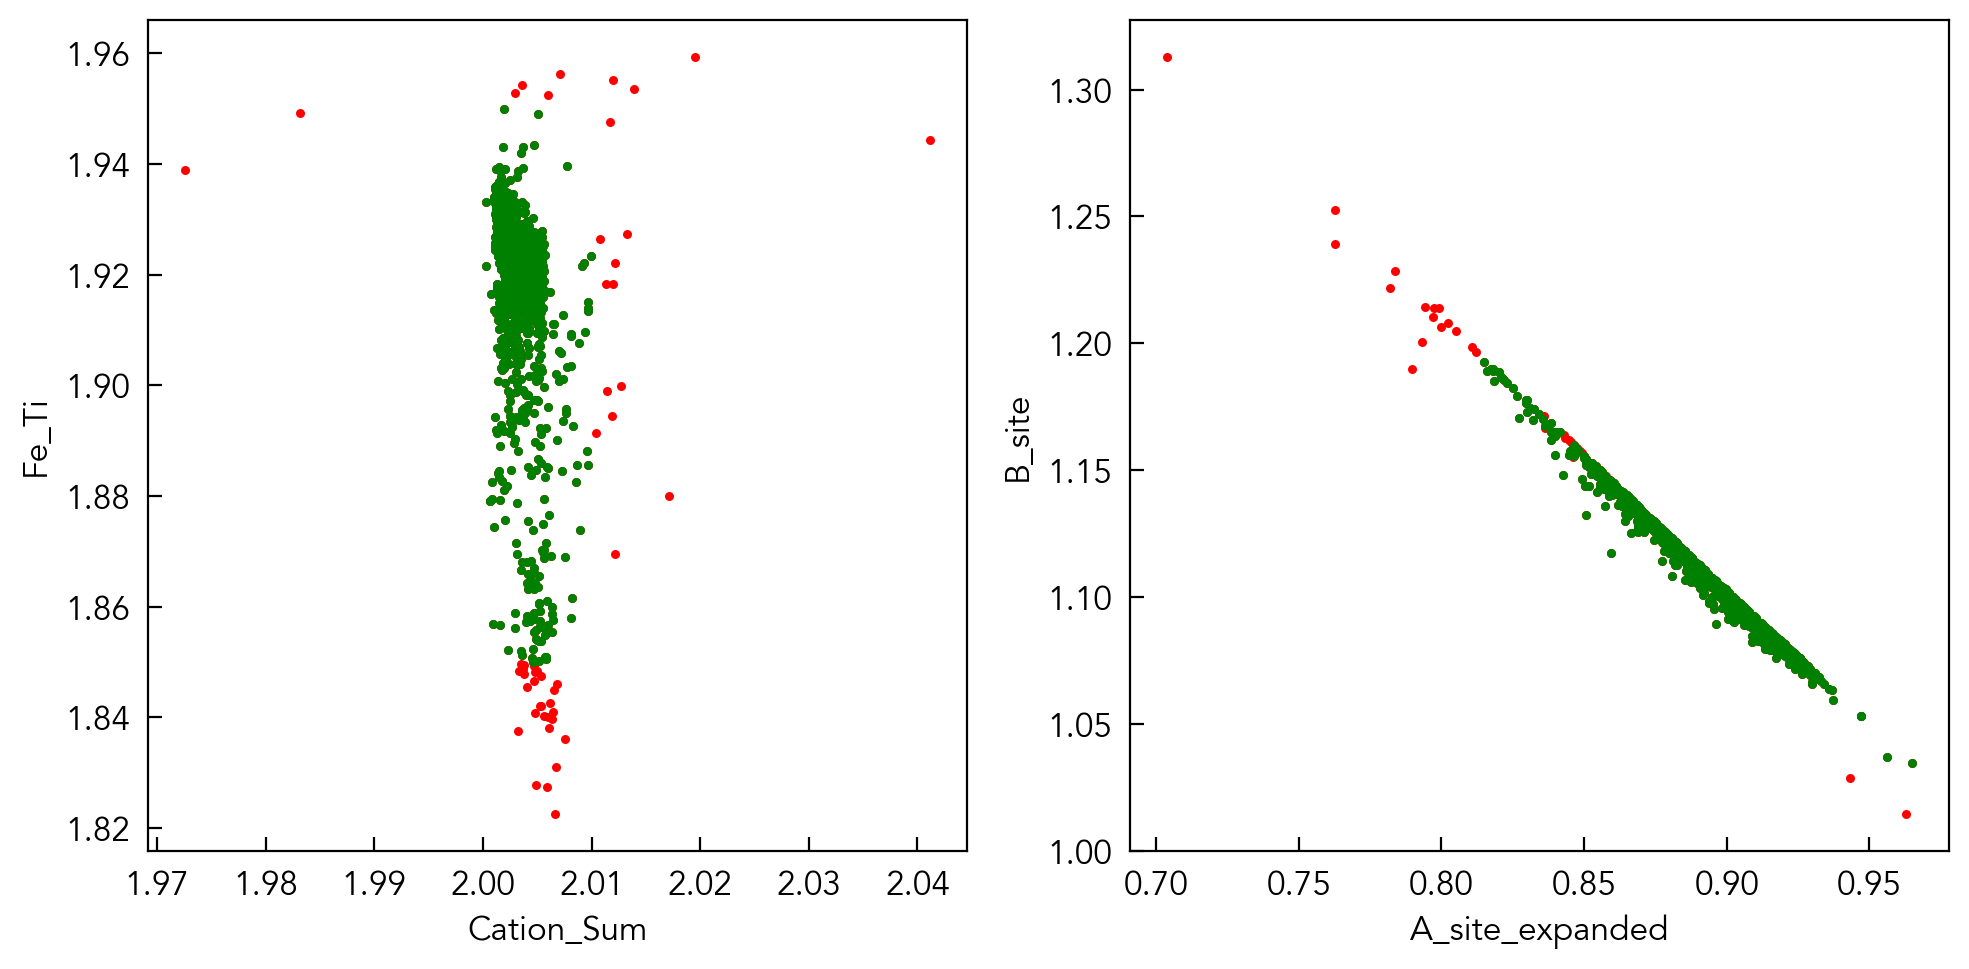

In [ ]:
# %% 

ilm_calc = mm.OxideCalculator(min_df[min_df.Mineral=='Ilmenite'])
ilm_comp = ilm_calc.calculate_components()
display(ilm_comp)

ilm_comp_filt = ilm_comp.loc[((ilm_comp.Cation_Sum.between(1.99, 2.01)) & (ilm_comp.Fe_Ti.between(1.85, 1.95)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(ilm_comp['Cation_Sum'], ilm_comp['Fe_Ti'], s = 5, color = 'r')
ax[0].scatter(ilm_comp_filt['Cation_Sum'], ilm_comp_filt['Fe_Ti'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('Fe_Ti')
ax[1].scatter(ilm_comp['A_site_expanded'], ilm_comp['B_site'], s = 5, color = 'r')
ax[1].scatter(ilm_comp_filt['A_site_expanded'], ilm_comp_filt['B_site'], s = 5, color = 'g')
ax[1].set_xlabel('A_site_expanded')
ax[1].set_ylabel('B_site')
plt.tight_layout()

Sample Name      SiO2    TiO2     Al2O3      FeOt     MnO  \
0    VS219G_70 / 1 . _Ksl  39.72220  0.0308  21.50880  7.132700  0.1512   
1    VS219G_83 / 1 . _Ksl  40.55910  0.0314  22.14600  6.628500  0.0988   
2    VS219G_84 / 1 . _Ksl  40.36870  0.0265  22.06790  6.927900  0.0904   
3    VS219G_65 / 1 . _Ksl  40.62730  0.0006  21.80170  7.419000  0.1750   
4    VS219G_60 / 1 . _Ksl  38.68710  0.0180  25.53900  5.076400  0.0870   
..                    ...       ...     ...       ...       ...     ...   
297          JC82_kals_32  37.33665     NaN  31.72472  0.549483     NaN   
298          JC84_kals_41  37.95170     NaN  32.23228  0.679655     NaN   
299          JC84_kals_42  37.94806     NaN  31.66877  0.463879     NaN   
300          JC87_kals_64  37.90903     NaN  31.62015  0.705846     NaN   
301          JC87_kals_65  37.28819     NaN  30.62019  1.033830     NaN   

        MgO       CaO      Na2O       K2O  ...  K_cat_4ox  P_cat_4ox  \
0    0.4965  0.203900  1.504800  27.32920  ...   0.972121        0.0   
1    0.5521       NaN  1.800300  26.71990  ...   0.936752        0.0   
2    0.5331       NaN  1.700000  27.01750  ...   0.948611        0.0   
3    0.4781       NaN  1.341200  26.96800  ...   0.946687        0.0   
4    0.3293  0.169800  1.317300  26.88460  ...   0.939861        0.0   
..      ...       ...       ...       ...  ...        ...        ...   
297     NaN  0.151270  0.179639  29.76579  ...   1.008980        0.0   
298     NaN  0.181881  0.143522  29.05218  ...   0.973290        0.0   
299     NaN  0.121800  0.194211  29.22062  ...   0.986000        0.0   
300     NaN       NaN       NaN  29.96770  ...   1.009899        0.0   
301     NaN  0.082153  0.035611  29.55424  ...   1.015251        0.0   

     Cr_cat_4ox    Mineral             Source  Cation_Sum  A_B_site    A_site  \
0           0.0  Kalsilite   Andersenetal2014    3.065118  1.053471  0.972121   
1           0.0  Kalsilite   Andersenetal2014    3.042451  1.032675  0.936752   
2           0.0  Kalsilite   Andersenetal2014    3.050167  1.039326  0.948611   
3           0.0  Kalsilite   Andersenetal2014    3.037651  1.018242  0.946687   
4           0.0  Kalsilite   Andersenetal2014    3.031990  1.009850  0.939861   
..          ...        ...                ...         ...       ...       ...   
297         0.0  Kalsilite  Beccaluvaetal2017    3.020306  1.018235  1.008980   
298         0.0  Kalsilite  Beccaluvaetal2017    2.994868  0.980597  0.973290   
299         0.0  Kalsilite  Beccaluvaetal2017    3.000633  0.995960  0.986000   
300         0.0  Kalsilite  Beccaluvaetal2017    3.011330  1.009899  1.009899   
301         0.0  Kalsilite  Beccaluvaetal2017    3.018599  1.017110  1.015251   

       B_site    T_site  
0    0.081351  1.814380  
1    0.095923  1.831872  
2    0.090715  1.826855  
3    0.071555  1.824980  
4    0.069990  1.884976  
..        ...       ...  
297  0.009255  1.985554  
298  0.007308  1.994227  
299  0.009960  1.990960  
300  0.000000  1.985837  
301  0.001859  1.975837  

[302 rows x 52 columns]

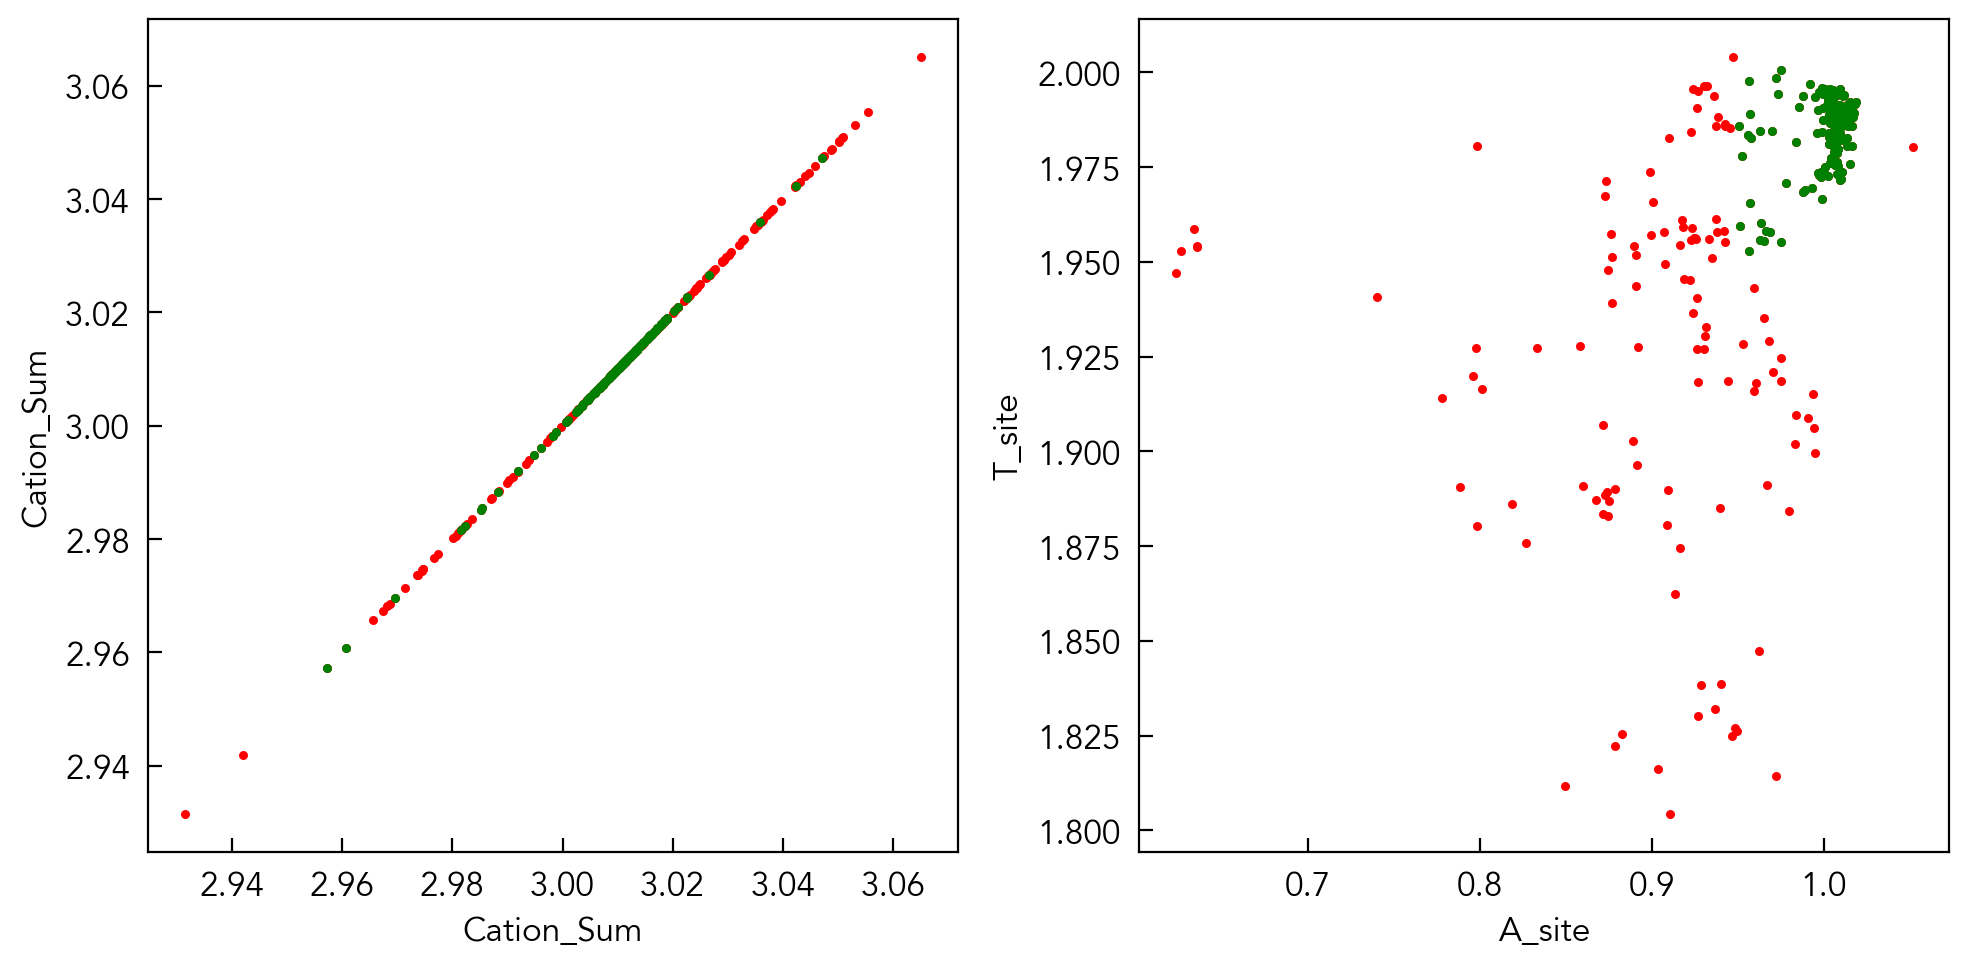

In [ ]:
# %%

ks_calc = mm.KalsiliteCalculator(min_df[min_df.Mineral=='Kalsilite'])
ks_comp = ks_calc.calculate_components()
display(ks_comp)

ks_comp_filt = ks_comp.loc[((ks_comp.Cation_Sum.between(2.95, 3.05)) & (ks_comp.A_site.between(0.95, 1.05)) & (ks_comp.T_site.between(1.95, 2.05)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(ks_comp['Cation_Sum'], ks_comp['Cation_Sum'], s = 5, color = 'r')
ax[0].scatter(ks_comp_filt['Cation_Sum'], ks_comp_filt['Cation_Sum'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('Cation_Sum')
ax[1].scatter(ks_comp['A_site'], ks_comp['T_site'], s = 5, color = 'r')
ax[1].scatter(ks_comp_filt['A_site'], ks_comp_filt['T_site'], s = 5, color = 'g')
ax[1].set_xlabel('A_site')
ax[1].set_ylabel('T_site')
plt.tight_layout()

Sample Name     SiO2    TiO2    Al2O3    FeOt     MnO     MgO  \
0                     DG-44  65.0797     NaN  18.8768  0.0000     NaN     NaN   
1                     DG-44  64.7480     NaN  18.7202  0.0000     NaN     NaN   
2                     DG-44  64.9462     NaN  18.9238  0.0000     NaN     NaN   
3                     DG-44  65.3388     NaN  18.8406  0.0000     NaN     NaN   
4                     DG-44  64.3627     NaN  18.9481  0.0000     NaN     NaN   
...                     ...      ...     ...      ...     ...     ...     ...   
6044   REG25_K-feldspar_263  62.5140  0.0531  17.5114  0.5441  0.0000  0.0000   
6045   REG25_K-feldspar_264  62.5647  0.0590  17.8125  0.4538  0.0405  0.0000   
6046   REG25_K-feldspar_265  62.9268  0.0271  17.8661  0.3500  0.0000  0.0000   
6047   REG25_K-feldspar_266  63.0665  0.0000  17.6953  0.3716  0.0085  0.0001   
6048  REG-18_K-feldspar_267  63.8477  0.0146  18.1378  0.0409  0.0000  0.0000   

         CaO    Na2O      K2O  ...  P_cat_8ox  Cr_cat_8ox    Mineral  \
0     0.0664  2.4138  13.1940  ...        0.0    0.000000  KFeldspar   
1     0.0488  2.0933  13.4196  ...        0.0    0.000000  KFeldspar   
2     0.0222  1.2949  14.4536  ...        0.0    0.000000  KFeldspar   
3     0.0154  2.0150  13.7096  ...        0.0    0.000000  KFeldspar   
4     0.2107  2.5736  12.8625  ...        0.0    0.000000  KFeldspar   
...      ...     ...      ...  ...        ...         ...        ...   
6044  0.0000  0.2354  16.1271  ...        0.0    0.000655  KFeldspar   
6045  0.0000  0.1677  16.1709  ...        0.0    0.000000  KFeldspar   
6046  0.0000  0.1701  16.2270  ...        0.0    0.000132  KFeldspar   
6047  0.0072  0.2420  16.3067  ...        0.0    0.000327  KFeldspar   
6048  0.0019  0.0190  16.9077  ...        0.0    0.000322  KFeldspar   

                Source  Cation_Sum    M_site    T_site        An        Ab  \
0     Gagnevinetal2005    4.997097  0.990290  4.006807  0.003296  0.216837   
1     Gagnevinetal2005    4.989457  0.980450  4.009007  0.002463  0.191168   
2     Gagnevinetal2005    4.980171  0.965146  4.015025  0.001134  0.119706   
3     Gagnevinetal2005    4.989442  0.980564  4.008878  0.000771  0.182450   
4     Gagnevinetal2005    5.004689  0.999129  4.005559  0.010440  0.230748   
...                ...         ...       ...       ...       ...       ...   
6044       Beaetal2014    5.013465  1.007096  3.982009  0.000000  0.021702   
6045       Beaetal2014    5.010570  1.000234  3.988463  0.000000  0.015517   
6046       Beaetal2014    5.007036  0.999744  3.992277  0.000000  0.015682   
6047       Beaetal2014    5.013494  1.010991  3.987063  0.000363  0.022049   
6048       Beaetal2014    5.011245  1.013103  3.995700  0.000094  0.001705   

            Or  
0     0.779867  
1     0.806369  
2     0.879160  
3     0.816779  
4     0.758812  
...        ...  
6044  0.978298  
6045  0.984483  
6046  0.984318  
6047  0.977588  
6048  0.998201  

[6049 rows x 53 columns]

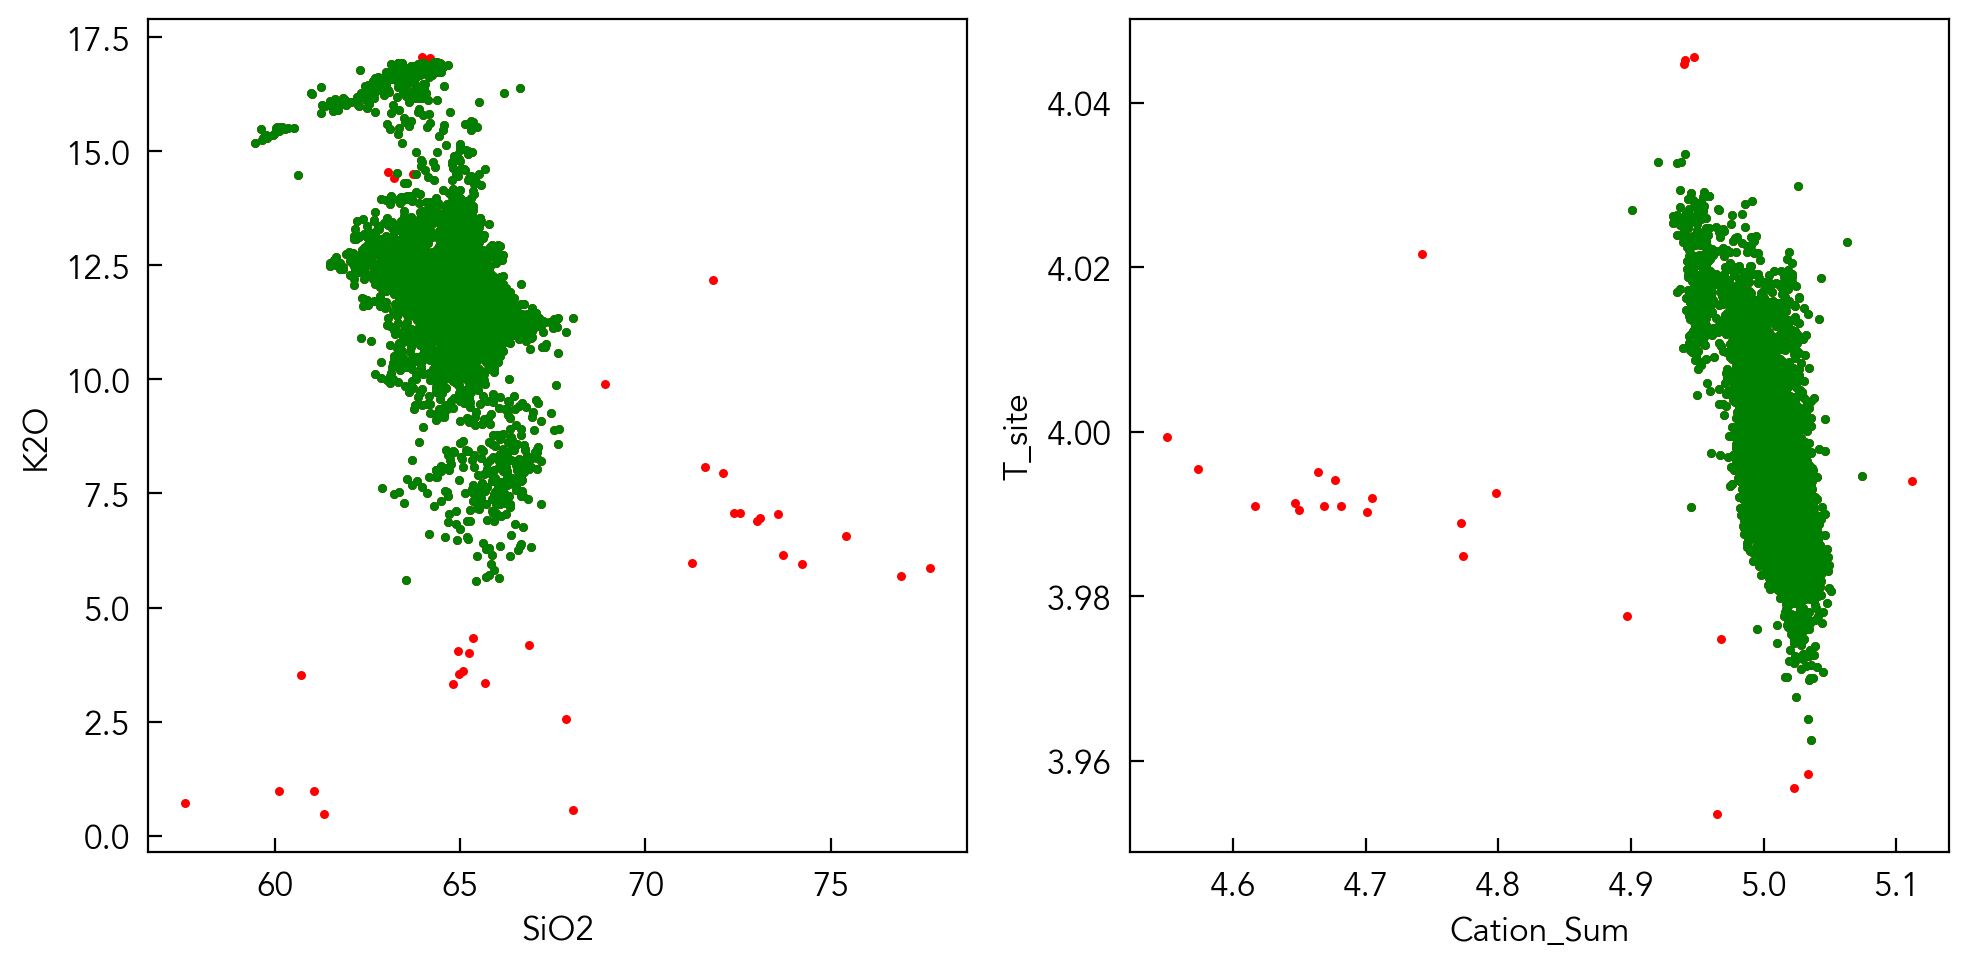

In [ ]:
# %% 

ksp_calc = mm.FeldsparCalculator(min_df[min_df.Mineral=='KFeldspar'])
ksp_comp = ksp_calc.calculate_components()
display(ksp_comp)

ksp_comp_filt = ksp_comp.loc[((ksp_comp.Cation_Sum.between(4.9, 5.1)) & (ksp_comp.T_site.between(3.96, 4.04)) & (ksp_comp.SiO2.between(40, 80)) & (ksp_comp.K2O.between(5, 17)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(ksp_comp['SiO2'], ksp_comp['K2O'], s = 5, color = 'r')
ax[0].scatter(ksp_comp_filt['SiO2'], ksp_comp_filt['K2O'], s = 5, color = 'g')
ax[0].set_xlabel('SiO2')
ax[0].set_ylabel('K2O')
ax[1].scatter(ksp_comp['Cation_Sum'], ksp_comp['T_site'], s = 5, color = 'r')
ax[1].scatter(ksp_comp_filt['Cation_Sum'], ksp_comp_filt['T_site'], s = 5, color = 'g')
ax[1].set_xlabel('Cation_Sum')
ax[1].set_ylabel('T_site')
plt.tight_layout()

Sample Name       SiO2    TiO2      Al2O3      FeOt     MnO  \
0     VS219_129 / 1 . _Leu  54.700800  0.1130  23.037800  0.520800  0.0064   
1     VS219_130 / 1 . _Leu  53.966800  0.2247  23.457600  0.346000  0.0064   
2     VS219_160 / 1 . _Leu  54.272900  0.0940  22.597200  0.426800  0.0128   
3     VS219G_67 / 1 . _Leu  54.406800  0.0238  23.070100  0.437300  0.0000   
4     VS219G_68 / 1 . _Leu  54.684600  0.0483  23.242700  0.382900  0.0343   
...                    ...        ...     ...        ...       ...     ...   
1622                1/5_32  55.526016  0.1460  22.024641  0.965281  0.0020   
1623                1/5_33  55.650816  0.1410  22.151705  0.965281  0.0080   
1624                1/5_34  56.530406  0.3310  20.803706  1.959291  0.0180   
1625                1/5_35  55.496064  0.1720  21.938709  1.146846     NaN   
1626                1/5_36  56.098099  0.2360  21.758348  1.292787  0.0030   

           MgO  CaO      Na2O      K2O  ...  Ca_cat_6ox  Na_cat_6ox  \
0     0.049300  NaN  0.020500  21.7093  ...         0.0    0.001448   
1     0.009400  NaN  0.044900  21.2721  ...         0.0    0.003191   
2     0.000000  NaN  0.043900  21.1794  ...         0.0    0.003142   
3     0.000000  NaN  0.040100  21.4919  ...         0.0    0.002849   
4     0.007300  NaN  0.036100  21.5112  ...         0.0    0.002551   
...        ...  ...       ...      ...  ...         ...         ...   
1622  0.205758  NaN  0.079380  20.4670  ...         0.0    0.005614   
1623  0.202860  NaN  0.064386  20.5590  ...         0.0    0.004540   
1624  0.505218  NaN  0.076734  19.8980  ...         0.0    0.005393   
1625  0.250194  NaN  0.054684  20.5140  ...         0.0    0.003867   
1626  0.286902  NaN  0.063504  20.3940  ...         0.0    0.004461   

      K_cat_6ox  P_cat_6ox  Cr_cat_6ox  Mineral             Source  \
0      1.009047        0.0    0.000000  Leucite   Andersenetal2014   
1      0.994879        0.0    0.000000  Leucite   Andersenetal2014   
2      0.997288        0.0    0.000000  Leucite   Andersenetal2014   
3      1.004638        0.0    0.000000  Leucite   Andersenetal2014   
4      1.000040        0.0    0.000000  Leucite   Andersenetal2014   
...         ...        ...         ...      ...                ...   
1622   0.952497        0.0    0.000461  Leucite  Migdisovaetal2023   
1623   0.953832        0.0    0.000374  Leucite  Migdisovaetal2023   
1624   0.920162        0.0    0.000258  Leucite  Migdisovaetal2023   
1625   0.954443        0.0    0.000260  Leucite  Migdisovaetal2023   
1626   0.942625        0.0    0.000143  Leucite  Migdisovaetal2023   

      Cation_Sum  Channel_site    T_site  
0       4.014555      1.010495  2.982216  
1       4.007598      0.998070  2.992004  
2       4.002863      1.000429  2.986246  
3       4.011386      1.007486  2.989842  
4       4.008067      1.002591  2.991026  
...          ...           ...       ...  
1622    3.975780      0.958111  2.972497  
1623    3.976538      0.958372  2.973328  
1624    3.960051      0.925555  2.937953  
1625    3.978837      0.958310  2.966962  
1626    3.970004      0.947086  2.961577  

[1627 rows x 50 columns]

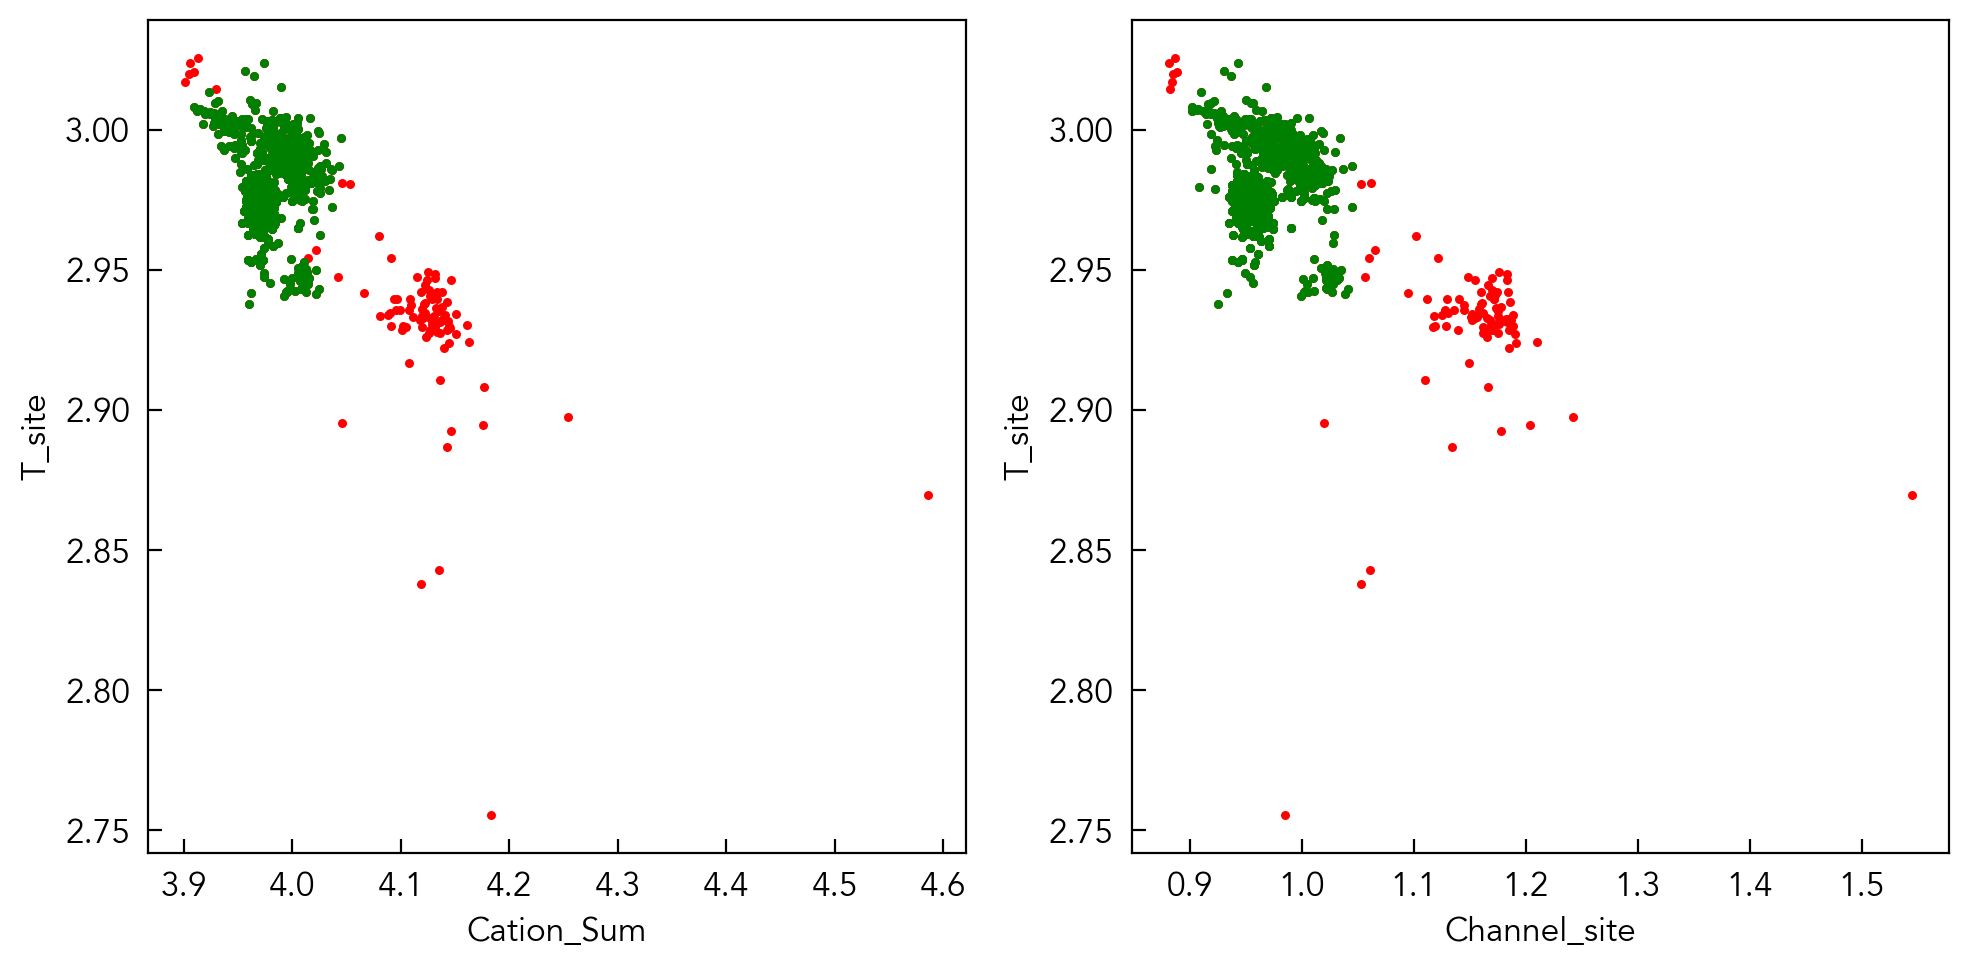

In [ ]:
# %% 

lc_calc = mm.LeuciteCalculator(min_df[min_df.Mineral=='Leucite'])
lc_comp = lc_calc.calculate_components()
display(lc_comp)

lc_comp_filt = lc_comp.loc[((lc_comp.Cation_Sum.between(3.90, 4.1)) & (lc_comp.T_site.between(2.9, 3.1)) & (lc_comp.Channel_site.between(0.9, 1.05)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(lc_comp['Cation_Sum'], lc_comp['T_site'], s = 5, color = 'r')
ax[0].scatter(lc_comp_filt['Cation_Sum'], lc_comp_filt['T_site'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('T_site')
ax[1].scatter(lc_comp['Channel_site'], lc_comp['T_site'], s = 5, color = 'r')
ax[1].scatter(lc_comp_filt['Channel_site'], lc_comp_filt['T_site'], s = 5, color = 'g')
ax[1].set_xlabel('Channel_site')
ax[1].set_ylabel('T_site')
plt.tight_layout()

Sample Name    SiO2     TiO2   Al2O3     FeOt     MnO  \
0                          UC1080  0.1600  16.5720  0.9410  74.5150  0.5650   
1                          UC1210  1.8800  12.9708  1.5406  76.9163  0.6829   
2                       NT213-12F  0.0840  11.7400  1.7730  78.6080  0.5520   
3                          UC1176  0.0795  12.7306  1.2633  79.2650  0.7099   
4                          UC1039  0.0770  11.8190  1.9170  79.3650  0.5210   
...                           ...     ...      ...     ...      ...     ...   
3617     AC3-ox83_Tmt (Microlite)  0.1280  18.3900  2.0350  72.4740  0.8880   
3618     AC3-ox84_Tmt (Microlite)  0.1500  18.0840  1.9690  72.6670  0.8650   
3619  AC1-1-ox128_Tmt (Microlite)  0.2070  15.9330  1.8950  75.4030  0.7050   
3620  AC1-1-ox129_Tmt (Microlite)  0.2530  15.7060  1.8500  76.0130  0.7120   
3621    MV3-ox172_Tmt (Microlite)  0.1650  19.5360  1.6710  73.5350  0.7520   

         MgO     CaO  Na2O  K2O  ...  K_cat_4ox  P_cat_4ox  Cr_cat_4ox  \
0     0.8510  0.0370   NaN  NaN  ...        0.0        0.0    0.000417   
1     0.4379  0.0973   NaN  NaN  ...        0.0        0.0    0.000431   
2     0.7730  0.1720   NaN  NaN  ...        0.0        0.0    0.002926   
3     0.7289  0.0187   NaN  NaN  ...        0.0        0.0    0.000505   
4     1.1690  0.0280   NaN  NaN  ...        0.0        0.0    0.001301   
...      ...     ...   ...  ...  ...        ...        ...         ...   
3617  2.2950  0.4510   NaN  NaN  ...        0.0        0.0    0.000425   
3618  2.2630  0.2420   NaN  NaN  ...        0.0        0.0    0.000428   
3619  1.2870  0.2010   NaN  NaN  ...        0.0        0.0    0.000304   
3620  1.1220  0.0760   NaN  NaN  ...        0.0        0.0    0.001151   
3621  1.2510  0.1010   NaN  NaN  ...        0.0        0.0    0.000000   

        Mineral           Source  Cation_Sum    A_site  A_site_expanded  \
0     Magnetite  Deeringetal2010    3.420212  2.793094         2.814116   
1     Magnetite  Deeringetal2010    3.452066  2.834532         2.859765   
2     Magnetite  Deeringetal2010    3.548565  3.019090         3.040192   
3     Magnetite  Deeringetal2010    3.534874  3.008510         3.035359   
4     Magnetite  Deeringetal2010    3.550018  3.028212         3.047830   
...         ...              ...         ...       ...              ...   
3617  Magnetite    Brahmetal2018    3.372895  2.645010         2.676079   
3618  Magnetite    Brahmetal2018    3.378857  2.667981         2.698455   
3619  Magnetite    Brahmetal2018    3.430293  2.777955         2.803484   
3620  Magnetite    Brahmetal2018    3.435358  2.794135         2.819963   
3621  Magnetite    Brahmetal2018    3.344668  2.617863         2.644180   

        B_site     Fe_Ti  
0     0.597326  3.285559  
1     0.505741  3.232156  
2     0.496264  3.366103  
3     0.495070  3.388070  
4     0.497431  3.346422  
...        ...       ...  
3617  0.671567  3.075748  
3618  0.663379  3.094090  
3619  0.608752  3.208892  
3620  0.601072  3.229041  
3621  0.689199  3.148642  

[3622 rows x 52 columns]

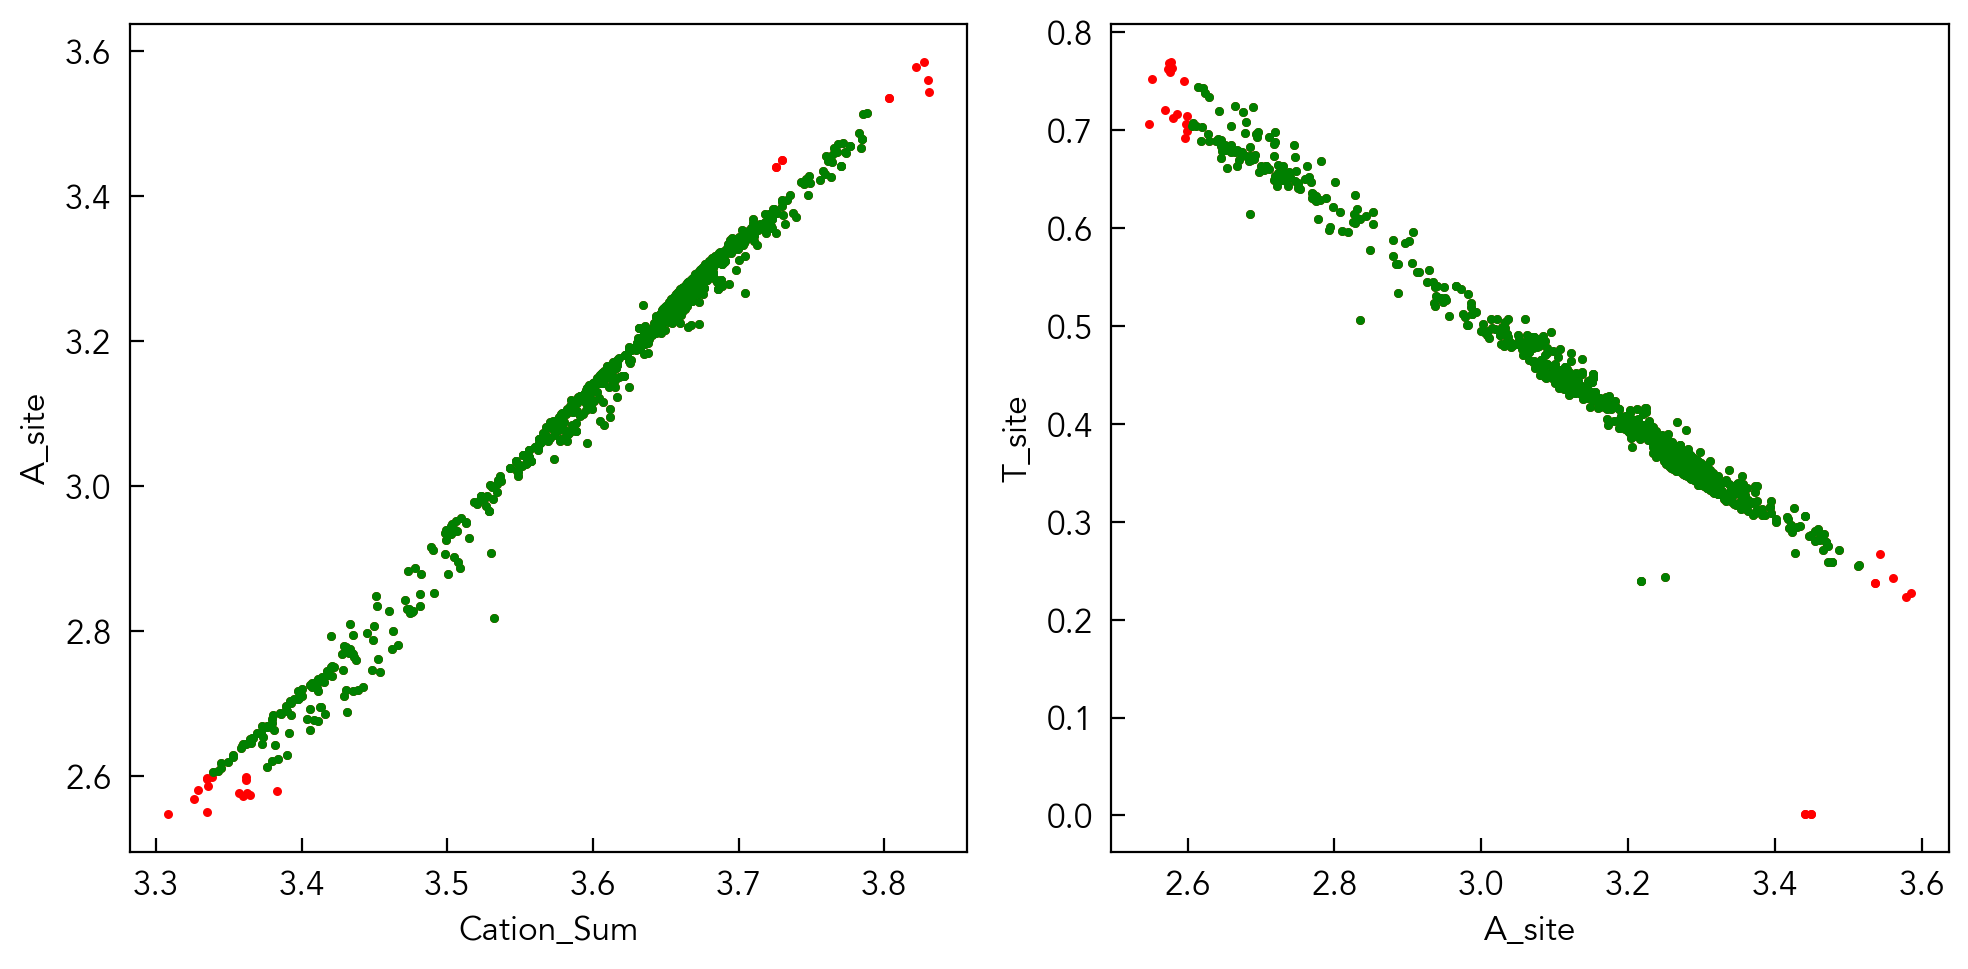

In [ ]:
# %%

mt_calc = mm.MagnetiteCalculator(min_df[min_df.Mineral=='Magnetite'])
mt_comp = mt_calc.calculate_components()
display(mt_comp)

mt_comp_filt = mt_comp.loc[((mt_comp.Cation_Sum.between(3.2, 3.8)) & (mt_comp.A_site.between(2.6, 3.6)) & (mt_comp.B_site.between(0.2, 0.8)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(mt_comp['Cation_Sum'], mt_comp['A_site'], s = 5, color = 'r')
ax[0].scatter(mt_comp_filt['Cation_Sum'], mt_comp_filt['A_site'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('A_site')
ax[1].scatter(mt_comp['A_site'], mt_comp['B_site'], s = 5, color = 'r')
ax[1].scatter(mt_comp_filt['A_site'], mt_comp_filt['B_site'], s = 5, color = 'g')
ax[1].set_xlabel('A_site')
ax[1].set_ylabel('T_site')
plt.tight_layout()

Sample Name     SiO2    TiO2   Al2O3    FeOt     MnO      MgO      CaO  \
0     S80_7 / 2 .   41.0155  0.0521  5.6907  5.2198  0.1310   6.6045  28.6936   
1     S80_7 / 3 .   41.5597  0.0501  5.7844  4.4998  0.0682   7.0200  30.7951   
2     S80_7 / 4 .   41.8556  0.0449  5.9864  4.4798  0.0661   7.4439  31.3132   
3     S80_7 / 5 .   42.2129  0.0428  6.1056  3.7652  0.0504   7.6324  33.4048   
4     S80_7 / 6 .   41.7562  0.0345  6.3175  3.4506  0.1193   7.7924  33.8264   
...            ...      ...     ...     ...     ...     ...      ...      ...   
1181   Melilite_79  44.4600     NaN  6.3500  1.9700     NaN  10.1500  38.5500   
1182   Melilite_80  44.1100     NaN  4.6100  2.2500  0.2800  11.0400  39.5400   
1183   Melilite_81  42.9400     NaN  8.1200  3.9400  0.2600   7.7600  37.5300   
1184   Melilite_82  42.4900     NaN  7.3300  2.9200     NaN   9.0700  38.0700   
1185   Melilite_83  42.4900     NaN  6.5200  3.1800     NaN   9.3000  38.3500   

        Na2O     K2O  ...  Na_cat_7ox  K_cat_7ox  P_cat_7ox  Cr_cat_7ox  \
0     3.7814  0.1842  ...    0.363932   0.011665        0.0         0.0   
1     3.6693  0.1274  ...    0.345016   0.007882        0.0         0.0   
2     3.8040  0.2444  ...    0.352036   0.014882        0.0         0.0   
3     3.7534  0.0952  ...    0.341099   0.005693        0.0         0.0   
4     3.6398  0.0929  ...    0.331168   0.005562        0.0         0.0   
...      ...     ...  ...         ...        ...        ...         ...   
1181  1.9300  0.4800  ...    0.163298   0.026722        0.0         0.0   
1182  1.2800     NaN  ...    0.109567   0.000000        0.0         0.0   
1183  2.2200     NaN  ...    0.191080   0.000000        0.0         0.0   
1184  1.8600     NaN  ...    0.161309   0.000000        0.0         0.0   
1185  1.7300  0.4600  ...    0.150423   0.026317        0.0         0.0   

       Mineral            Source  Cation_Sum    A_site    B_site    T_site  
0     Melilite  Andersenetal2012    4.983433  1.890017  1.038338  2.035957  
1     Melilite  Andersenetal2012    4.993818  1.945177  1.020636  2.015493  
2     Melilite  Andersenetal2012    5.015661  1.953436  1.045254  1.997804  
3     Melilite  Andersenetal2012    5.024666  2.018705  1.018178  1.978578  
4     Melilite  Andersenetal2012    5.032945  2.031968  1.029955  1.959499  
...        ...               ...         ...       ...       ...       ...  
1181  Melilite    Barkovetal2014    4.991516  1.965793  1.058803  1.940198  
1182  Melilite    Barkovetal2014    4.987420  1.979965  1.049558  1.947427  
1183  Melilite    Barkovetal2014    4.976881  1.976197  1.084670  1.906238  
1184  Melilite    Barkovetal2014    4.986872  1.985850  1.100450  1.900572  
1185  Melilite    Barkovetal2014    5.010571  1.993144  1.085616  1.905495  

[1186 rows x 51 columns]

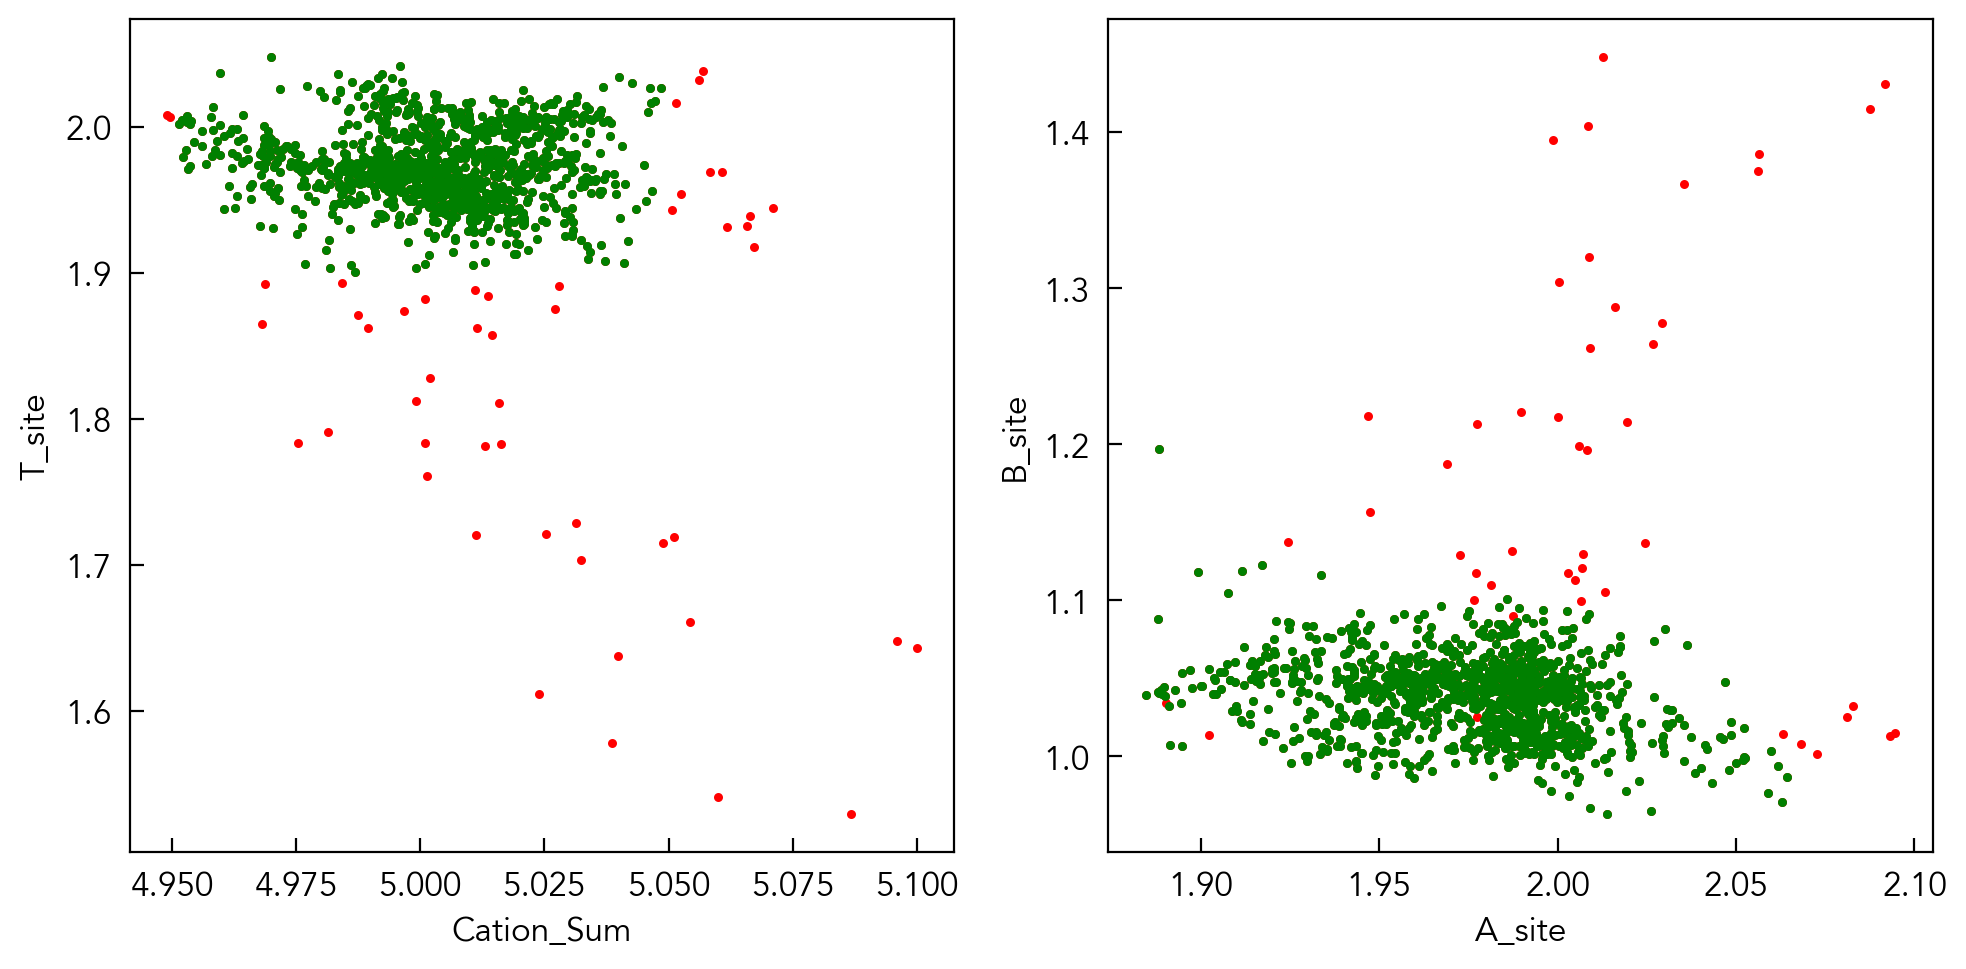

In [ ]:
# %% 

ml_calc = mm.MeliliteCalculator(min_df[min_df.Mineral=='Melilite'])
ml_comp = ml_calc.calculate_components()
display(ml_comp)

ml_comp_filt = ml_comp.loc[((ml_comp.Cation_Sum.between(4.95, 5.05)) & (ml_comp.T_site.between(1.9, 2.1)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(ml_comp['Cation_Sum'], ml_comp['T_site'], s = 5, color = 'r')
ax[0].scatter(ml_comp_filt['Cation_Sum'], ml_comp_filt['T_site'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('T_site')
ax[1].scatter(ml_comp['A_site'], ml_comp['B_site'], s = 5, color = 'r')
ax[1].scatter(ml_comp_filt['A_site'], ml_comp_filt['B_site'], s = 5, color = 'g')
ax[1].set_xlabel('A_site')
ax[1].set_ylabel('B_site')
plt.tight_layout()

Sample Name    SiO2  TiO2   Al2O3   FeOt    MnO    MgO   CaO   Na2O  \
0            WS5_37  44.800  0.24  35.120  0.269  0.040  3.220  0.16  0.150   
1            WS5_55  50.080  0.32  31.650  0.111  0.000  3.440  0.01  0.090   
2            WS5_43  45.680  0.78  33.050  0.102  0.000  3.740  0.00  0.090   
3            WS2_41  47.720  0.26  37.700  0.113  0.000  1.200  0.00  0.370   
4            WS2_59  50.450  0.36  33.830  0.110  0.010  2.330  0.00  0.190   
...             ...     ...   ...     ...    ...    ...    ...   ...    ...   
1310  BLS1807 _2-13  49.515  0.00  36.996  0.735  0.034  0.006  0.00  0.200   
1311  BLS1807 _2-16  48.927  0.00  34.841  1.311  0.054  0.019  0.00  0.214   
1312  BLS1807 _2-17  48.426  0.00  35.317  1.361  0.075  0.045  0.00  0.246   
1313  BLS1807 _2-19  46.967  0.00  37.252  0.658  0.045  0.005  0.00  0.335   
1314  BLS1807 _2-20  47.530  0.00  37.095  0.597  0.016  0.003  0.00  0.339   

         K2O  ...  P_cat_11ox  Cr_cat_11ox    Mineral        Source  \
0     10.570  ...         0.0          0.0  Muscovite  Sahaetal2011   
1     10.430  ...         0.0          0.0  Muscovite  Sahaetal2011   
2     10.090  ...         0.0          0.0  Muscovite  Sahaetal2011   
3     10.320  ...         0.0          0.0  Muscovite  Sahaetal2011   
4     10.820  ...         0.0          0.0  Muscovite  Sahaetal2011   
...      ...  ...         ...          ...        ...           ...   
1310  10.725  ...         0.0          0.0  Muscovite  Xingetal2020   
1311  10.637  ...         0.0          0.0  Muscovite  Xingetal2020   
1312  10.591  ...         0.0          0.0  Muscovite  Xingetal2020   
1313  10.721  ...         0.0          0.0  Muscovite  Xingetal2020   
1314  10.642  ...         0.0          0.0  Muscovite  Xingetal2020   

      Cation_Sum    X_site     Al_IV     Al_VI    M_site  T_site  
0       7.060855  0.934500  0.998177  1.775261  2.126355     4.0  
1       6.939002  0.880374  0.731976  1.702197  2.058628     4.0  
2       7.007149  0.879655  0.920071  1.706220  2.127495     4.0  
3       6.942350  0.891463  0.935755  1.917374  2.050886     4.0  
4       6.932268  0.906815  0.771834  1.779419  2.025453     4.0  
...          ...       ...       ...       ...       ...     ...  
1310    6.891883  0.899190  0.835573  1.950998  1.992692     4.0  
1311    6.900475  0.917800  0.789010  1.905861  1.982674     4.0  
1312    6.913582  0.918352  0.820743  1.911931  1.995230     4.0  
1313    6.945593  0.940574  0.916512  1.965900  2.005019     4.0  
1314    6.929226  0.930450  0.892964  1.964961  1.998776     4.0  

[1315 rows x 53 columns]

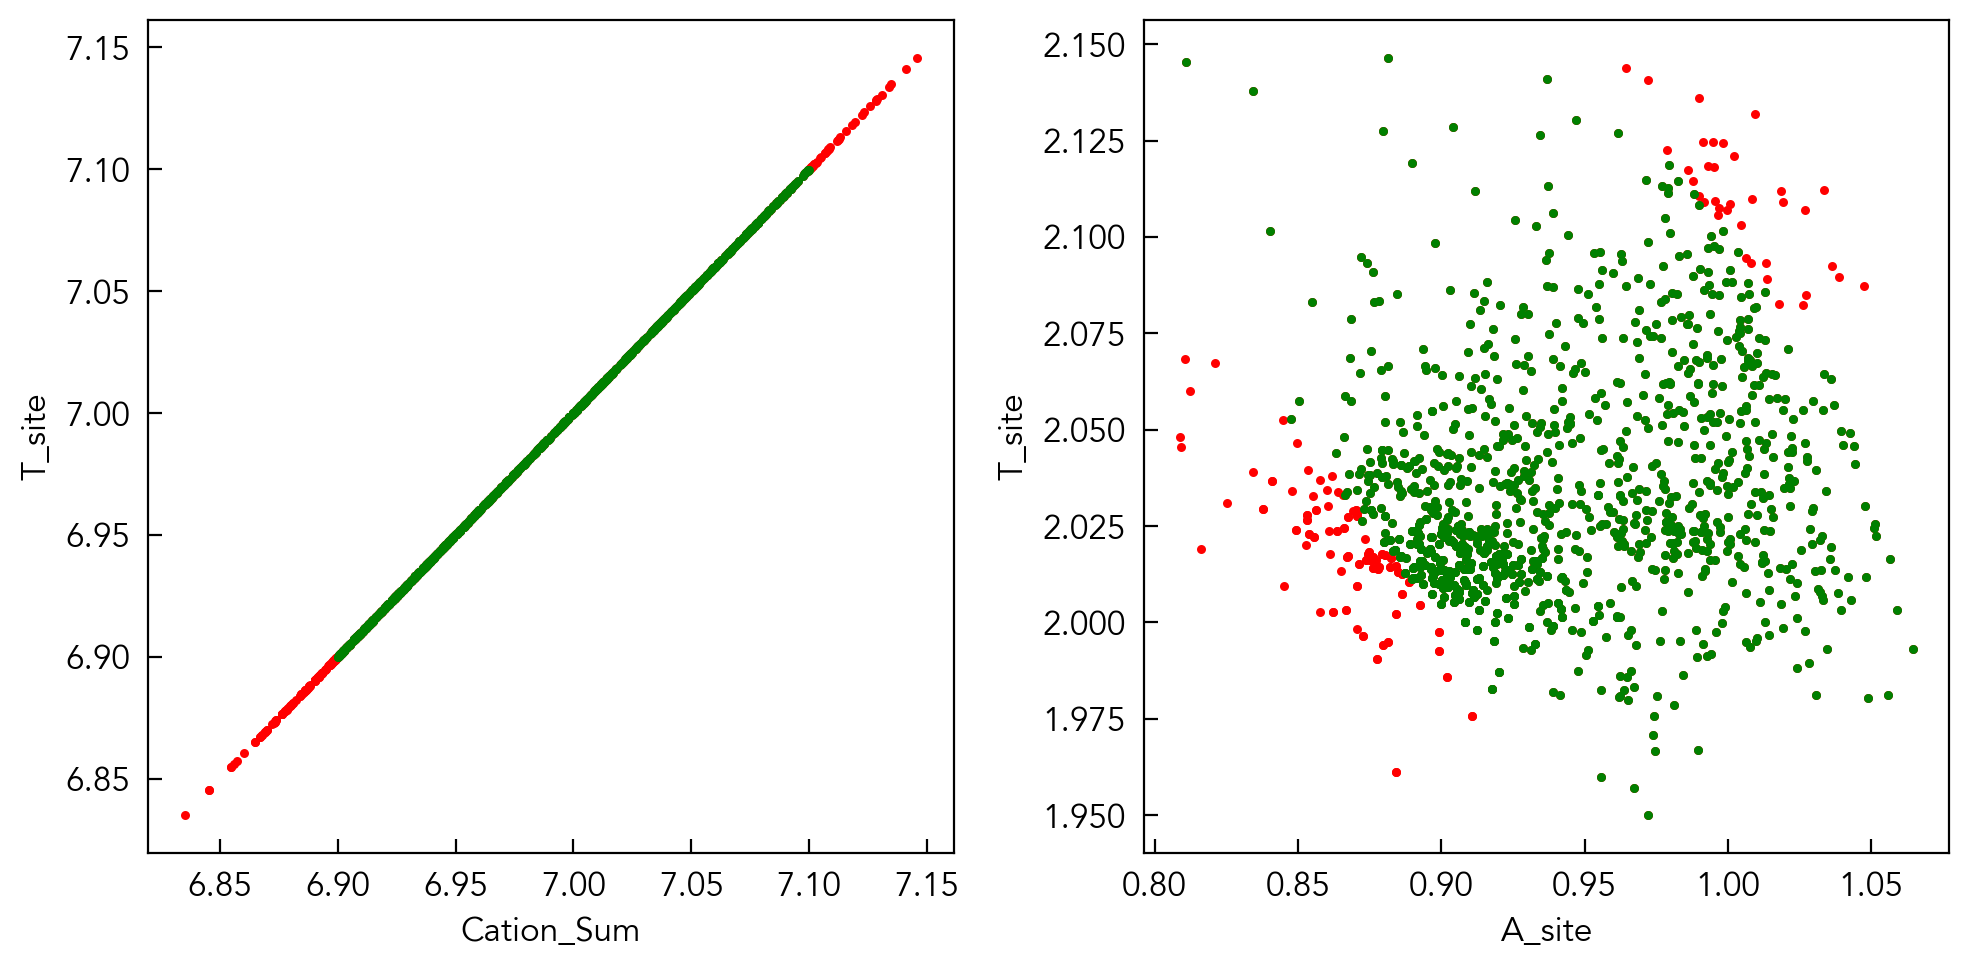

In [ ]:
# %% 

ms_calc = mm.MuscoviteCalculator(min_df[min_df.Mineral=='Muscovite'])
ms_comp = ms_calc.calculate_components()
display(ms_comp)

ms_comp_filt = ms_comp.loc[((ms_comp.Cation_Sum.between(6.9, 7.1)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(ms_comp['Cation_Sum'], ms_comp['Cation_Sum'], s = 5, color = 'r')
ax[0].scatter(ms_comp_filt['Cation_Sum'], ms_comp_filt['Cation_Sum'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('T_site')
ax[1].scatter(ms_comp['X_site'], ms_comp['M_site'], s = 5, color = 'r')
ax[1].scatter(ms_comp_filt['X_site'], ms_comp_filt['M_site'], s = 5, color = 'g')
ax[1].set_xlabel('A_site')
ax[1].set_ylabel('T_site')
plt.tight_layout()

Sample Name    SiO2  TiO2   Al2O3  FeOt  MnO  MgO    CaO  \
0                 10_N_1   42.033   NaN  32.705  0.00  NaN  NaN  0.105   
1                 10_N_2   42.496   NaN  32.500  0.00  NaN  NaN  0.096   
2                 10_N_3   42.074   NaN  32.531  0.00  NaN  NaN  0.090   
3                 10_N_4   42.244   NaN  32.434  0.00  NaN  NaN  0.065   
4                 10_N_5   42.214   NaN  33.003  0.00  NaN  NaN  0.100   
...                   ...     ...   ...     ...   ...  ...  ...    ...   
1101  JC127_neph(1)-43_46  41.580   NaN  33.950  0.28  NaN  NaN  1.400   
1102  JC127_neph(1)-44_47  41.750   NaN  33.720  0.36  NaN  NaN  1.320   
1103    JC78_neph(1)-5_16  40.270   NaN  34.880  0.46  NaN  NaN  0.160   
1104    JC78_neph(1)-6_17  40.510   NaN  34.360  0.78  NaN  NaN  0.230   
1105    JC78_neph(1)-7_18  40.430   NaN  34.770  0.78  NaN  NaN  0.270   

        Na2O    K2O  ...  K_cat_32ox  P_cat_32ox  Cr_cat_32ox    Mineral  \
0     15.507  7.859  ...    1.979918         0.0          0.0  Nepheline   
1     15.679  7.757  ...    1.946346         0.0          0.0  Nepheline   
2     15.625  7.838  ...    1.976344         0.0          0.0  Nepheline   
3     15.846  7.918  ...    1.991509         0.0          0.0  Nepheline   
4     15.690  7.884  ...    1.973105         0.0          0.0  Nepheline   
...      ...    ...  ...         ...         ...          ...        ...   
1101  14.740  6.400  ...    1.600083         0.0          0.0  Nepheline   
1102  14.670  6.400  ...    1.601587         0.0          0.0  Nepheline   
1103  15.020  9.010  ...    2.255625         0.0          0.0  Nepheline   
1104  15.400  8.420  ...    2.109273         0.0          0.0  Nepheline   
1105  15.360  8.680  ...    2.164646         0.0          0.0  Nepheline   

                 Source  Cation_Sum  A_B_site    A_site    B_site     T_site  
0       Zaitsevetal2012   23.852070  7.917319  1.979918  5.937401  15.912534  
1       Zaitsevetal2012   23.837598  7.925412  1.946346  5.979065  15.891956  
2       Zaitsevetal2012   23.877115  7.964123  1.976344  5.987779  15.893932  
3       Zaitsevetal2012   23.927537  8.048752  1.991509  6.057243  15.865054  
4       Zaitsevetal2012   23.873831  7.940915  1.973105  5.967811  15.911897  
...                 ...         ...       ...       ...       ...        ...  
1101  Beccaluvaetal2017   23.530963  7.200866  1.600083  5.600783  15.990235  
1102  Beccaluvaetal2017   23.502933  7.181009  1.601587  5.579422  15.985434  
1103  Beccaluvaetal2017   24.049153  7.970419  2.255625  5.714794  15.969601  
1104  Beccaluvaetal2017   24.055530  7.972411  2.109273  5.863138  15.906639  
1105  Beccaluvaetal2017   24.084437  7.986307  2.164646  5.821661  15.914064  

[1106 rows x 52 columns]

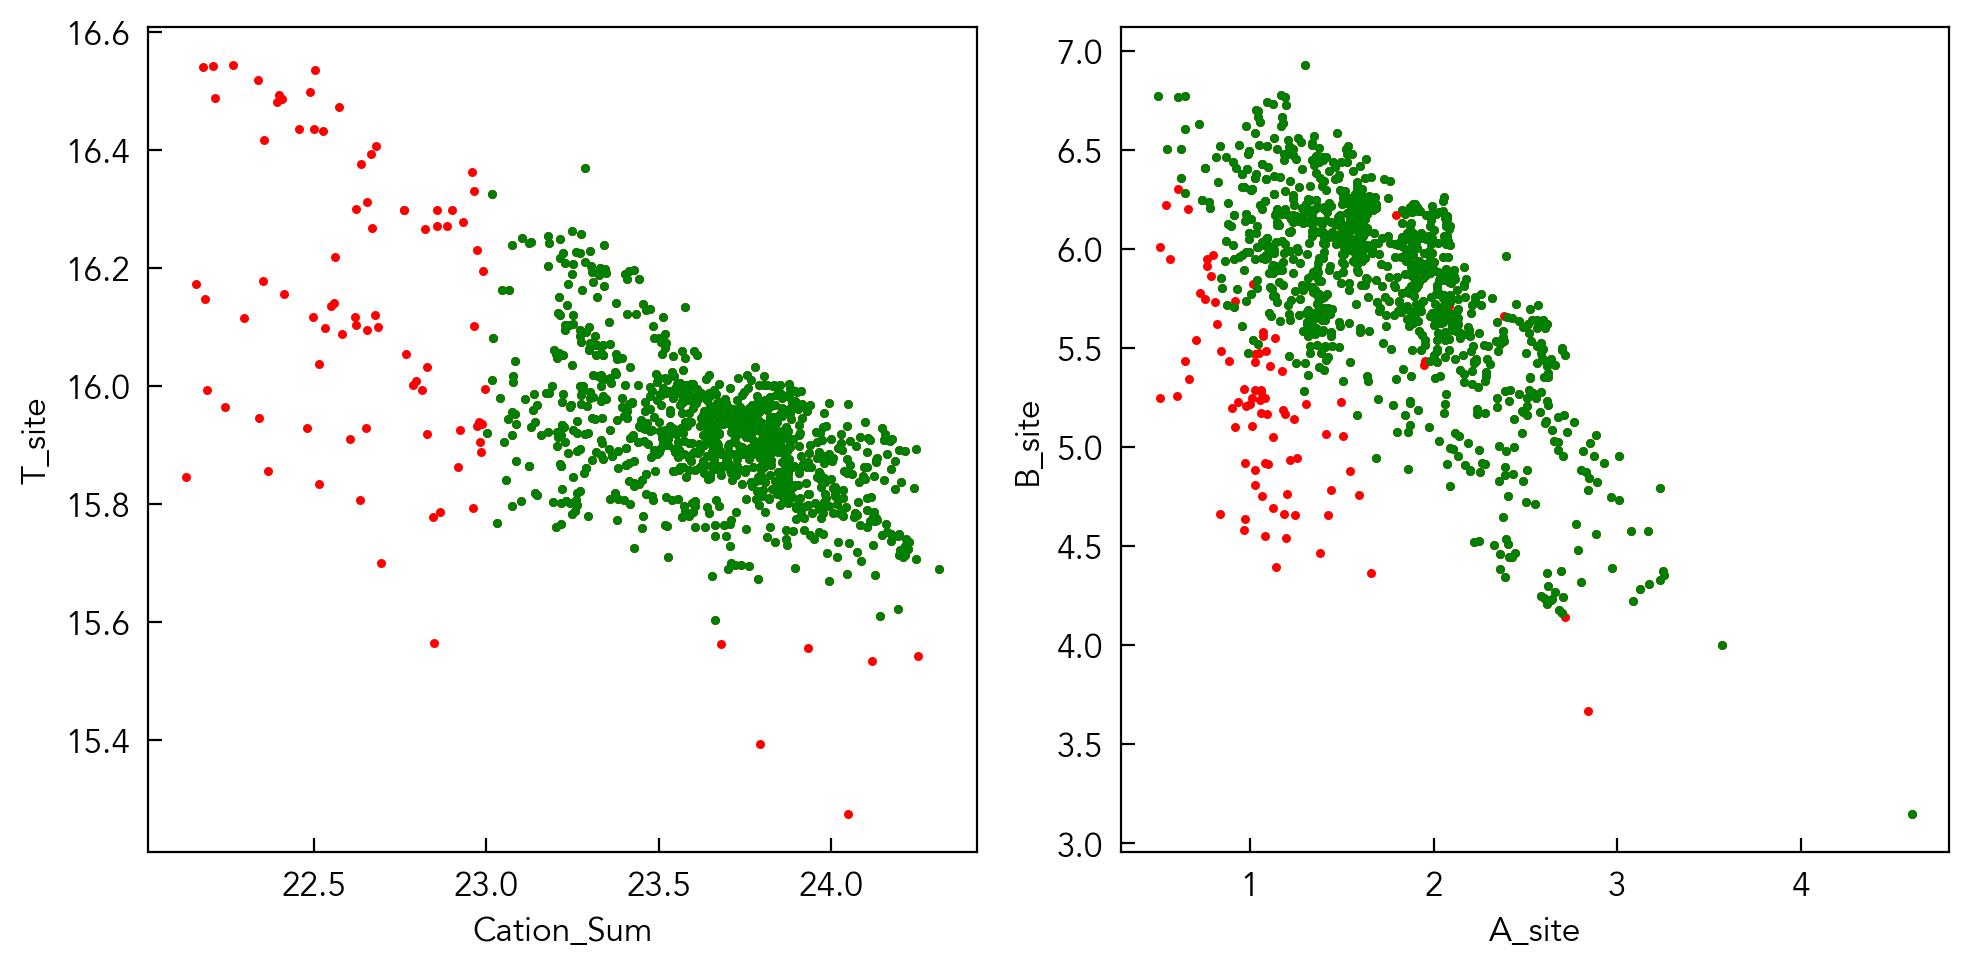

In [ ]:
# %% 

ne_calc = mm.NephelineCalculator(min_df[min_df.Mineral=='Nepheline'])
ne_comp = ne_calc.calculate_components()
display(ne_comp)

ne_comp_filt = ne_comp.loc[((ne_comp.Cation_Sum > 23) & (ne_comp.T_site.between(15.6, 16.4)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(ne_comp['Cation_Sum'], ne_comp['T_site'], s = 5, color = 'r')
ax[0].scatter(ne_comp_filt['Cation_Sum'], ne_comp_filt['T_site'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('T_site')
ax[1].scatter(ne_comp['A_site'], ne_comp['B_site'], s = 5, color = 'r')
ax[1].scatter(ne_comp_filt['A_site'], ne_comp_filt['B_site'], s = 5, color = 'g')
ax[1].set_xlabel('A_site')
ax[1].set_ylabel('B_site')
plt.tight_layout()

Sample Name       SiO2      TiO2     Al2O3       FeOt  \
0                    CN_C_Ol1  39.846040  0.000020  0.019150  17.398750   
1                   CN_C_Ol1'  39.787840  0.010270  0.026165  17.446295   
2                    CN_C_Ol2  38.896455  0.014615  0.005655  21.791545   
3                    CN_C_Ol3  39.451170  0.000020  0.028775  19.528820   
4                CN_C_Ol3_MI2  39.680195  0.006940  0.019405  18.502340   
...                       ...        ...       ...       ...        ...   
22118  Ny17-218_218_ol15_2609  39.978400       NaN  0.051598  13.816300   
22119  Ny17-218_218_ol15_2610  39.941400       NaN  0.047951  13.752900   
22120  Ny17-218_218_ol15_2611  39.962300       NaN  0.046272  13.761100   
22121  Ny17-218_218_ol15_2612  40.049900       NaN  0.043471  13.778200   
22122  Ny17-218_218_ol15_2613  39.910300       NaN  0.042008  13.900800   

            MnO        MgO       CaO      Na2O       K2O  ...     K_cat_4ox  \
0      0.243865  43.126690  0.219630  0.014950  0.007775  ...  2.494380e-04   
1      0.324905  43.227635  0.188190  0.015305  0.006115  ...  1.960035e-04   
2      0.349310  39.472920  0.204635  0.004635  0.006005  ...  1.971287e-04   
3      0.298085  41.429130  0.231755  0.000010  0.001825  ...  5.909532e-05   
4      0.303840  42.207405  0.226190  0.018970  0.000010  ...  3.223211e-07   
...         ...        ...       ...       ...       ...  ...           ...   
22118  0.228566  44.338600  0.561022       NaN       NaN  ...  0.000000e+00   
22119  0.228811  44.237800  0.575595       NaN       NaN  ...  0.000000e+00   
22120  0.232269  44.238200  0.586127       NaN       NaN  ...  0.000000e+00   
22121  0.234757  44.236700  0.600988       NaN       NaN  ...  0.000000e+00   
22122  0.237807  44.176700  0.603244       NaN       NaN  ...  0.000000e+00   

          P_cat_4ox  Cr_cat_4ox  Mineral             Source  Cation_Sum  \
0      2.913539e-04    0.000000  Olivine      Barthetal2019    2.997719   
1      3.789371e-04    0.000000  Olivine      Barthetal2019    2.999645   
2      3.046585e-04    0.000000  Olivine      Barthetal2019    2.998494   
3      4.257927e-04    0.000000  Olivine      Barthetal2019    2.997597   
4      4.277920e-07    0.000000  Olivine      Barthetal2019    2.997498   
...             ...         ...      ...                ...         ...   
22118  0.000000e+00    0.000554  Olivine  Molendijketal2024    2.990218   
22119  0.000000e+00    0.000604  Olivine  Molendijketal2024    2.989492   
22120  0.000000e+00    0.000594  Olivine  Molendijketal2024    2.989376   
22121  0.000000e+00    0.000615  Olivine  Molendijketal2024    2.988482   
22122  0.000000e+00    0.000400  Olivine  Molendijketal2024    2.990373   

         M_site    T_site  M_site_expanded       XFo  
0      1.982721  1.002049         1.993833  0.815449  
1      1.985699  0.999676         1.997679  0.815390  
2      1.983156  1.000895         1.996411  0.763536  
3      1.982176  1.001363         1.994888  0.790868  
4      1.980687  1.002545         1.993313  0.802623  
...         ...       ...              ...       ...  
22118  1.959340  1.008738         1.979392  0.851204  
22119  1.957482  1.009492         1.977968  0.851498  
22120  1.956930  1.009638         1.977767  0.851424  
22121  1.954745  1.010564         1.976010  0.851262  
22122  1.958491  1.008801         1.979920  0.849964  

[22123 rows x 52 columns]

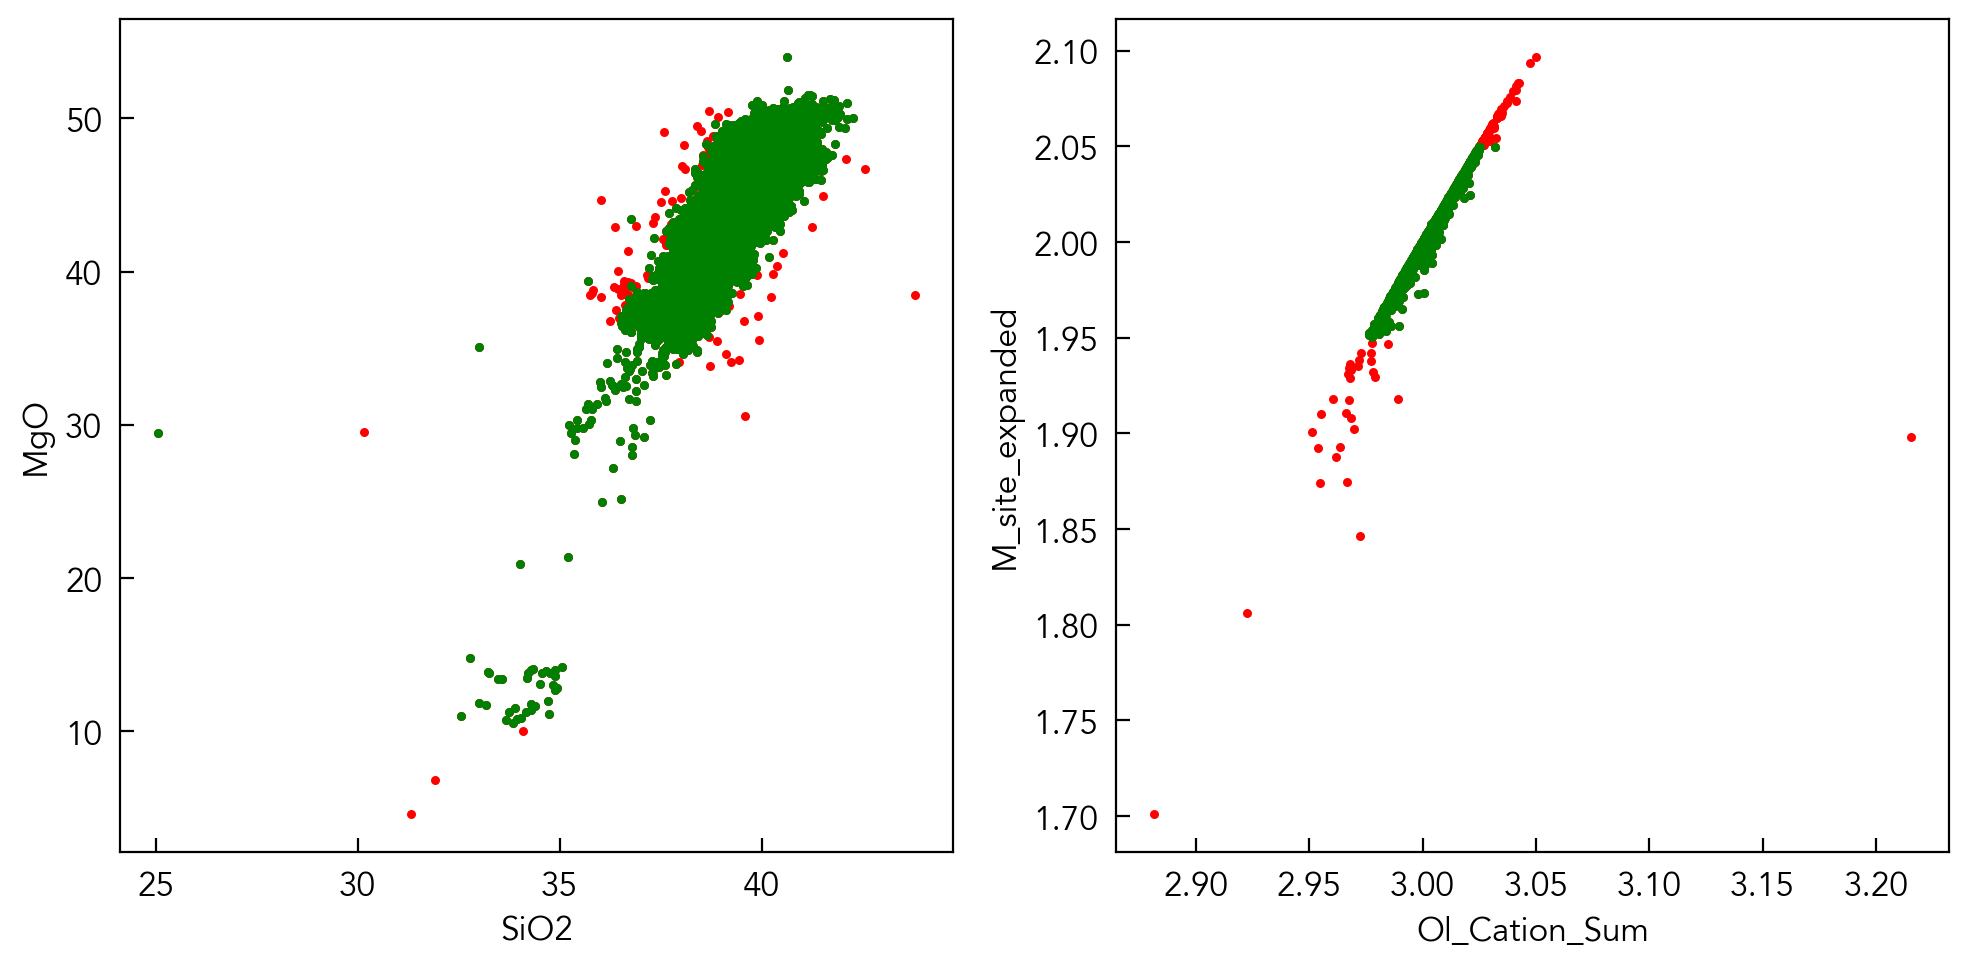

In [ ]:
# %% 

ol_calc = mm.OlivineCalculator(min_df[min_df.Mineral=='Olivine'])
ol_comp = ol_calc.calculate_components()
display(ol_comp)

ol_comp_filt = ol_comp.loc[((ol_comp.Cation_Sum.between(2.95, 3.05)) & (ol_comp.M_site_expanded.between(1.95, 2.05) )) ]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(ol_comp['SiO2'], ol_comp['MgO'], s = 5, color = 'r')
ax[0].scatter(ol_comp_filt['SiO2'], ol_comp_filt['MgO'], s = 5, color = 'g')
ax[0].set_xlabel('SiO2')
ax[0].set_ylabel('MgO')
ax[1].scatter(ol_comp['Cation_Sum'], ol_comp['M_site_expanded'], s = 5, color = 'r')
ax[1].scatter(ol_comp_filt['Cation_Sum'], ol_comp_filt['M_site_expanded'], s = 5, color = 'g')
ax[1].set_xlabel('Ol_Cation_Sum')
ax[1].set_ylabel('M_site_expanded')
plt.tight_layout()

Sample Name   SiO2    TiO2  Al2O3   FeOt     MnO    MgO     CaO  \
0           L04_N1_1  56.08  0.2769  1.868   7.21  0.1732  34.17  0.5170   
1           L04_N1_1  55.64  0.2881  2.280   7.09  0.1481  33.95  0.5643   
2           L04_N1_1  55.41  0.2719  2.450   7.04  0.1241  33.69  0.6312   
3           L04_N1_1  55.67  0.2770  2.680   7.00  0.1634  33.89  0.5825   
4           L04_N1_1  55.01  0.2766  2.670   7.13  0.1527  33.59  0.6135   
...              ...    ...     ...    ...    ...     ...    ...     ...   
5966  BT-3D_OPX 30-1  51.88  0.1600  0.780  24.46  0.9800  19.89  1.2300   
5967  BT-3D_OPX 30-2  51.26  0.1700  1.130  24.02  0.9700  19.37  1.4700   
5968  BT-3D_OPX 30-3  51.34  0.1300  0.780  24.68  0.9400  19.84  1.4000   
5969  BT-3D_OPX 30-4  51.37  0.1400  0.880  25.07  1.0800  19.23  1.2000   
5970  BT-3D_OPX 30-5  51.05  0.1500  0.980  24.25  0.9900  19.42  1.2200   

      Na2O  K2O  ...     Al_IV     Al_VI  NaAlSi2O6  FmTiAlSiO6  CrAl2SiO6  \
0      NaN  NaN  ...  0.067364  0.008507        0.0    0.007186   0.012754   
1      NaN  NaN  ...  0.077352  0.015503        0.0    0.007497   0.014286   
2      NaN  NaN  ...  0.079551  0.020526        0.0    0.007097   0.015304   
3      NaN  NaN  ...  0.084082  0.024622        0.0    0.007179   0.016195   
4      NaN  NaN  ...  0.089299  0.020001        0.0    0.007235   0.017644   
...    ...  ...  ...       ...       ...        ...         ...        ...   
5966   NaN  NaN  ...  0.025457  0.009531        0.0    0.004586   0.000301   
5967   NaN  NaN  ...  0.030603  0.020564        0.0    0.004918   0.000911   
5968   NaN  NaN  ...  0.035049  0.000135        0.0    0.003747   0.000000   
5969   NaN  NaN  ...  0.028530  0.011273        0.0    0.004046   0.000000   
5970   NaN  NaN  ...  0.029699  0.014879        0.0    0.004360   0.000610   

      FmAl2SiO6  CaFmSi2O6  Fm2Si2O6    En_Opx    Di_Opx  
0      0.000000   0.019090  0.971026  0.866022  0.017026  
1      0.001217   0.020893  0.964250  0.861220  0.018660  
2      0.005222   0.023440  0.956319  0.854377  0.020941  
3      0.008427   0.021480  0.953946  0.852796  0.019202  
4      0.002357   0.022832  0.959229  0.855187  0.020355  
...         ...        ...       ...       ...       ...  
5966   0.009230   0.050159  0.937338  0.545641  0.029198  
5967   0.019652   0.060512  0.913828  0.530031  0.035098  
5968   0.000135   0.057411  0.945562  0.548231  0.033287  
5969   0.011273   0.049344  0.937628  0.531760  0.027985  
5970   0.014269   0.050451  0.931682  0.538711  0.029171  

[5971 rows x 64 columns]

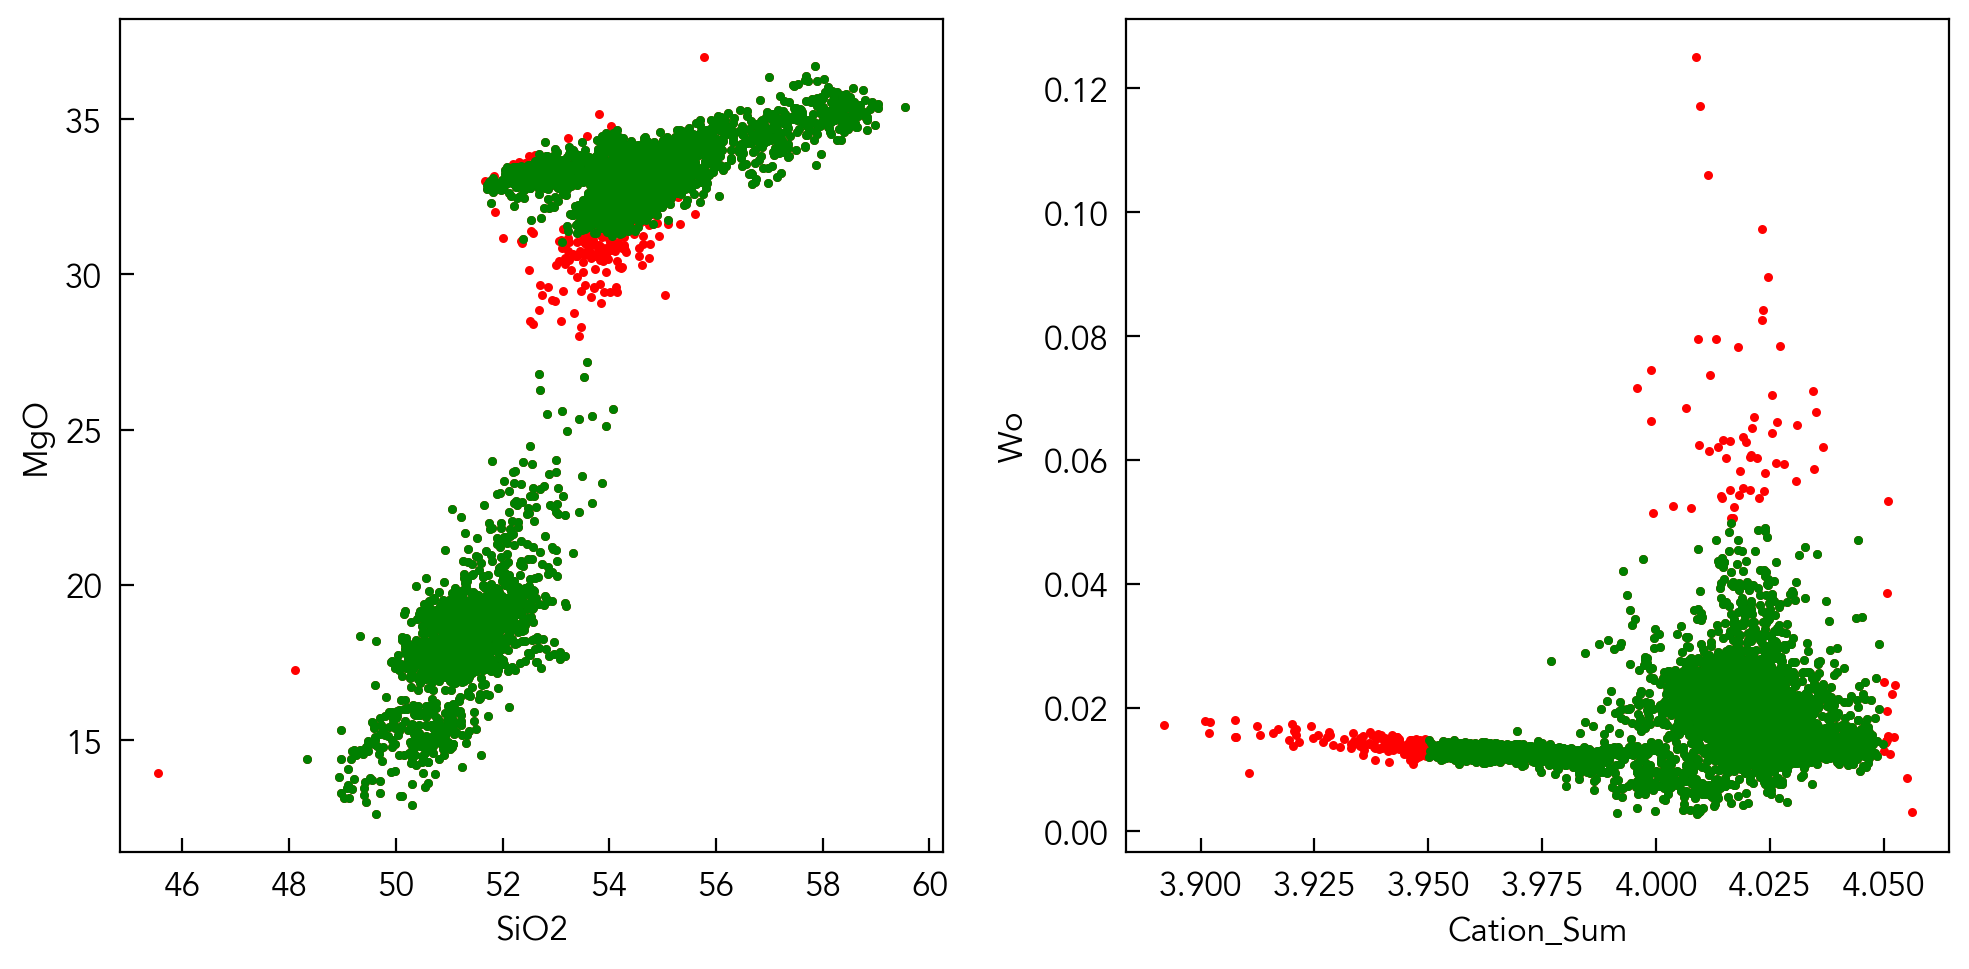

In [ ]:
# %%

opx_calc = mm.OrthopyroxeneCalculator(min_df[min_df.Mineral=='Orthopyroxene'])
opx_comp = opx_calc.calculate_components()
display(opx_comp)

opx_comp_filt = opx_comp.loc[((opx_comp.Cation_Sum.between(3.95, 4.05)) & (opx_comp.Wo.between(-0.01, 0.05) )) ]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(opx_comp['SiO2'], opx_comp['MgO'], s = 5, color = 'r')
ax[0].scatter(opx_comp_filt['SiO2'], opx_comp_filt['MgO'], s = 5, color = 'g')
ax[0].set_xlabel('SiO2')
ax[0].set_ylabel('MgO')
ax[1].scatter(opx_comp['Cation_Sum'], opx_comp['Wo'], s = 5, color = 'r')
ax[1].scatter(opx_comp_filt['Cation_Sum'], opx_comp_filt['Wo'], s = 5, color = 'g')
ax[1].set_xlabel('Cation_Sum')
ax[1].set_ylabel('Wo')
plt.tight_layout()

Sample Name     SiO2    TiO2    Al2O3    FeOt     MnO     MgO  \
0      K8_plag1_rtoc  46.6657  0.0297  32.4782  0.5769  0.0013  0.2178   
1      K8_plag1_rtoc  44.5544  0.0318  33.0280  0.6945  0.0000  0.1859   
2      K8_plag1_rtoc  45.6028  0.0204  33.7199  0.4723  0.0000  0.1631   
3      K8_plag1_rtoc  46.0039  0.0134  33.6541  0.4618  0.0000  0.1837   
4      K8_plag1_rtoc  45.4534  0.0257  33.6079  0.4594  0.0151  0.1775   
...              ...      ...     ...      ...     ...     ...     ...   
18571  BT-26_PLAG 15  63.8100  0.0000  21.6900  0.0600  0.0100  0.0000   
18572  BT-26_PLAG 15  64.7200  0.0300  21.0200  0.1100  0.0000  0.0000   
18573  BT-26_PLAG 15  64.3700  0.0000  21.6200  0.1400  0.0000  0.0100   
18574  BT-26_PLAG 15  64.5000  0.0000  21.9700  0.1600  0.0700  0.0300   
18575  BT-26_PLAG 15  63.5100  0.0100  21.5900  0.1600  0.0000  0.0300   

           CaO    Na2O     K2O  ...  P_cat_8ox  Cr_cat_8ox      Mineral  \
0      16.8384  1.7939  0.0031  ...        0.0         0.0  Plagioclase   
1      17.5145  1.2080  0.0016  ...        0.0         0.0  Plagioclase   
2      17.8024  1.2954  0.0000  ...        0.0         0.0  Plagioclase   
3      17.8203  1.4068  0.0208  ...        0.0         0.0  Plagioclase   
4      17.6952  1.3258  0.0080  ...        0.0         0.0  Plagioclase   
...        ...     ...     ...  ...        ...         ...          ...   
18571   3.0600  9.0800  1.3000  ...        0.0         0.0  Plagioclase   
18572   2.8600  9.2200  1.4000  ...        0.0         0.0  Plagioclase   
18573   2.7500  9.0000  1.2400  ...        0.0         0.0  Plagioclase   
18574   3.0200  9.1200  1.2100  ...        0.0         0.0  Plagioclase   
18575   3.3100  8.9000  1.2600  ...        0.0         0.0  Plagioclase   

                   Source  Cation_Sum    M_site    T_site        An        Ab  \
0                     Shi    5.008540  1.004698  3.965071  0.838221  0.161596   
1                     Shi    5.012302  1.003205  3.967188  0.888954  0.110949   
2                     Shi    5.009230  1.005072  3.973731  0.883647  0.116353   
3                     Shi    5.012815  1.012322  3.969442  0.873940  0.124846   
4                     Shi    5.011192  1.006139  3.973246  0.880190  0.119336   
...                   ...         ...       ...       ...       ...       ...   
18571  JollesandLange2019    5.006269  1.007835  3.995813  0.145446  0.780982   
18572  JollesandLange2019    5.002859  1.012138  3.985618  0.134835  0.786578   
18573  JollesandLange2019    4.988360  0.979226  4.003254  0.134065  0.793959   
18574  JollesandLange2019    5.000612  0.993192  3.996905  0.144057  0.787221   
18575  JollesandLange2019    5.003425  1.005150  3.989930  0.158257  0.770015   

                 Or  
0      1.837404e-04  
1      9.669125e-05  
2      1.110223e-16  
3      1.214550e-03  
4      4.738013e-04  
...             ...  
18571  7.357157e-02  
18572  7.858693e-02  
18573  7.197617e-02  
18574  6.872241e-02  
18575  7.172836e-02  

[18576 rows x 53 columns]

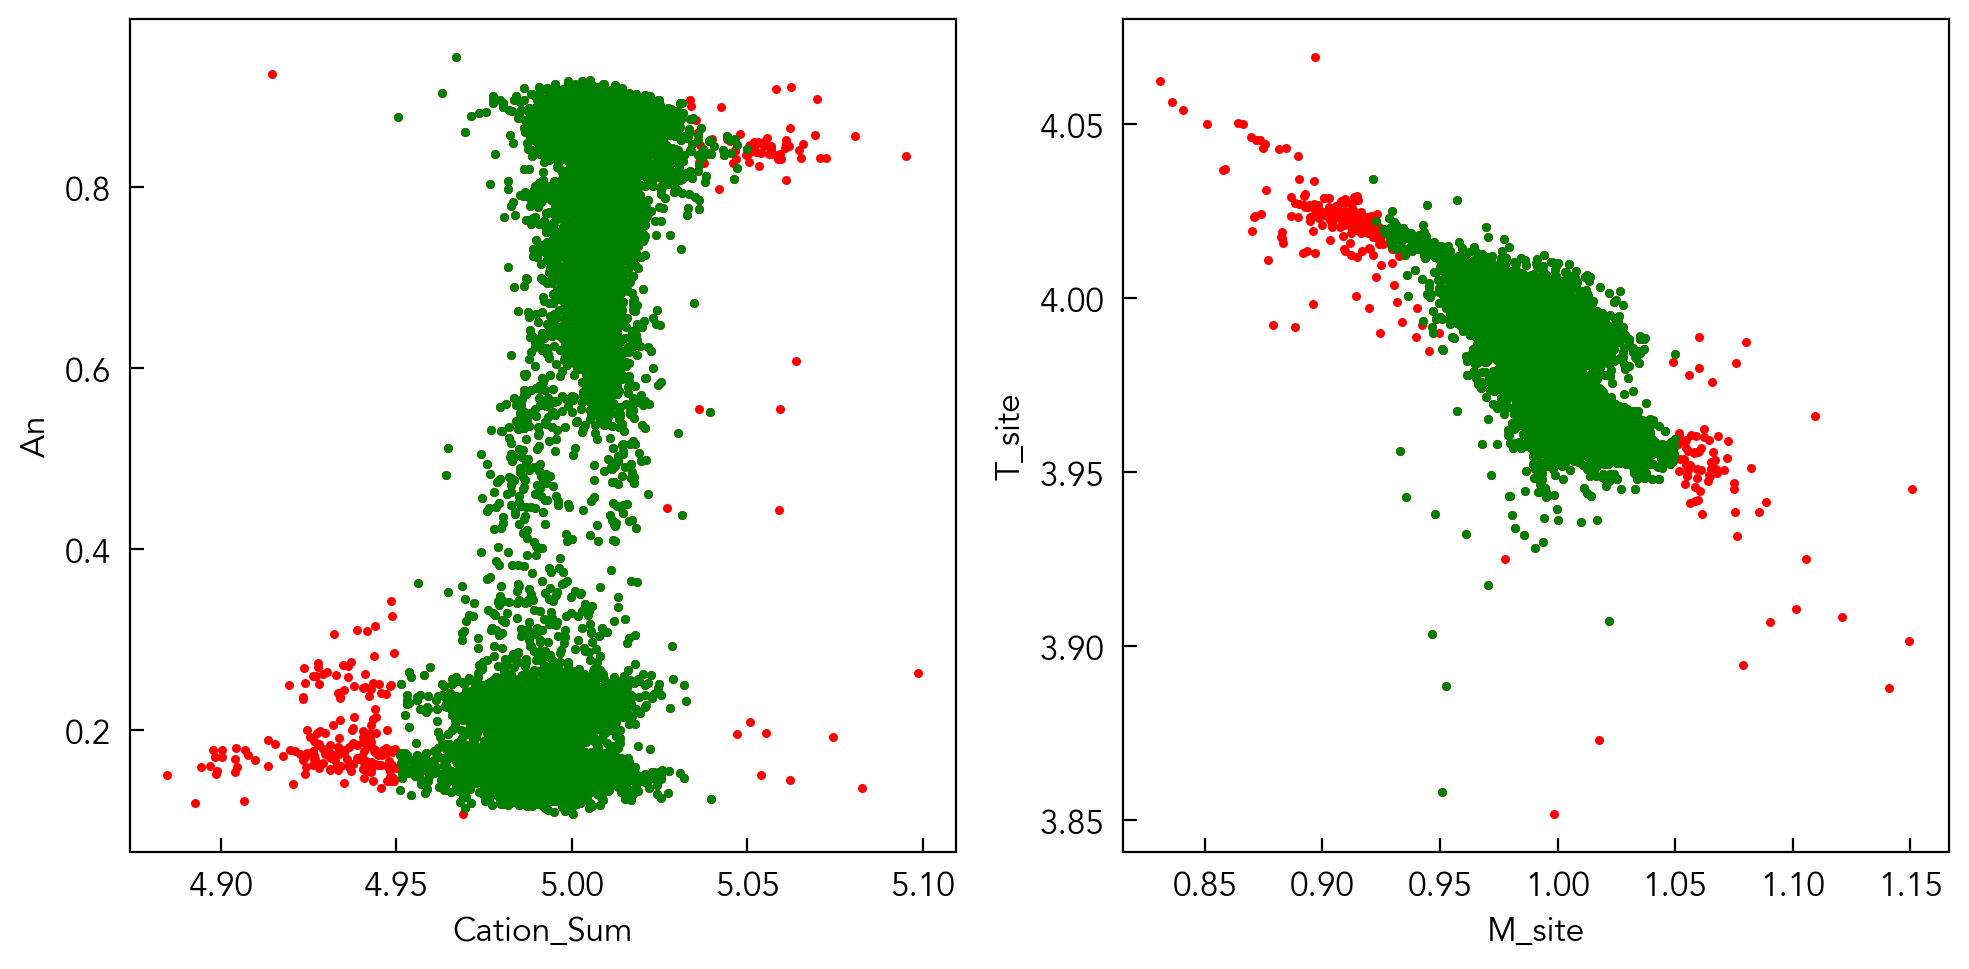

In [ ]:
# %% 

pl_calc = mm.FeldsparCalculator(min_df[min_df.Mineral=='Plagioclase'])
pl_comp = pl_calc.calculate_components()
display(pl_comp)

pl_comp_filt = pl_comp.loc[((pl_comp.Cation_Sum.between(4.95, 5.05)) & (pl_comp.M_site.between(0.9, 1.05)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(pl_comp['Cation_Sum'], pl_comp['An'], s = 5, color = 'r')
ax[0].scatter(pl_comp_filt['Cation_Sum'], pl_comp_filt['An'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('An')
ax[1].scatter(pl_comp['M_site'], pl_comp['T_site'], s = 5, color = 'r')
ax[1].scatter(pl_comp_filt['M_site'], pl_comp_filt['T_site'], s = 5, color = 'g')
ax[1].set_xlabel('M_site')
ax[1].set_ylabel('T_site')
plt.tight_layout()

Sample Name    SiO2   TiO2  Al2O3   FeOt    MnO    MgO    CaO   Na2O  \
0    OM08-206A_1  96.600  0.000  0.020  3.100  0.000  0.100  0.000  0.020   
1    OM08-206A_2  99.700  0.000  0.000  0.300  0.030  0.000  0.000  0.010   
2    OM08-206D_1  97.900  0.000  0.020  1.600  0.020  0.100  0.000  0.040   
3    OM08-206D_2  97.400  0.010  0.000  2.100  0.000  0.100  0.000  0.010   
4   Gon05230ph-j  96.890  0.000  0.010  0.010  0.000  0.000  0.030  0.030   
..           ...     ...    ...    ...    ...    ...    ...    ...    ...   
79    MatrixE_4   96.845  0.000  0.015  0.094  0.002  0.000  0.015  0.000   
80    MatrixE_5   96.636  0.022  0.010  0.148  0.000  0.000  0.036  0.000   
81    MatrixE_6   97.323  0.005  0.000  0.258  0.000  0.000  0.059  0.007   
82    MatrixE_7   95.328  0.018  0.064  0.156  0.010  0.000  0.051  0.023   
83    MatrixE_8   96.763  0.000  0.022  0.172  0.021  0.008  0.040  0.012   

      K2O  ...  Mg_cat_2ox  Ca_cat_2ox  Na_cat_2ox  K_cat_2ox  P_cat_2ox  \
0   0.030  ...    0.001520    0.000000    0.000395   0.000390        0.0   
1   0.020  ...    0.000000    0.000000    0.000194   0.000256        0.0   
2   0.010  ...    0.001511    0.000000    0.000786   0.000129        0.0   
3   0.010  ...    0.001515    0.000000    0.000197   0.000130        0.0   
4   0.010  ...    0.000000    0.000332    0.000600   0.000132        0.0   
..    ...  ...         ...         ...         ...        ...        ...   
79  0.005  ...    0.000000    0.000166    0.000000   0.000066        0.0   
80  0.003  ...    0.000000    0.000399    0.000000   0.000040        0.0   
81  0.023  ...    0.000000    0.000648    0.000139   0.000301        0.0   
82  0.000  ...    0.000000    0.000572    0.000467   0.000000        0.0   
83  0.033  ...    0.000123    0.000442    0.000240   0.000434        0.0   

    Cr_cat_2ox  Mineral               Source  Cation_Sum    T_site  
0     0.001048   Quartz       Streitetal2012    1.014887  0.985102  
1     0.000000   Quartz       Streitetal2012    1.001721  0.998504  
2     0.000000   Quartz       Streitetal2012    1.008366  0.992211  
3     0.000161   Quartz       Streitetal2012    1.009969  0.990114  
4     0.000000   Quartz  Kleinsasseretal2008    1.000788  0.999639  
..         ...      ...                  ...         ...       ...  
79    0.000114   Quartz       Brandletal2015    1.000621  0.999446  
80    0.000123   Quartz       Brandletal2015    1.000930  0.999090  
81    0.000405   Quartz       Brandletal2015    1.001862  0.998155  
82    0.000000   Quartz       Brandletal2015    1.001561  0.999067  
83    0.000449   Quartz       Brandletal2015    1.001801  0.998446  

[84 rows x 49 columns]

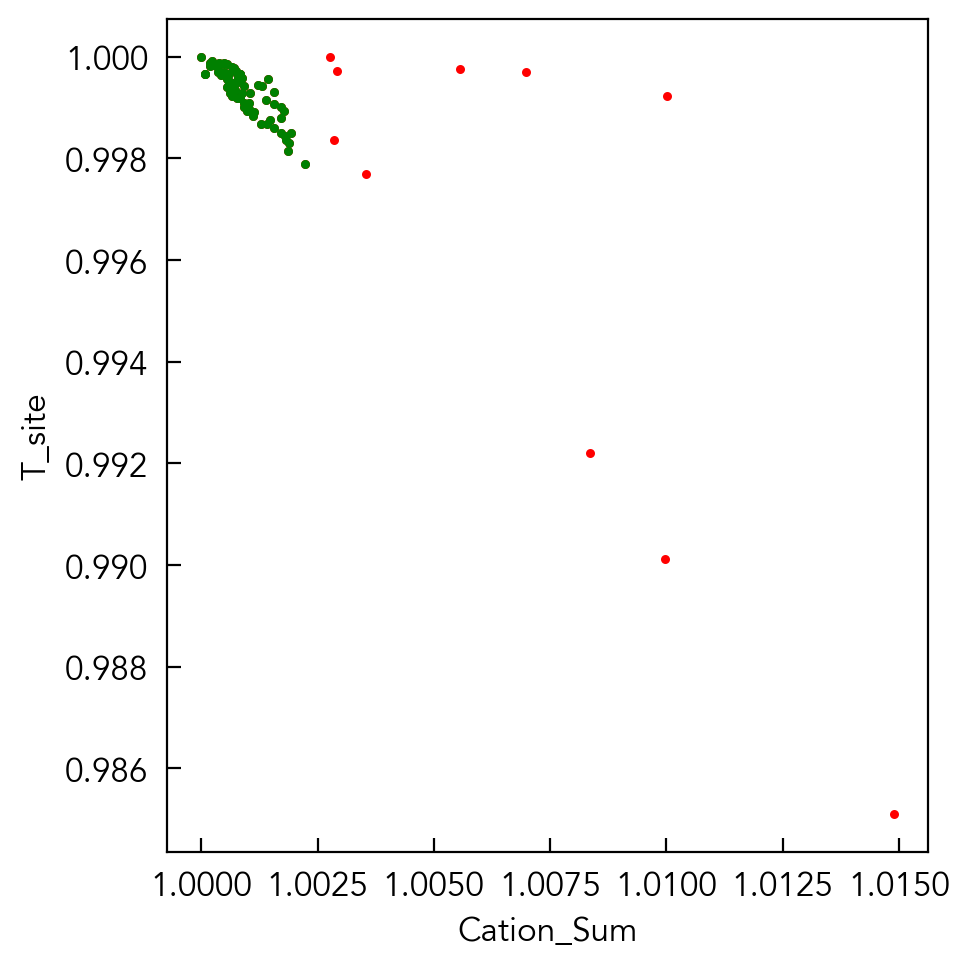

In [ ]:
# %% 

qz_calc = mm.QuartzCalculator(min_df[min_df.Mineral=='Quartz'])
qz_comp = qz_calc.calculate_components()
display(qz_comp)

qz_comp_filt = qz_comp.loc[((qz_comp.Cation_Sum.between(0.9975, 1.0025)))]

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
ax.scatter(qz_comp['Cation_Sum'], qz_comp['T_site'], s = 5, color = 'r')
ax.scatter(qz_comp_filt['Cation_Sum'], qz_comp_filt['T_site'], s = 5, color = 'g')
ax.set_xlabel('Cation_Sum')
ax.set_ylabel('T_site')
plt.tight_layout()

Sample Name    SiO2     TiO2   Al2O3    FeOt     MnO  MgO  CaO  Na2O  \
0       E2718C_1_  0.0091  98.4337  0.0236  0.2144  0.0089  NaN  NaN   NaN   
1       E2718C_2_  0.0075  98.6836  0.0379  0.2062  0.0033  NaN  NaN   NaN   
2       E2718C_3_  0.0178  98.4385  0.0374  0.2277  0.0152  NaN  NaN   NaN   
3       E2718C_4_  0.0051  98.5087  0.0394  0.2048  0.0000  NaN  NaN   NaN   
4       E2718C_5_  0.0153  98.5736  0.0429  0.1740  0.0000  NaN  NaN   NaN   
...           ...     ...      ...     ...     ...     ...  ...  ...   ...   
1787  AB-SA98_195  0.0282  98.6400  0.0117  0.2163     NaN  NaN  NaN   NaN   
1788  AB-SA98_197  0.0250  99.2500  0.0000  0.0271     NaN  NaN  NaN   NaN   
1789  AB-SA98_198  0.0304  98.9300  0.0151  0.2397     NaN  NaN  NaN   NaN   
1790  AB-SA98_199  0.0301  99.6900  0.0000  0.6737     NaN  NaN  NaN   NaN   
1791  AB-SA98_200  0.0528  94.4800  0.0137  0.4196     NaN  NaN  NaN   NaN   

      K2O  ...  Mg_cat_2ox  Ca_cat_2ox  Na_cat_2ox  K_cat_2ox  P_cat_2ox  \
0     NaN  ...         0.0         0.0         0.0        0.0        0.0   
1     NaN  ...         0.0         0.0         0.0        0.0        0.0   
2     NaN  ...         0.0         0.0         0.0        0.0        0.0   
3     NaN  ...         0.0         0.0         0.0        0.0        0.0   
4     NaN  ...         0.0         0.0         0.0        0.0        0.0   
...   ...  ...         ...         ...         ...        ...        ...   
1787  NaN  ...         0.0         0.0         0.0        0.0        0.0   
1788  NaN  ...         0.0         0.0         0.0        0.0        0.0   
1789  NaN  ...         0.0         0.0         0.0        0.0        0.0   
1790  NaN  ...         0.0         0.0         0.0        0.0        0.0   
1791  NaN  ...         0.0         0.0         0.0        0.0        0.0   

      Cr_cat_2ox  Mineral                     Source  Cation_Sum    M_site  
0       0.002101   Rutile  Penniston-Dorlandetal2018    1.001875  0.996765  
1       0.002130   Rutile  Penniston-Dorlandetal2018    1.001857  0.996677  
2       0.002042   Rutile  Penniston-Dorlandetal2018    1.002025  0.996419  
3       0.002186   Rutile  Penniston-Dorlandetal2018    1.001853  0.996673  
4       0.002384   Rutile  Penniston-Dorlandetal2018    1.001742  0.996521  
...          ...      ...                        ...         ...       ...  
1787    0.001074   Rutile             Bassisetal2016    1.001529  0.997462  
1788    0.006145   Rutile             Bassisetal2016    1.001687  0.994907  
1789    0.000915   Rutile             Bassisetal2016    1.001630  0.997387  
1790    0.000146   Rutile             Bassisetal2016    1.003773  0.995755  
1791    0.000531   Rutile             Bassisetal2016    1.002646  0.996236  

[1792 rows x 49 columns]

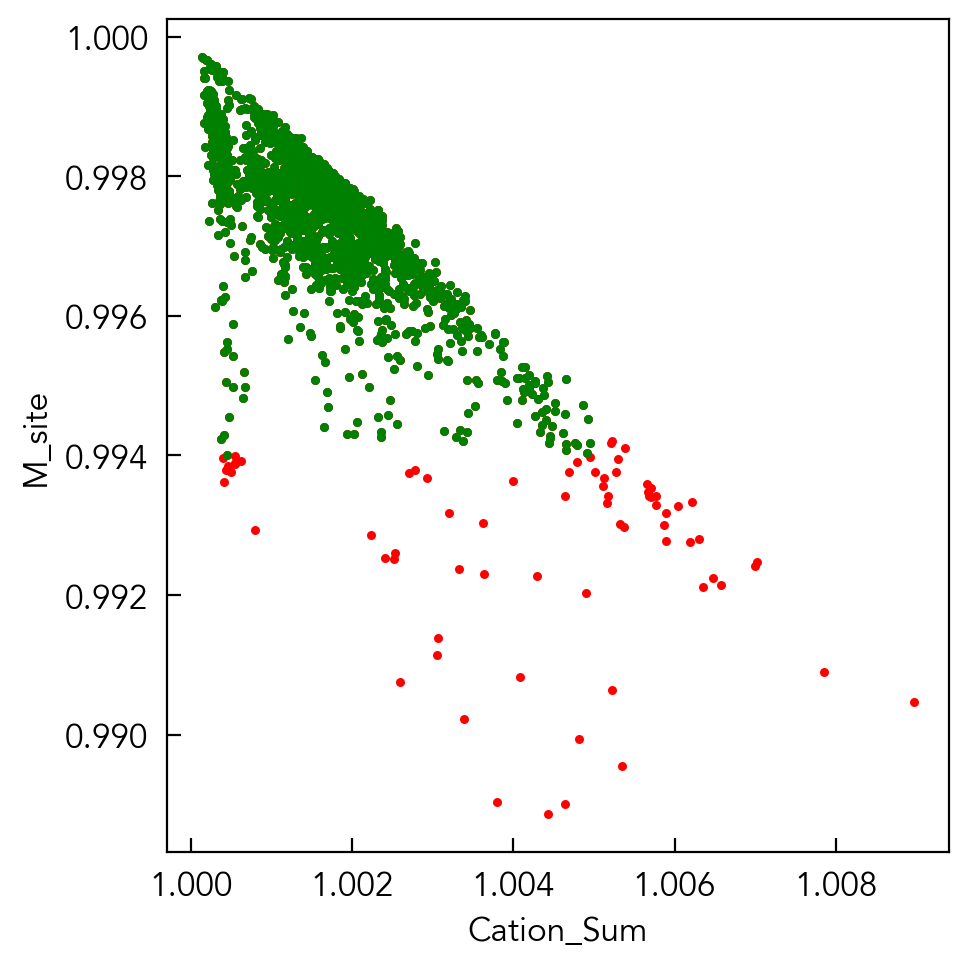

In [ ]:
# %%

rt_calc = mm.RutileCalculator(min_df[min_df.Mineral=='Rutile'])
rt_comp = rt_calc.calculate_components()
display(rt_comp)

rt_comp_filt = rt_comp.loc[((rt_comp.Cation_Sum.between(0.9975, 1.005)) & (rt_comp.M_site.between(0.994, 1.005)))]

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
ax.scatter(rt_comp['Cation_Sum'], rt_comp['M_site'], s = 5, color = 'r')
ax.scatter(rt_comp_filt['Cation_Sum'], rt_comp_filt['M_site'], s = 5, color = 'g')
ax.set_xlabel('Cation_Sum')
ax.set_ylabel('M_site')
plt.tight_layout()

Sample Name       SiO2     TiO2     Al2O3      FeOt      MnO        MgO  \
0         OM15-6  41.257420      NaN  1.349790  4.389960      NaN  39.545390   
1         OM15-6  45.037780  0.03470  0.613000  4.277310  0.04921  38.903020   
2         OM15-6  44.786830      NaN  0.077310  5.537230      NaN  36.070660   
3         OM15-6  39.875800      NaN       NaN  8.694850  0.05758  36.689050   
4         OM15-6  41.428250  0.02485  0.709730  4.958970  0.12620  37.896340   
...          ...        ...      ...       ...       ...      ...        ...   
2665      Srp-54  42.125100      NaN  0.224489  2.616110      NaN  41.997433   
2666      Srp-62  40.826267      NaN  0.762479  2.646973      NaN  41.064333   
2667      Srp-61  40.826267      NaN  0.762479  2.646973      NaN  41.064333   
2668      Srp-60  40.826267      NaN  0.762479  2.646973      NaN  41.064333   
2669      Srp-63  41.198167      NaN  0.480292  2.800107      NaN  40.890767   

           CaO  Na2O  K2O  ...  K_cat_14ox  P_cat_14ox  Cr_cat_14ox  \
0          NaN   NaN  NaN  ...         0.0         0.0     0.019785   
1          NaN   NaN  NaN  ...         0.0         0.0     0.006935   
2          NaN   NaN  NaN  ...         0.0         0.0     0.000000   
3          NaN   NaN  NaN  ...         0.0         0.0     0.000000   
4     0.380510   NaN  NaN  ...         0.0         0.0     0.000000   
...        ...   ...  ...  ...         ...         ...          ...   
2665       NaN   NaN  NaN  ...         0.0         0.0     0.000000   
2666  0.187893   NaN  NaN  ...         0.0         0.0     0.002521   
2667  0.187893   NaN  NaN  ...         0.0         0.0     0.002521   
2668  0.187893   NaN  NaN  ...         0.0         0.0     0.002521   
2669  0.271649   NaN  NaN  ...         0.0         0.0     0.000000   

         Mineral                 Source  Cation_Sum    M_site    T_site  \
0     Serpentine  deObesoandKelemen2020   10.007792  5.930368  4.057639   
1     Serpentine  deObesoandKelemen2020    9.838328  5.640121  4.188880   
2     Serpentine  deObesoandKelemen2020    9.762358  5.520410  4.241948   
3     Serpentine  deObesoandKelemen2020   10.062106  6.124212  3.937894   
4     Serpentine  deObesoandKelemen2020    9.966322  5.853066  4.072171   
...          ...                    ...         ...       ...       ...   
2665  Serpentine   Schicchitanoetal2022   10.041280  6.070166  3.971113   
2666  Serpentine   Schicchitanoetal2022   10.058947  6.054529  3.982680   
2667  Serpentine   Schicchitanoetal2022   10.058947  6.054529  3.982680   
2668  Serpentine   Schicchitanoetal2022   10.058947  6.054529  3.982680   
2669  Serpentine   Schicchitanoetal2022   10.045014  6.035292  3.981971   

           XMg       XFe  
0     0.941376  0.058624  
1     0.941905  0.058095  
2     0.920712  0.079288  
3     0.882655  0.117345  
4     0.931612  0.068388  
...        ...       ...  
2665  0.966235  0.033765  
2666  0.965102  0.034898  
2667  0.965102  0.034898  
2668  0.965102  0.034898  
2669  0.963006  0.036994  

[2670 rows x 52 columns]

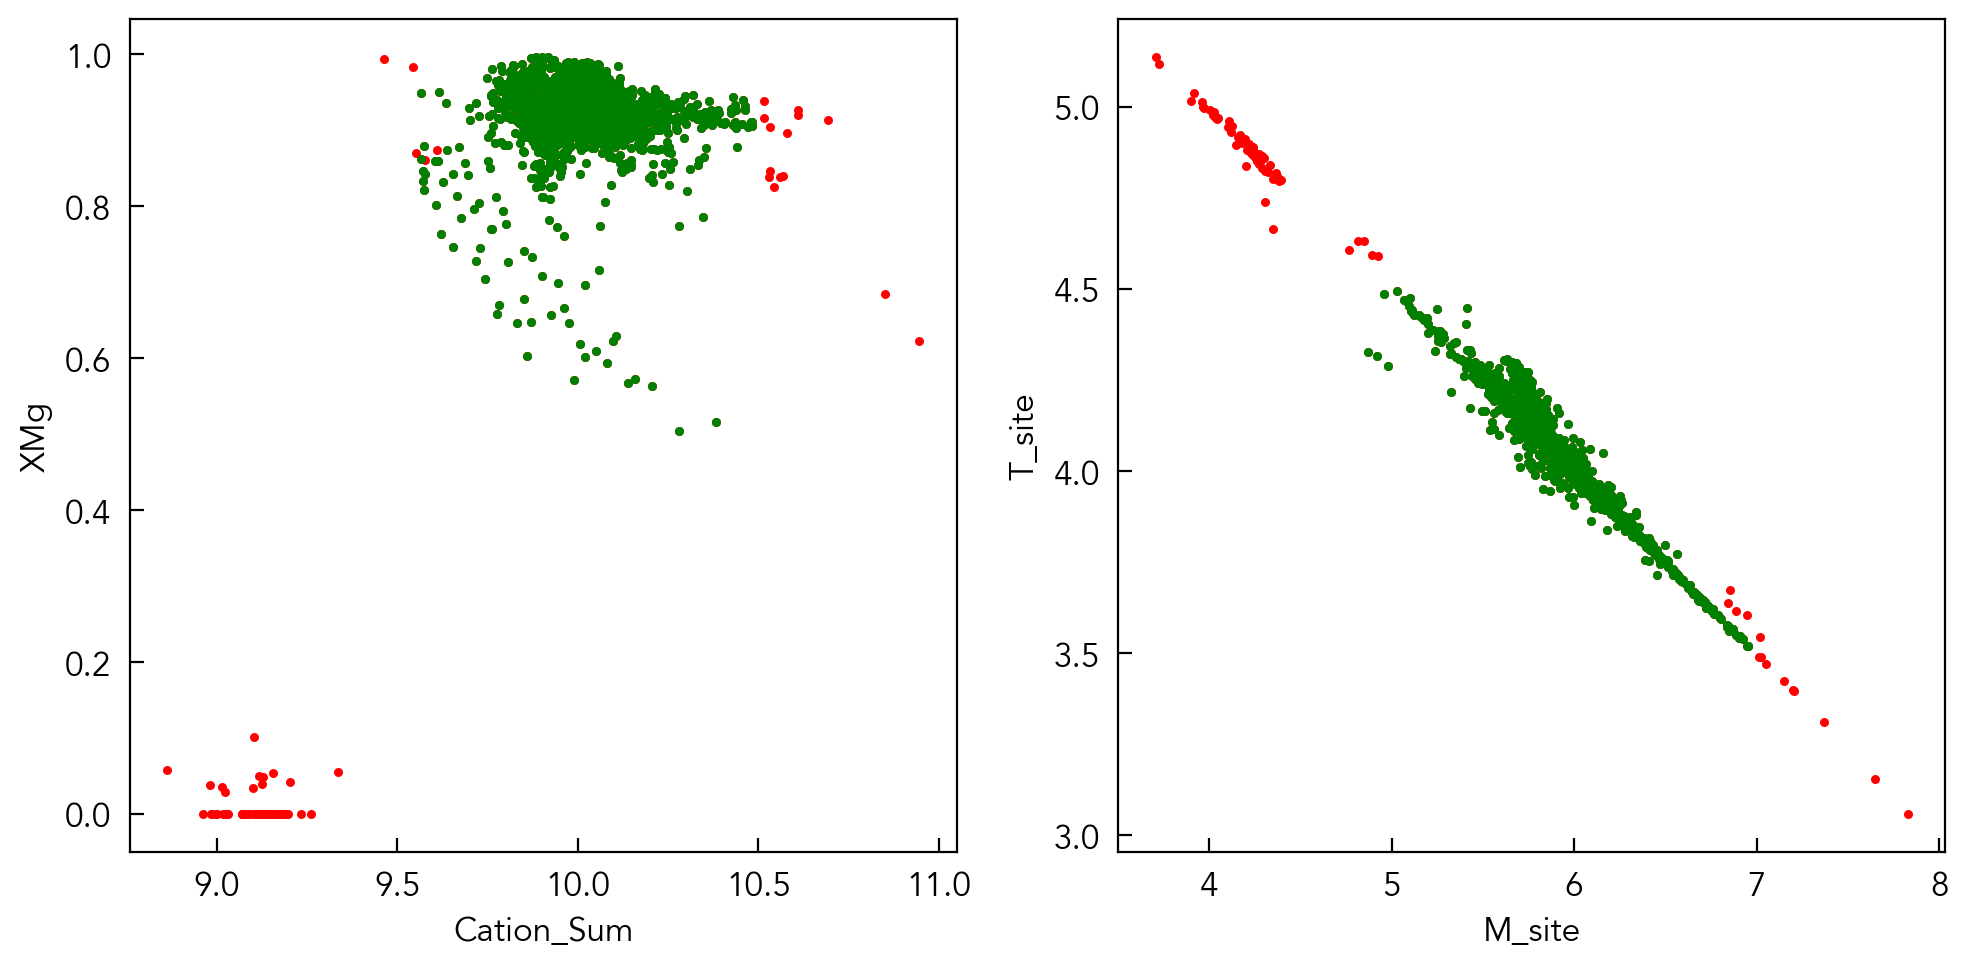

In [ ]:
# %% 

srp_calc = mm.SerpentineCalculator(min_df[min_df.Mineral=='Serpentine'])
srp_comp = srp_calc.calculate_components()
display(srp_comp)

srp_comp_filt = srp_comp.loc[((srp_comp.Cation_Sum.between(9.5, 10.5)) & (srp_comp.T_site.between(3.5, 4.5)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(srp_comp['Cation_Sum'], srp_comp['XMg'], s = 5, color = 'r')
ax[0].scatter(srp_comp_filt['Cation_Sum'], srp_comp_filt['XMg'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('XMg')
ax[1].scatter(srp_comp['M_site'], srp_comp['T_site'], s = 5, color = 'r')
ax[1].scatter(srp_comp_filt['M_site'], srp_comp_filt['T_site'], s = 5, color = 'g')
ax[1].set_xlabel('M_site')
ax[1].set_ylabel('T_site')
plt.tight_layout()

Sample Name      SiO2       TiO2      Al2O3  \
0                 HOR-11-01BY_SP503  0.055400   0.773600  22.117900   
1                  SKU-11-01A_SP501  0.070700   0.605200  24.459000   
2                  SKU-11-01A_SP501  0.091900   0.602700  24.276600   
3                  SKU-11-01A_SP501  0.077700   0.606800  24.371900   
4             HOR-12-03A_TS01_SP250  0.100400   0.503500  28.148200   
...                             ...       ...        ...        ...   
1741  Ny21-005_NY21SM005_ox1-5_1874  0.090287  17.381245   6.515552   
1742  Ny21-005_NY21SM005_ox1-5_1875  0.097709  17.358430   6.536150   
1743  Ny21-005_NY21SM005_ox1-5_1876  0.081192  17.510023   6.324832   
1744  Ny21-005_NY21SM005_ox1-5_1877  0.103287  16.796584   6.773160   
1745  Ny21-005_NY21SM005_ox1-5_1878  0.080640  17.006698   6.992912   

            FeO      Fe2O3       MnO        MgO       CaO      Na2O  ...  \
0     16.341914   7.979984       NaN  12.925400  0.046600       NaN  ...   
1     17.176076   6.268995       NaN  12.497800  0.019000       NaN  ...   
2     17.134177   6.788481       NaN  12.580900  0.014800       NaN  ...   
3     17.873745   6.378816       NaN  12.070700  0.006600       NaN  ...   
4     14.831330   7.375472  0.150600  14.106100  0.019500       NaN  ...   
...         ...        ...       ...        ...       ...       ...  ...   
1741  39.794163  28.133579  0.685338   6.756980  0.059055  0.073166  ...   
1742  39.919137  28.123479  0.683502   6.869751  0.051078  0.017264  ...   
1743  40.220197  28.375183  0.705314   6.862619  0.061994  0.046692  ...   
1744  39.802063  28.615337  0.733602   6.772526  0.070169  0.013066  ...   
1745  39.671407  28.240307  0.699091   6.780209  0.034075  0.048730  ...   

      Cr_cat_4ox  Mineral             Source  Cation_Sum    A_site  \
0       0.960310   Spinel      Neaveetal2014    3.073406  1.023416   
1       0.929749   Spinel      Neaveetal2014    3.056690  1.018728   
2       0.924341   Spinel      Neaveetal2014    3.061486  1.019974   
3       0.927177   Spinel      Neaveetal2014    3.057867  1.019558   
4       0.793345   Spinel      Neaveetal2014    3.065921  1.014214   
...          ...      ...                ...         ...       ...   
1741    0.000000   Spinel  Molendijketal2024    3.343185  1.524960   
1742    0.000000   Spinel  Molendijketal2024    3.342254  1.531707   
1743    0.000000   Spinel  Molendijketal2024    3.344014  1.532897   
1744    0.000000   Spinel  Molendijketal2024    3.349389  1.522315   
1745    0.000000   Spinel  Molendijketal2024    3.343681  1.518595   

      A_site_expanded    B_site  A_B_site     Fe_Ti  Fe3_prop  
0            1.023416  1.975025  2.998442  0.643986  0.305267  
1            1.018728  1.979495  2.998223  0.614153  0.247229  
2            1.019974  1.977916  2.997890  0.625293  0.262814  
3            1.019558  1.978895  2.998453  0.636914  0.243075  
4            1.018083  1.979627  2.997710  0.567872  0.309144  
...               ...       ...       ...       ...       ...  
1741         1.545379  1.475246  3.020625  2.572397  0.388814  
1742         1.552033  1.472495  3.024529  2.570301  0.387984  
1743         1.553773  1.467444  3.021217  2.580051  0.388315  
1744         1.544119  1.479602  3.023721  2.568203  0.392809  
1745         1.539369  1.484058  3.023427  2.555181  0.390449  

[1746 rows x 58 columns]

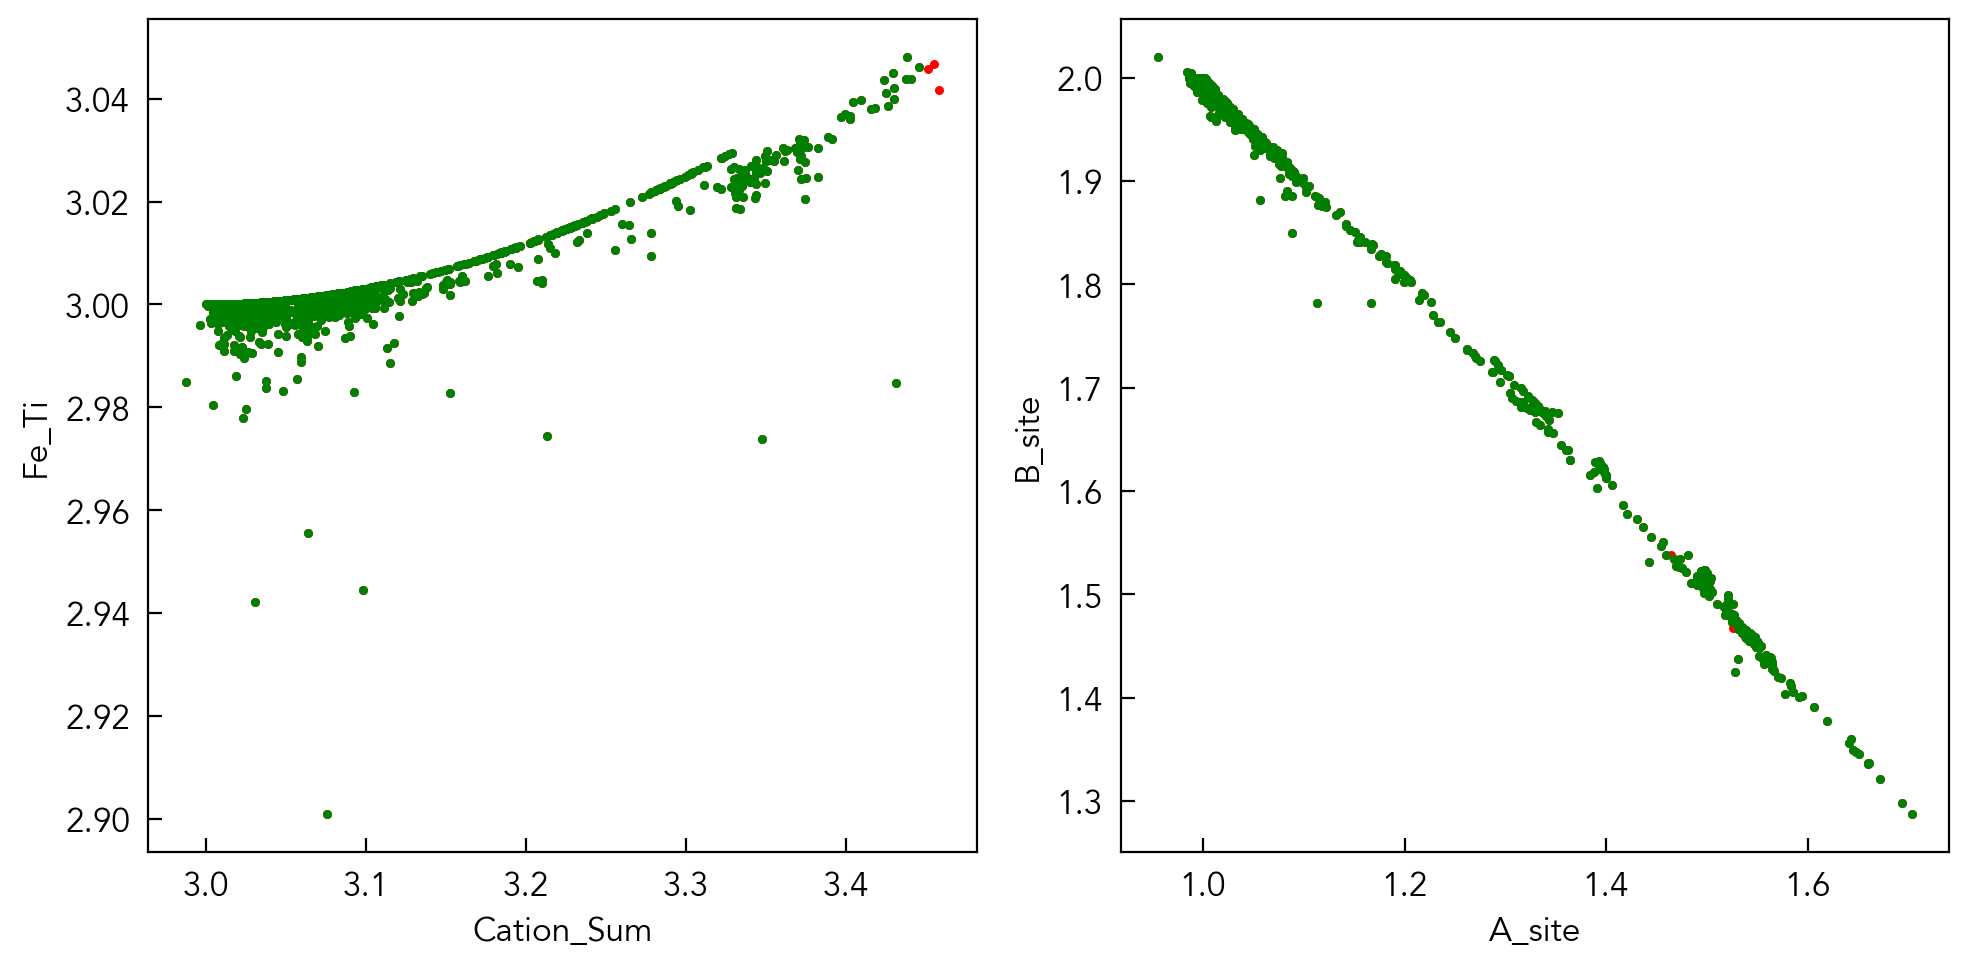

In [ ]:
# %% 

sp_calc = mm.SpinelCalculator(min_df[min_df.Mineral=='Spinel'])
sp_comp = sp_calc.calculate_components()
display(sp_comp)

sp_comp_filt = sp_comp.loc[((sp_comp.Cation_Sum.between(2.95, 3.45)) & (sp_comp.B_site.between(0.75, 2.05)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(sp_comp['Cation_Sum'], sp_comp['A_B_site'], s = 5, color = 'r')
ax[0].scatter(sp_comp_filt['Cation_Sum'], sp_comp_filt['A_B_site'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('Fe_Ti')
ax[1].scatter(sp_comp['A_site'], sp_comp['B_site'], s = 5, color = 'r')
ax[1].scatter(sp_comp_filt['A_site'], sp_comp_filt['B_site'], s = 5, color = 'g')
ax[1].set_xlabel('A_site')
ax[1].set_ylabel('B_site')
plt.tight_layout()

Sample Name     SiO2     TiO2   Al2O3    Fe2O3t     MnO     MgO  \
0     REG-19_titanite_1  29.3211  33.0262  1.3941  3.227926  0.0339  0.0760   
1     REG-19_titanite_2  29.4279  32.8271  1.4883  3.040225  0.0106  0.0771   
2     REG-26_titanite_3  28.3689  34.0591  0.9669  2.756729  0.0000  0.0450   
3     REG-26_titanite_4  28.4892  34.1129  0.9527  2.763397  0.0425  0.0504   
4     REG-26_titanite_5  28.6437  34.3889  0.9107  2.492236  0.0436  0.0599   
...                 ...      ...      ...     ...       ...     ...     ...   
8116              Aries  29.6300  34.7200  0.2200  2.100386     NaN     NaN   
8117                FBZ  30.1800  36.8500  0.4600  2.533799  0.1500     NaN   
8118            DEB4/47  29.9600  35.6000  1.8100  1.633633  0.0500  0.0300   
8119            DEB4/47  30.4200  35.6300  1.5500  1.822557  0.0600  0.0200   
8120                P2A  27.5100  37.9100  0.1300  1.489162     NaN  1.2000   

          CaO    Na2O     K2O  ...  P_cat_5ox  Cr_cat_5ox   Mineral  \
0     26.5311  0.1435  0.0327  ...   0.000000    0.000000  Titanite   
1     26.3000  0.1441  0.0234  ...   0.000000    0.000000  Titanite   
2     25.3917  0.0875  0.0219  ...   0.000000    0.000000  Titanite   
3     25.3284  0.1785  0.0219  ...   0.000000    0.000000  Titanite   
4     25.7252  0.1730  0.0394  ...   0.000000    0.000000  Titanite   
...       ...     ...     ...  ...        ...         ...       ...   
8116  28.1000  0.1800  0.0800  ...   0.001170    0.000000  Titanite   
8117  26.5900  0.4600     NaN  ...   0.000000    0.000000  Titanite   
8118  28.5900  0.3400  0.1400  ...   0.000848    0.000000  Titanite   
8119  28.5500  0.0800  0.0400  ...   0.000564    0.000527  Titanite   
8120  28.0300     NaN     NaN  ...   0.001450    0.000271  Titanite   

                Source  Cation_Sum  VII_site    M_site    T_site     Al_IV  \
0          Beaetal2014    3.042606  1.007542  1.010423  1.023638 -0.023638   
1          Beaetal2014    3.038939  1.001397  1.006965  1.030263 -0.030263   
2          Beaetal2014    3.020164  0.979505  1.029127  1.011532 -0.011532   
3          Beaetal2014    3.022980  0.981087  1.027453  1.013159 -0.013159   
4          Beaetal2014    3.025908  0.991551  1.020093  1.012959 -0.012959   
...                ...         ...       ...       ...       ...       ...   
8116  Kowallisetal2022    3.047355  1.055722  0.966831  1.023632 -0.023632   
8117  Kowallisetal2022    3.024563  0.988646  1.016138  1.015504 -0.015504   
8118  Kowallisetal2022    3.061564  1.052031  1.007161  1.000110 -0.000110   
8119  Kowallisetal2022    3.042468  1.026575  1.000054  1.013057 -0.013057   
8120  Kowallisetal2022    3.055631  1.090035  1.021537  0.942339  0.057661   

         Al_VI  
0     0.080999  
1     0.091672  
2     0.052165  
3     0.053090  
4     0.050916  
...        ...  
8116  0.032589  
8117  0.033746  
8118  0.071320  
8119  0.073893  
8120 -0.052413  

[8121 rows x 53 columns]

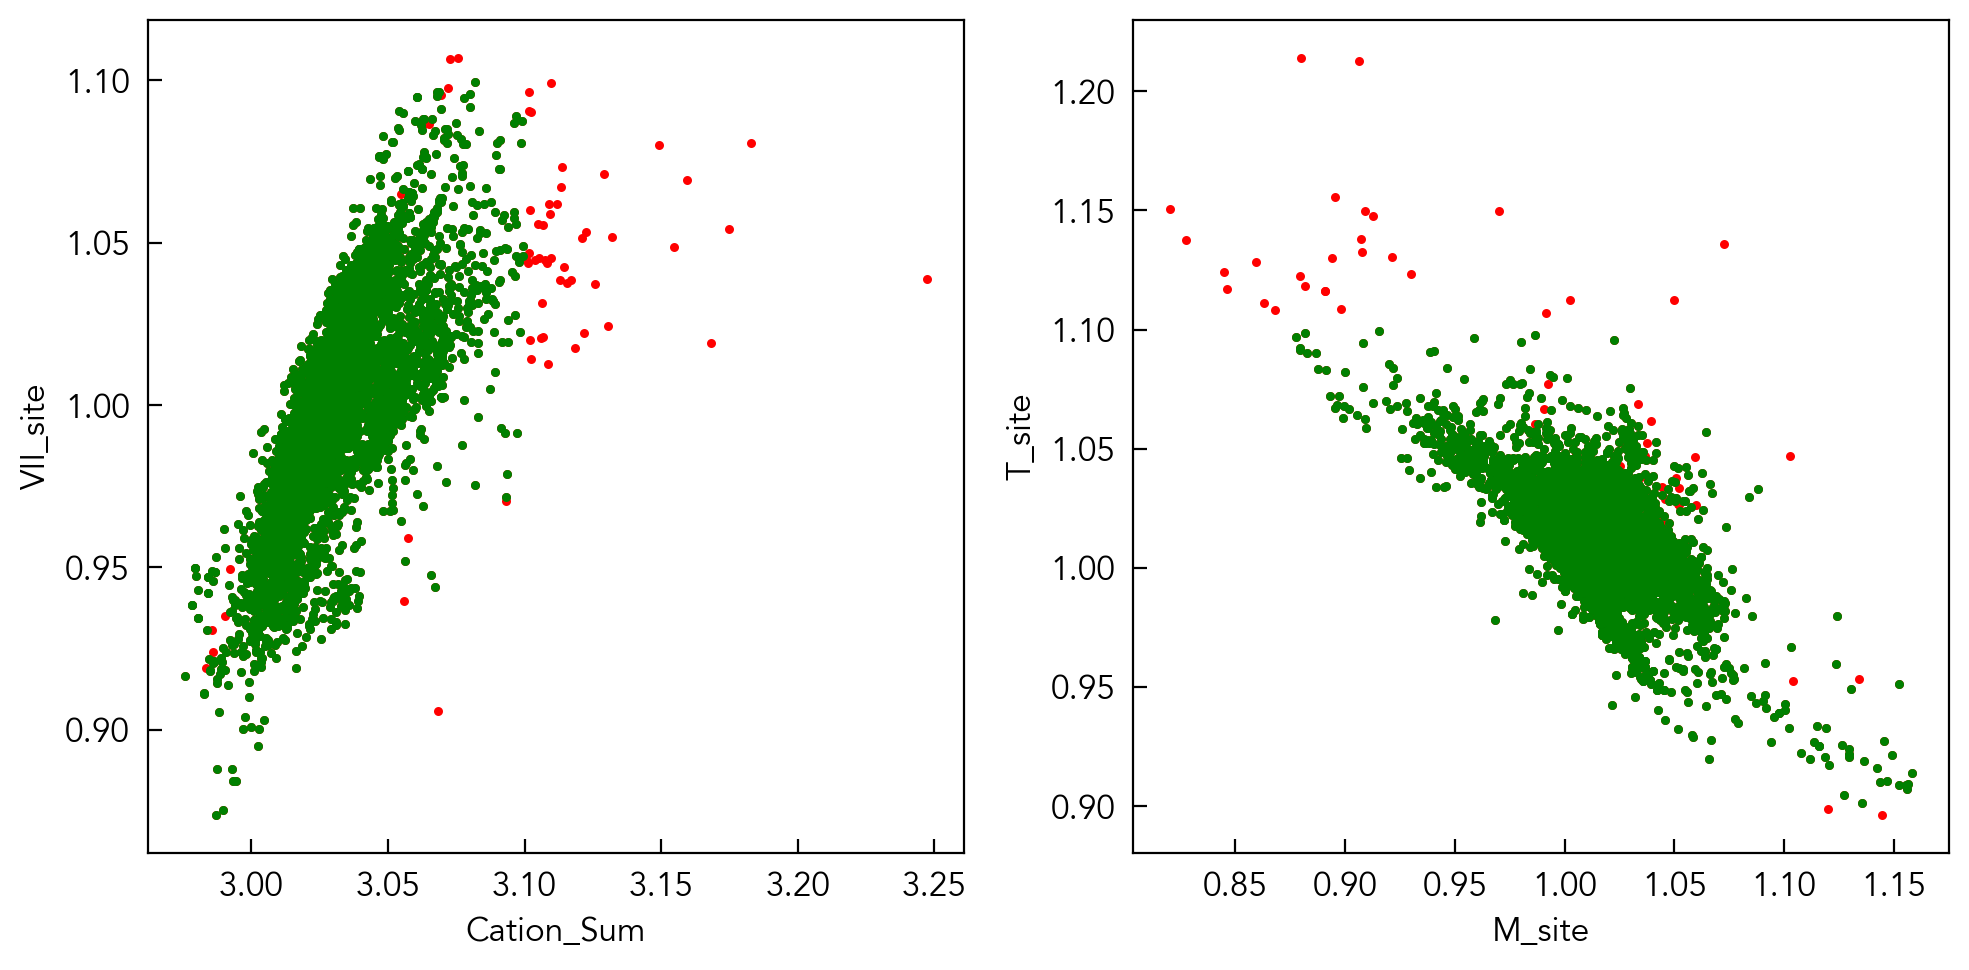

In [ ]:
# %%

tit_calc = mm.TitaniteCalculator(min_df[min_df.Mineral=='Titanite'])
tit_comp = tit_calc.calculate_components()
display(tit_comp)

tit_comp_filt = tit_comp.loc[((tit_comp.Cation_Sum.between(2.95, 3.1)) & (tit_comp.T_site.between(0.9, 1.1)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(tit_comp['Cation_Sum'], tit_comp['VII_site'], s = 5, color = 'r')
ax[0].scatter(tit_comp_filt['Cation_Sum'], tit_comp_filt['VII_site'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('VII_site')
ax[1].scatter(tit_comp['M_site'], tit_comp['T_site'], s = 5, color = 'r')
ax[1].scatter(tit_comp_filt['M_site'], tit_comp_filt['T_site'], s = 5, color = 'g')
ax[1].set_xlabel('M_site')
ax[1].set_ylabel('T_site')
plt.tight_layout()

Sample Name   SiO2  TiO2  Al2O3     FeOt       MnO   MgO   CaO  Na2O  \
0      Tourmaline1  36.47  0.82  30.79   4.1300       NaN  9.52  0.74  2.36   
1      Tourmaline2  35.37  1.23  30.34   5.0000       NaN  9.01  1.24  2.26   
2      Tourmaline3  36.89  0.86  31.06   4.0700       NaN  9.49  0.57  2.57   
3      Tourmaline4  36.80  0.69  31.12   3.6400       NaN  9.75  0.49  2.62   
4      Tourmaline5  36.80  0.79  30.91   3.9900       NaN  9.55  0.69  2.44   
...            ...    ...   ...    ...      ...       ...   ...   ...   ...   
1255  P1-2-3-11-11  33.89  0.60  34.10  15.2137  0.133672  0.31  0.17  1.56   
1256  P1-2-3-11-12  34.10  0.45  34.20  14.2000  0.150000  0.34  0.16  1.82   
1257  P1-2-3-11-13  34.50  0.55  34.00  14.5400  0.200000  0.26  0.27  1.78   
1258  P1-2-3-11-14  34.28  0.55  34.10  14.5000  0.200000  0.45  0.26  1.89   
1259  P1-2-3-11-15  34.12  0.50  34.20  14.4300  0.180000  0.60  0.12  1.67   

           K2O  ...  P_cat_31ox  Cr_cat_31ox  B_cat_31ox     Mineral  \
0          NaN  ...         0.0     0.000000    3.211075  Tourmaline   
1          NaN  ...         0.0     0.011234    3.206767  Tourmaline   
2          NaN  ...         0.0     0.008241    3.211655  Tourmaline   
3          NaN  ...         0.0     0.008258    3.215235  Tourmaline   
4          NaN  ...         0.0     0.000000    3.214808  Tourmaline   
...        ...  ...         ...          ...         ...         ...   
1255  0.039408  ...         0.0     0.000000    3.145853  Tourmaline   
1256  0.060000  ...         0.0     0.000000    3.190251  Tourmaline   
1257  0.061531  ...         0.0     0.000000    3.146707  Tourmaline   
1258  0.080000  ...         0.0     0.000000    3.166698  Tourmaline   
1259  0.060000  ...         0.0     0.000000    3.169674  Tourmaline   

               Source  Cation_Sum    X_site    Y_site    Z_site    T_site  
0     Konzettetal2012   20.111602  0.941298  9.456519  9.456519  6.394441  
1     Konzettetal2012   20.158064  1.014230  9.479253  9.490487  6.282067  
2     Konzettetal2012   20.121732  0.971769  9.408711  9.416952  6.408845  
3     Konzettetal2012   20.141167  0.975716  9.445185  9.453443  6.406318  
4     Konzettetal2012   20.107442  0.953922  9.417504  9.417504  6.417462  
...               ...         ...       ...       ...       ...       ...  
1255     Hongetal2021   19.771588  0.594498  9.762940  9.742274  6.185825  
1256     Hongetal2021   19.782790  0.688386  9.626930  9.603772  6.215457  
1257     Hongetal2021   19.767770  0.693557  9.586787  9.556022  6.265500  
1258     Hongetal2021   19.825744  0.733307  9.636262  9.605553  6.214393  
1259     Hongetal2021   19.780358  0.625986  9.712779  9.685060  6.203461  

[1260 rows x 56 columns]

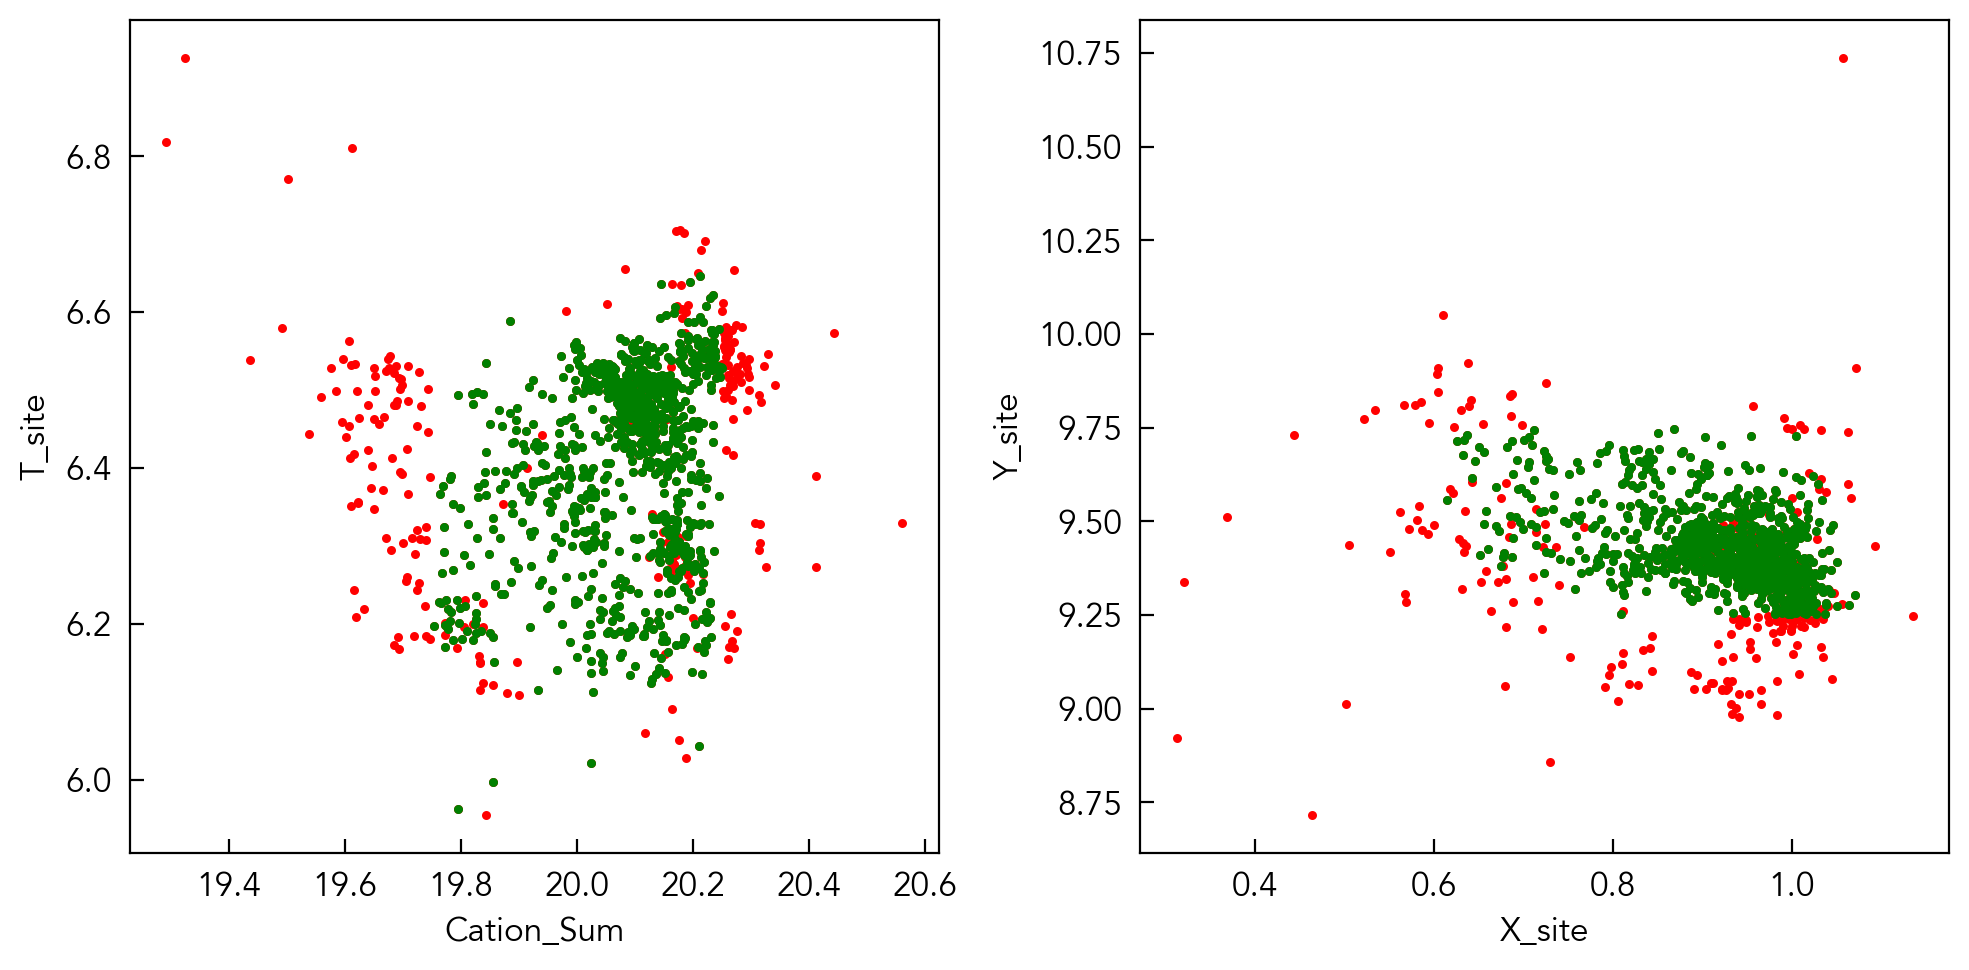

In [ ]:
# %%

trm_calc = mm.TourmalineCalculator(min_df[min_df.Mineral=='Tourmaline'])
trm_comp = trm_calc.calculate_components()
display(trm_comp)

trm_comp_filt = trm_comp.loc[((trm_comp.Cation_Sum.between(19.75, 20.25)) & (trm_comp.Y_site.between(9.25, 9.75)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(trm_comp['Cation_Sum'], trm_comp['T_site'], s = 5, color = 'r')
ax[0].scatter(trm_comp_filt['Cation_Sum'], trm_comp_filt['T_site'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('T_site')
ax[1].scatter(trm_comp['X_site'], trm_comp['Y_site'], s = 5, color = 'r')
ax[1].scatter(trm_comp_filt['X_site'], trm_comp_filt['Y_site'], s = 5, color = 'g')
ax[1].set_xlabel('X_site')
ax[1].set_ylabel('Y_site')
plt.tight_layout()

Sample Name    SiO2   TiO2  Al2O3   FeOt   MnO  MgO    CaO   Na2O  K2O  \
0         Zrn-I  33.971  0.001    0.0  0.014   NaN  NaN  0.004  0.000  NaN   
1         Zrn-I  33.250  0.000    0.0  0.000   NaN  NaN  0.000  0.001  NaN   
2         Zrn-I  33.744  0.005    0.0  0.002   NaN  NaN  0.006  0.010  NaN   
3         Zrn-I  33.710  0.000    0.0  0.000   NaN  NaN  0.002  0.000  NaN   
4         Zrn-I  33.625  0.006    0.0  0.003   NaN  NaN  0.000  0.000  NaN   
..          ...     ...    ...    ...    ...   ...  ...    ...    ...  ...   
621   VS 143_16  33.120  0.090    0.0  1.158  0.00  0.0  0.050    NaN  NaN   
622   VS 143_18  32.920  0.000    0.0  1.013  0.00  0.1  0.090    NaN  NaN   
623    VS 178_9  33.240  0.000    0.0  0.630  0.00  0.0  0.000    NaN  NaN   
624   VS 176_11  33.170  0.000    0.0  0.330  0.03  0.0  0.000    NaN  NaN   
625   VS 161_12  33.630  0.100    0.0  0.730  0.03  0.0  0.000    NaN  NaN   

     ...  K_cat_4ox  P_cat_4ox  Cr_cat_4ox  Zr_cat_4ox  Mineral  \
0    ...        0.0   0.000671         0.0    0.963032   Zircon   
1    ...        0.0   0.001426         0.0    0.961238   Zircon   
2    ...        0.0   0.001043         0.0    0.958847   Zircon   
3    ...        0.0   0.000968         0.0    0.957154   Zircon   
4    ...        0.0   0.001654         0.0    0.954980   Zircon   
..   ...        ...        ...         ...         ...      ...   
621  ...        0.0   0.000000         0.0    0.972112   Zircon   
622  ...        0.0   0.000000         0.0    0.970963   Zircon   
623  ...        0.0   0.000000         0.0    0.975399   Zircon   
624  ...        0.0   0.000000         0.0    0.982469   Zircon   
625  ...        0.0   0.000000         0.0    0.967478   Zircon   

                Source  Cation_Sum    M_site    T_site  Hf_Zr  
0         Wangetal2023    2.000076  0.963032  1.035863    0.0  
1         Wangetal2023    1.999689  0.961238  1.036965    0.0  
2         Wangetal2023    2.000312  0.958847  1.039459    0.0  
3         Wangetal2023    1.999791  0.957154  1.041604    0.0  
4         Wangetal2023    1.999625  0.954980  1.042773    0.0  
..                 ...         ...       ...       ...    ...  
621  Contiellietal2013    2.015587  0.972112  1.010234    0.0  
622  Contiellietal2013    2.016799  0.970963  1.012238    0.0  
623  Contiellietal2013    2.008056  0.975399  1.016545    0.0  
624  Contiellietal2013    2.004602  0.982469  1.012929    0.0  
625  Contiellietal2013    2.009649  0.967478  1.020588    0.0  

[626 rows x 55 columns]

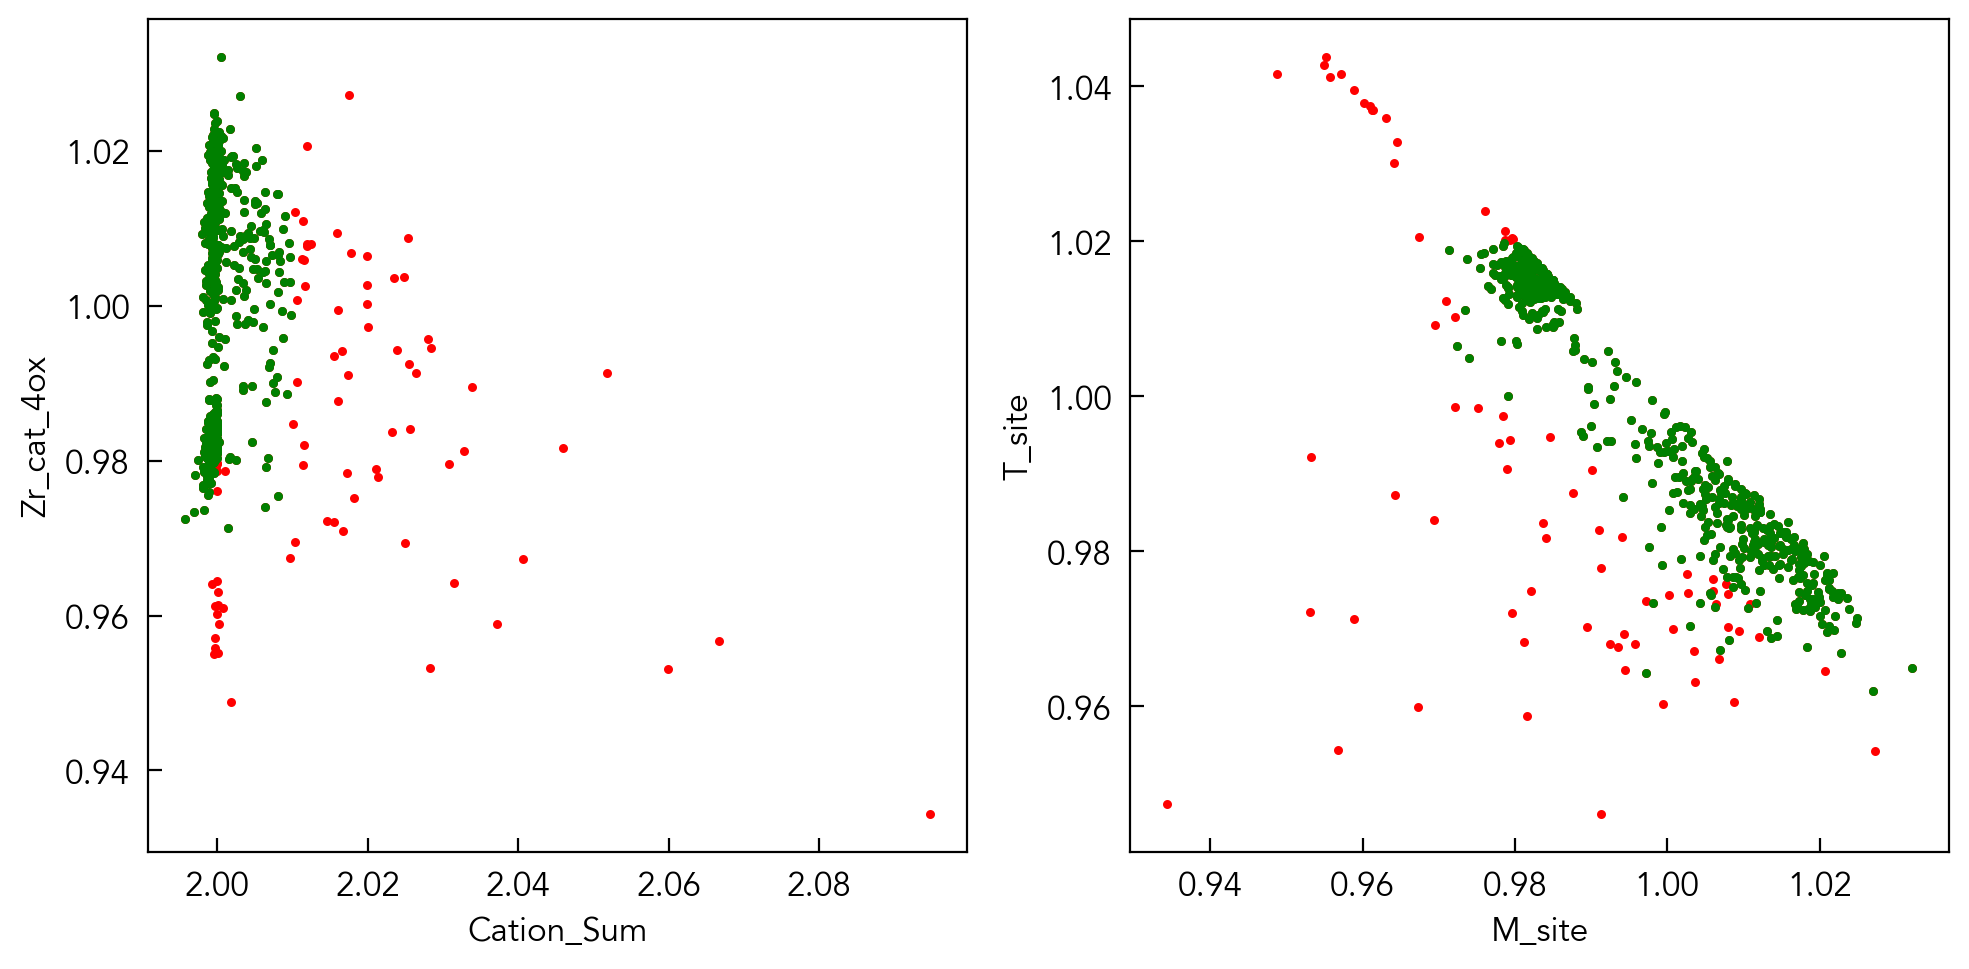

In [ ]:
# %% 

zr_calc = mm.ZirconCalculator(min_df[min_df.Mineral=='Zircon'])
zr_comp = zr_calc.calculate_components()
display(zr_comp)

zr_comp_filt = zr_comp.loc[((zr_comp.Cation_Sum.between(1.99, 2.01)) & (zr_comp.T_site.between(0.96, 1.02)))]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.flatten()
ax[0].scatter(zr_comp['Cation_Sum'], zr_comp['Zr_cat_4ox'], s = 5, color = 'r')
ax[0].scatter(zr_comp_filt['Cation_Sum'], zr_comp_filt['Zr_cat_4ox'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('Zr_cat_4ox')
ax[1].scatter(zr_comp['M_site'], zr_comp['T_site'], s = 5, color = 'r')
ax[1].scatter(zr_comp_filt['M_site'], zr_comp_filt['T_site'], s = 5, color = 'g')
ax[1].set_xlabel('M_site')
ax[1].set_ylabel('T_site')
plt.tight_layout()

<ipython-input-31-4d1ba7c32887>:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resampled_df = (gl_df.groupby('TAS', group_keys=False)


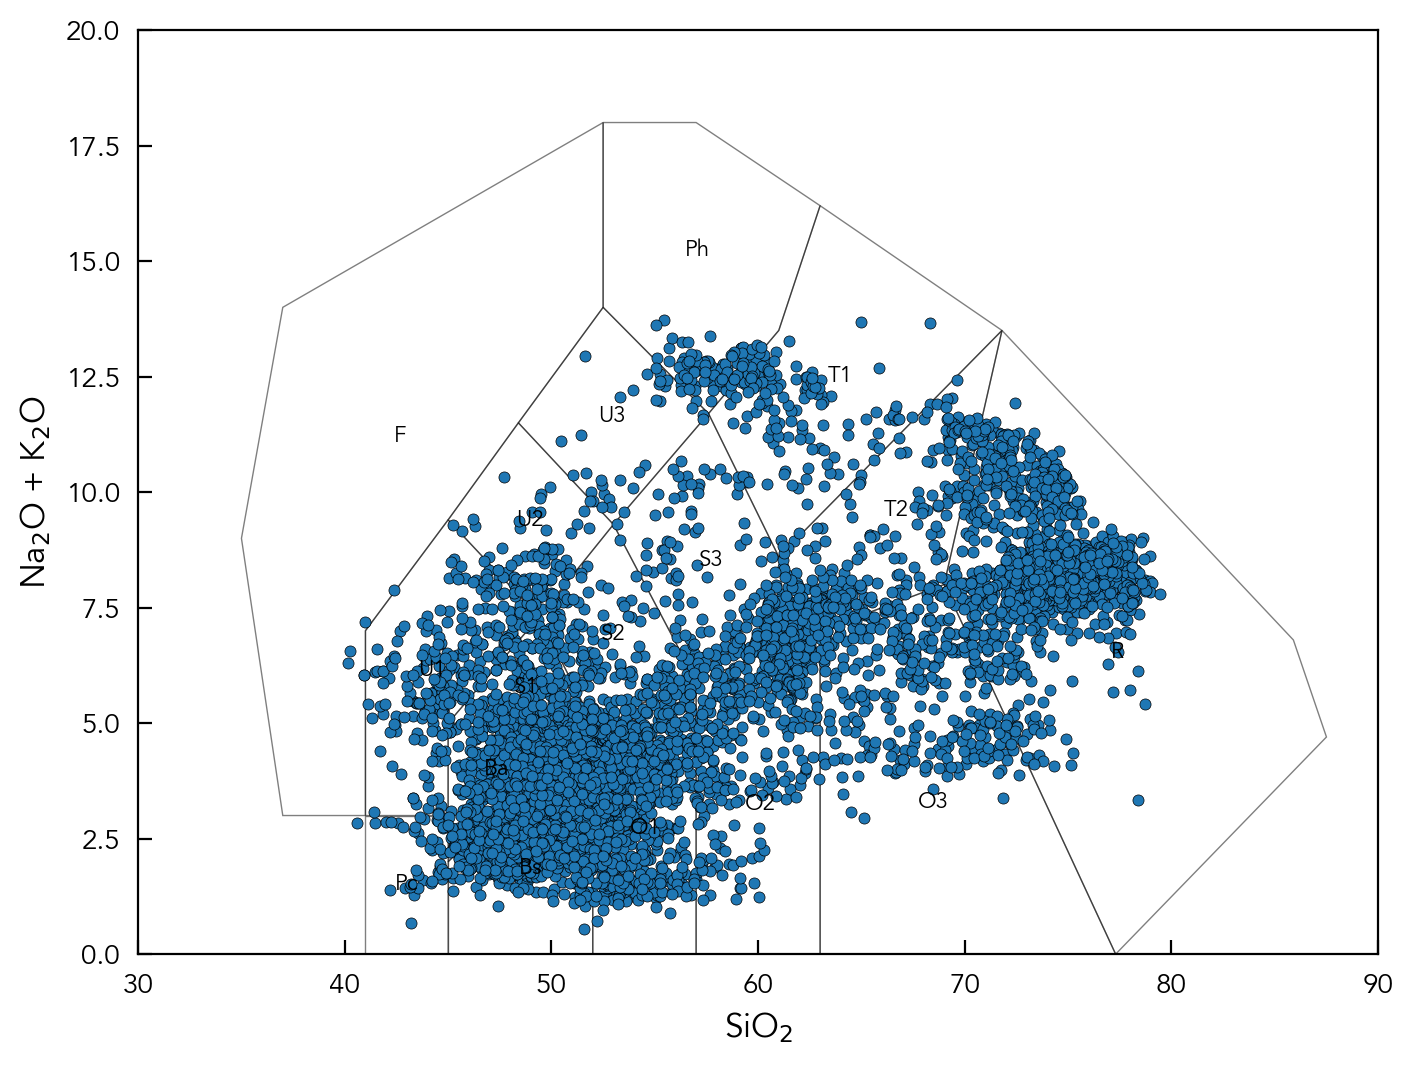

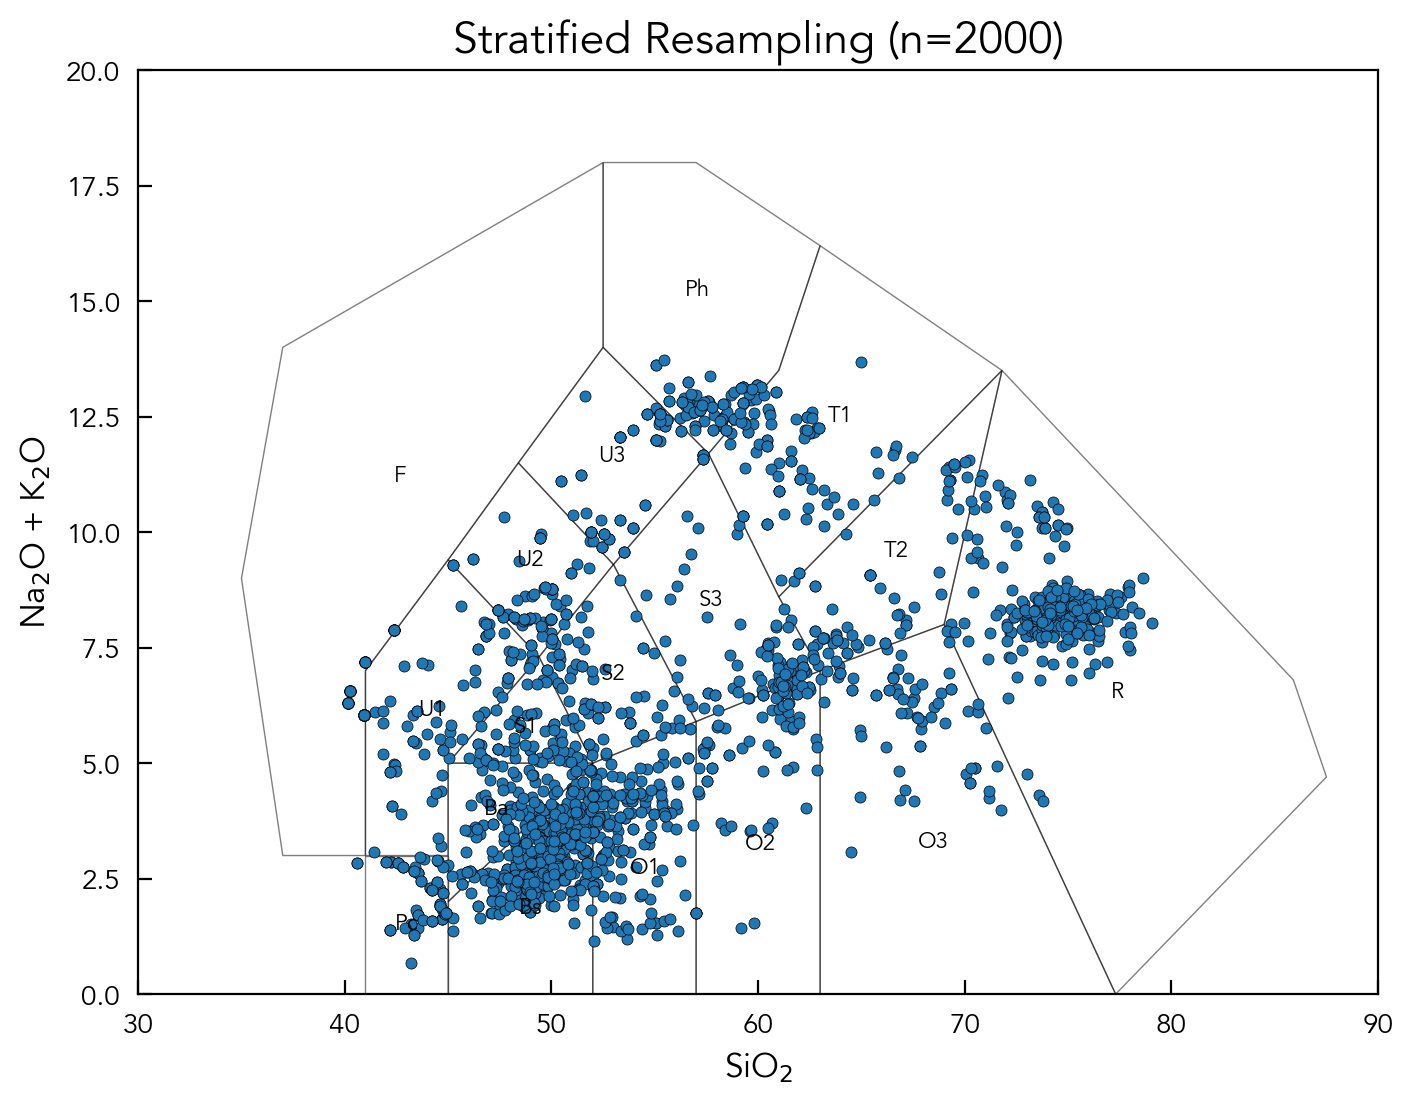

Sample Name   SiO2  TiO2  Al2O3   FeOt   MnO   MgO  \
0       04 Sari-15-02_Sari-15-03_7  48.98  0.67  18.76   7.18  0.18  2.83   
1                        2006_H4-1  50.42  2.05  16.00   9.53  0.26  3.37   
2                           IT-139  48.46  1.87  14.96  12.43  0.20  7.57   
3                            88-02  50.91  1.73  13.47  11.86  0.21  6.72   
4        AS03-PAGAN-5_PAGAN5-2_44   52.05  0.91  14.66  10.57  0.22  5.01   
...                            ...    ...   ...    ...    ...   ...   ...   
1995  KE62-3394S_mins_g05_MI_3_147  51.18  4.32  12.99  13.16  0.21  4.12   
1996           KWB03-1_03-067-27.1  51.55  1.20  16.49   8.85  0.14  7.83   
1997                     A2T_MI-30  57.29  0.39  18.75   2.97  0.09  0.56   
1998                     EYS79_23   73.72  0.13  11.85   1.45  0.02  0.03   
1999              CL036_CL036INC29  57.08  1.23  15.90   9.22  0.12  4.00   

        CaO  Na2O   K2O  P2O5  Cr2O3 Mineral  Na2O + K2O TAS  \
0     14.08  1.44  0.33  0.06    NaN   Glass        1.77  Bs   
1      7.10  5.54  2.87  1.15    NaN   Glass        8.41  U2   
2     11.73  2.09  0.22  0.21    NaN   Glass        2.31  Bs   
3     11.51  2.38  0.31  0.18    NaN   Glass        2.69  Bs   
4      8.50  3.05  1.25  0.20    NaN   Glass        4.30  O1   
...     ...   ...   ...   ...    ...     ...         ...  ..   
1995   8.29  2.85  1.09  0.60    NaN   Glass        3.94  Bs   
1996   8.28  3.74  0.85  0.31    NaN   Glass        4.59  Bs   
1997   2.02  3.89  8.87  0.18    NaN   Glass       12.76  Ph   
1998   0.49  3.04  5.02   NaN    NaN   Glass        8.06   R   
1999   7.88  3.34  1.05  0.18    NaN   Glass        4.39  O2   

                                       Rocknames  
0     [Subalkalic \nBasalt, Subalkalic \nGabbro]  
1             [Phonotephrite, Foid Monzodiorite]  
2     [Subalkalic \nBasalt, Subalkalic \nGabbro]  
3     [Subalkalic \nBasalt, Subalkalic \nGabbro]  
4          [Basaltic Andesite, Gabbroic Diorite]  
...                                          ...  
1995  [Subalkalic \nBasalt, Subalkalic \nGabbro]  
1996  [Subalkalic \nBasalt, Subalkalic \nGabbro]  
1997                   [Phonolite, Foid Syenite]  
1998                         [Rhyolite, Granite]  
1999                         [Andesite, Diorite]  

[2000 rows x 16 columns]

In [ ]:
# %% 

from pyrolite.util.classification import TAS

gl_df = min_df[min_df.Mineral=='Glass']
gl_df = gl_df[gl_df.SiO2 > 40]
gl_df = gl_df[['Sample Name', 'SiO2', 'TiO2', 'Al2O3', 'FeOt', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'Cr2O3', 'Mineral']]

cm = TAS()
gl_df['Na2O + K2O'] = gl_df['Na2O'] + gl_df['K2O']
gl_df["TAS"] = cm.predict(gl_df)
gl_df["Rocknames"] = gl_df.TAS.apply(lambda x: cm.fields.get(x, {"name": None})["name"])
gl_df

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
cm.add_to_axes(ax, alpha=0.5, linewidth=0.5, zorder=-1, add_labels=True)
plt.scatter(gl_df.SiO2, gl_df.Na2O + gl_df.K2O, marker='o', c='tab:blue', edgecolors='k', linewidth=0.25, label=None)

# First calculate minimum samples needed per group
min_samples = int(2000 / len(gl_df['TAS'].unique()))

# Stratified resampling with replacement for small groups
resampled_df = (gl_df.groupby('TAS', group_keys=False)
                  .apply(lambda x: x.sample(n=max(min_samples, 
                                                  int(2000*len(x)/len(gl_df))),
                                                  replace=True,  # Always use replacement
                                                  random_state=42))
                  .sample(n=2000, random_state=42)
                  .reset_index(drop=True))

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
cm.add_to_axes(ax, alpha=0.5, linewidth=0.5, zorder=-1, add_labels=True)
plt.scatter(resampled_df.SiO2, resampled_df['Na2O + K2O'], 
            marker='o', c='tab:blue', edgecolors='k', 
            linewidth=0.25, label=None)
plt.title('Stratified Resampling (n=2000)')
plt.show()

gl_comp_filt = resampled_df
display(gl_comp_filt)

gl_df.to_csv('../Training_Data/glasses_df.csv', index=False)


oxideslab = ['Sample Name', 'SiO2', 'TiO2', 'Al2O3', 'FeOt', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'Cr2O3', 'Mineral']
gl_comp_filt = gl_comp_filt[oxideslab]
gl_comp_filt.to_csv('../Training_Data/glasses_df_sampled.csv', index=False)

In [ ]:
# %%

min_df_all = pd.concat([amp_comp_filt, ap_comp_filt, bt_comp_filt, cal_comp_filt, chl_comp_filt, cpx_comp_filt, ep_comp_filt, gt_comp_filt, hem_comp_filt,                        
                        ilm_comp_filt, ks_comp_filt, ksp_comp_filt, lc_comp_filt, mt_comp_filt, ml_comp_filt, ms_comp_filt, ne_comp_filt, ol_comp_filt, 
                        opx_comp_filt, pl_comp_filt, qz_comp_filt, rt_comp_filt, srp_comp_filt, sp_comp_filt, tit_comp_filt, trm_comp_filt, zr_comp_filt, gl_df], axis = 0)
display(min_df_all)

display(min_df_all.Mineral.value_counts())

oxideslab = ['Sample Name', 'SiO2', 'TiO2', 'Al2O3', 'FeOt', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'Cr2O3', 'Mineral']
min_df_lim = min_df_all[oxideslab]
min_df_lim.to_csv('../Training_Data/min_df_v2_clean_natural.csv', index=False)

Sample Name   SiO2  TiO2  Al2O3   FeOt   MnO    MgO  \
0                           Z2099  42.96  1.80  14.33   4.07  0.07  17.39   
1                           Z2070  43.03  2.39  13.35   4.09  0.06  17.01   
2                           Z2073  42.95  3.02  14.12   4.35  0.06  17.53   
3                           Z2067  43.01  4.65  12.83   4.39  0.07  17.14   
4                           Z2068  42.13  4.87  12.15   4.08  0.05  16.42   
...                           ...    ...   ...    ...    ...   ...    ...   
9395                     55_055 z  71.02  0.53   8.44   5.79  0.22    NaN   
9396           2002S_ 2002/3S-11b  43.30  2.28  18.57   7.91  0.25   3.18   
9397         Ha3-3/06F27_cpx2_mib  51.65  0.44  18.52  10.30  0.25   3.94   
9398  Astroni 1_CF69_cpx_109_mi_1  58.26  0.59  16.49   3.65  0.19   0.41   
9399           CM02-2_03-039-10.1  49.88  1.30  17.81   9.40  0.13   7.87   

        CaO  Na2O   K2O  ...  Cr_cat_31ox  B_cat_31ox  ZrO2  ZrO2_mols  \
0     12.03  3.10  0.03  ...          NaN         NaN   NaN        NaN   
1     11.71  2.97  0.05  ...          NaN         NaN   NaN        NaN   
2     12.02  3.04  0.07  ...          NaN         NaN   NaN        NaN   
3     12.14  2.88  0.03  ...          NaN         NaN   NaN        NaN   
4     11.89  2.75  0.02  ...          NaN         NaN   NaN        NaN   
...     ...   ...   ...  ...          ...         ...   ...        ...   
9395   0.45  5.29  4.18  ...          NaN         NaN   NaN        NaN   
9396  14.24  3.59  2.46  ...          NaN         NaN   NaN        NaN   
9397   9.08  1.48  0.29  ...          NaN         NaN   NaN        NaN   
9398   2.13  4.47  7.98  ...          NaN         NaN   NaN        NaN   
9399  11.11  3.08  1.69  ...          NaN         NaN   NaN        NaN   

      ZrO2_ox  Zr_cat_4ox  Hf_Zr  Na2O + K2O  TAS  \
0         NaN         NaN    NaN         NaN  NaN   
1         NaN         NaN    NaN         NaN  NaN   
2         NaN         NaN    NaN         NaN  NaN   
3         NaN         NaN    NaN         NaN  NaN   
4         NaN         NaN    NaN         NaN  NaN   
...       ...         ...    ...         ...  ...   
9395      NaN         NaN    NaN        9.47    R   
9396      NaN         NaN    NaN        6.05   U1   
9397      NaN         NaN    NaN        1.77   Bs   
9398      NaN         NaN    NaN       12.45   Ph   
9399      NaN         NaN    NaN        4.77   Ba   

                                       Rocknames  
0                                            NaN  
1                                            NaN  
2                                            NaN  
3                                            NaN  
4                                            NaN  
...                                          ...  
9395                         [Rhyolite, Granite]  
9396                     [Tephrite, Foid Gabbro]  
9397  [Subalkalic \nBasalt, Subalkalic \nGabbro]  
9398                   [Phonolite, Foid Syenite]  
9399        [Alkalic \nBasalt, Alkalic \nGabbro]  

[112914 rows x 393 columns]

Mineral
Olivine          22015
Plagioclase      18312
Clinopyroxene    10910
Glass             9391
Titanite          8051
KFeldspar         6011
Orthopyroxene     5770
Magnetite         3597
Biotite           3230
Amphibole         3172
Serpentine        2588
Ilmenite          2016
Garnet            2004
Spinel            1743
Apatite           1735
Rutile            1719
Leucite           1528
Chlorite          1325
Epidote           1264
Muscovite         1153
Melilite          1136
Tourmaline        1021
Nepheline         1020
Calcite           1011
Zircon             549
Hematite           385
Kalsilite          184
Quartz              74
Name: count, dtype: int64

Sample Name       SiO2      Al2O3        CaO      Na2O       K2O  \
0            NaN  64.015517  21.694507   4.640588  9.483912  0.165475   
1            NaN  51.730076  32.043605  10.571727  5.463887  0.190704   
2            NaN  60.411048  25.744522   5.060814  8.723338  0.060278   
3            NaN  54.925065  28.285851  10.507336  6.260674  0.021075   
4            NaN  53.824430  27.715581  11.092786  6.543799  0.823404   
..           ...        ...        ...        ...       ...       ...   
995          NaN  48.394418  34.331598  13.587745  3.151350  0.534889   
996          NaN  52.846185  28.383070  15.234183  3.404733  0.131829   
997          NaN  54.496366  29.553579   8.984040  6.557289  0.408726   
998          NaN  58.233104  26.168536   9.396193  5.954449  0.247718   
999          NaN  55.085177  28.315299   9.857331  6.538255  0.203938   

     SiO2_mols  Al2O3_mols  CaO_mols  Na2O_mols  ...  Na_cat_8ox  K_cat_8ox  \
0     1.065428    0.212773  0.082753   0.153018  ...    0.814279   0.009348   
1     0.860958    0.314273  0.188520   0.088157  ...    0.479207   0.011005   
2     1.005438    0.252494  0.090247   0.140747  ...    0.750652   0.003413   
3     0.914133    0.277418  0.187372   0.101013  ...    0.548029   0.001214   
4     0.895815    0.271825  0.197812   0.105581  ...    0.578677   0.047910   
..         ...         ...       ...        ...  ...         ...        ...   
995   0.805442    0.336713  0.242303   0.050846  ...    0.278620   0.031116   
996   0.879534    0.278372  0.271664   0.054934  ...    0.300782   0.007663   
997   0.906998    0.289852  0.160208   0.105799  ...    0.573066   0.023503   
998   0.969190    0.256652  0.167558   0.096072  ...    0.516761   0.014145   
999   0.916798    0.277707  0.175781   0.105492  ...    0.572128   0.011742   

     Mineral  Source  Cation_Sum    M_site    T_site        An        Ab  \
0        NaN     NaN    5.010876  1.043810  3.967066  0.210942  0.780102   
1        NaN     NaN    5.050933  1.002593  4.048340  0.511056  0.477967   
2        NaN     NaN    5.022538  0.994724  4.027813  0.241936  0.754633   
3        NaN     NaN    5.042342  1.057520  3.984822  0.480632  0.518221   
4        NaN     NaN    5.113447  1.168679  3.944768  0.463850  0.495155   
..       ...     ...         ...       ...       ...       ...       ...   
995      NaN     NaN    5.025516  0.973615  4.051901  0.681870  0.286170   
996      NaN     NaN    4.984245  1.052173  3.932071  0.706850  0.285868   
997      NaN     NaN    5.056872  1.030458  4.026414  0.421064  0.556128   
998      NaN     NaN    4.968623  0.981542  3.987081  0.459110  0.526478   
999      NaN     NaN    5.052769  1.060538  3.992230  0.449459  0.539469   

           Or  
0    0.008956  
1    0.010977  
2    0.003431  
3    0.001148  
4    0.040995  
..        ...  
995  0.031960  
996  0.007283  
997  0.022808  
998  0.014411  
999  0.011072  

[1000 rows x 29 columns]

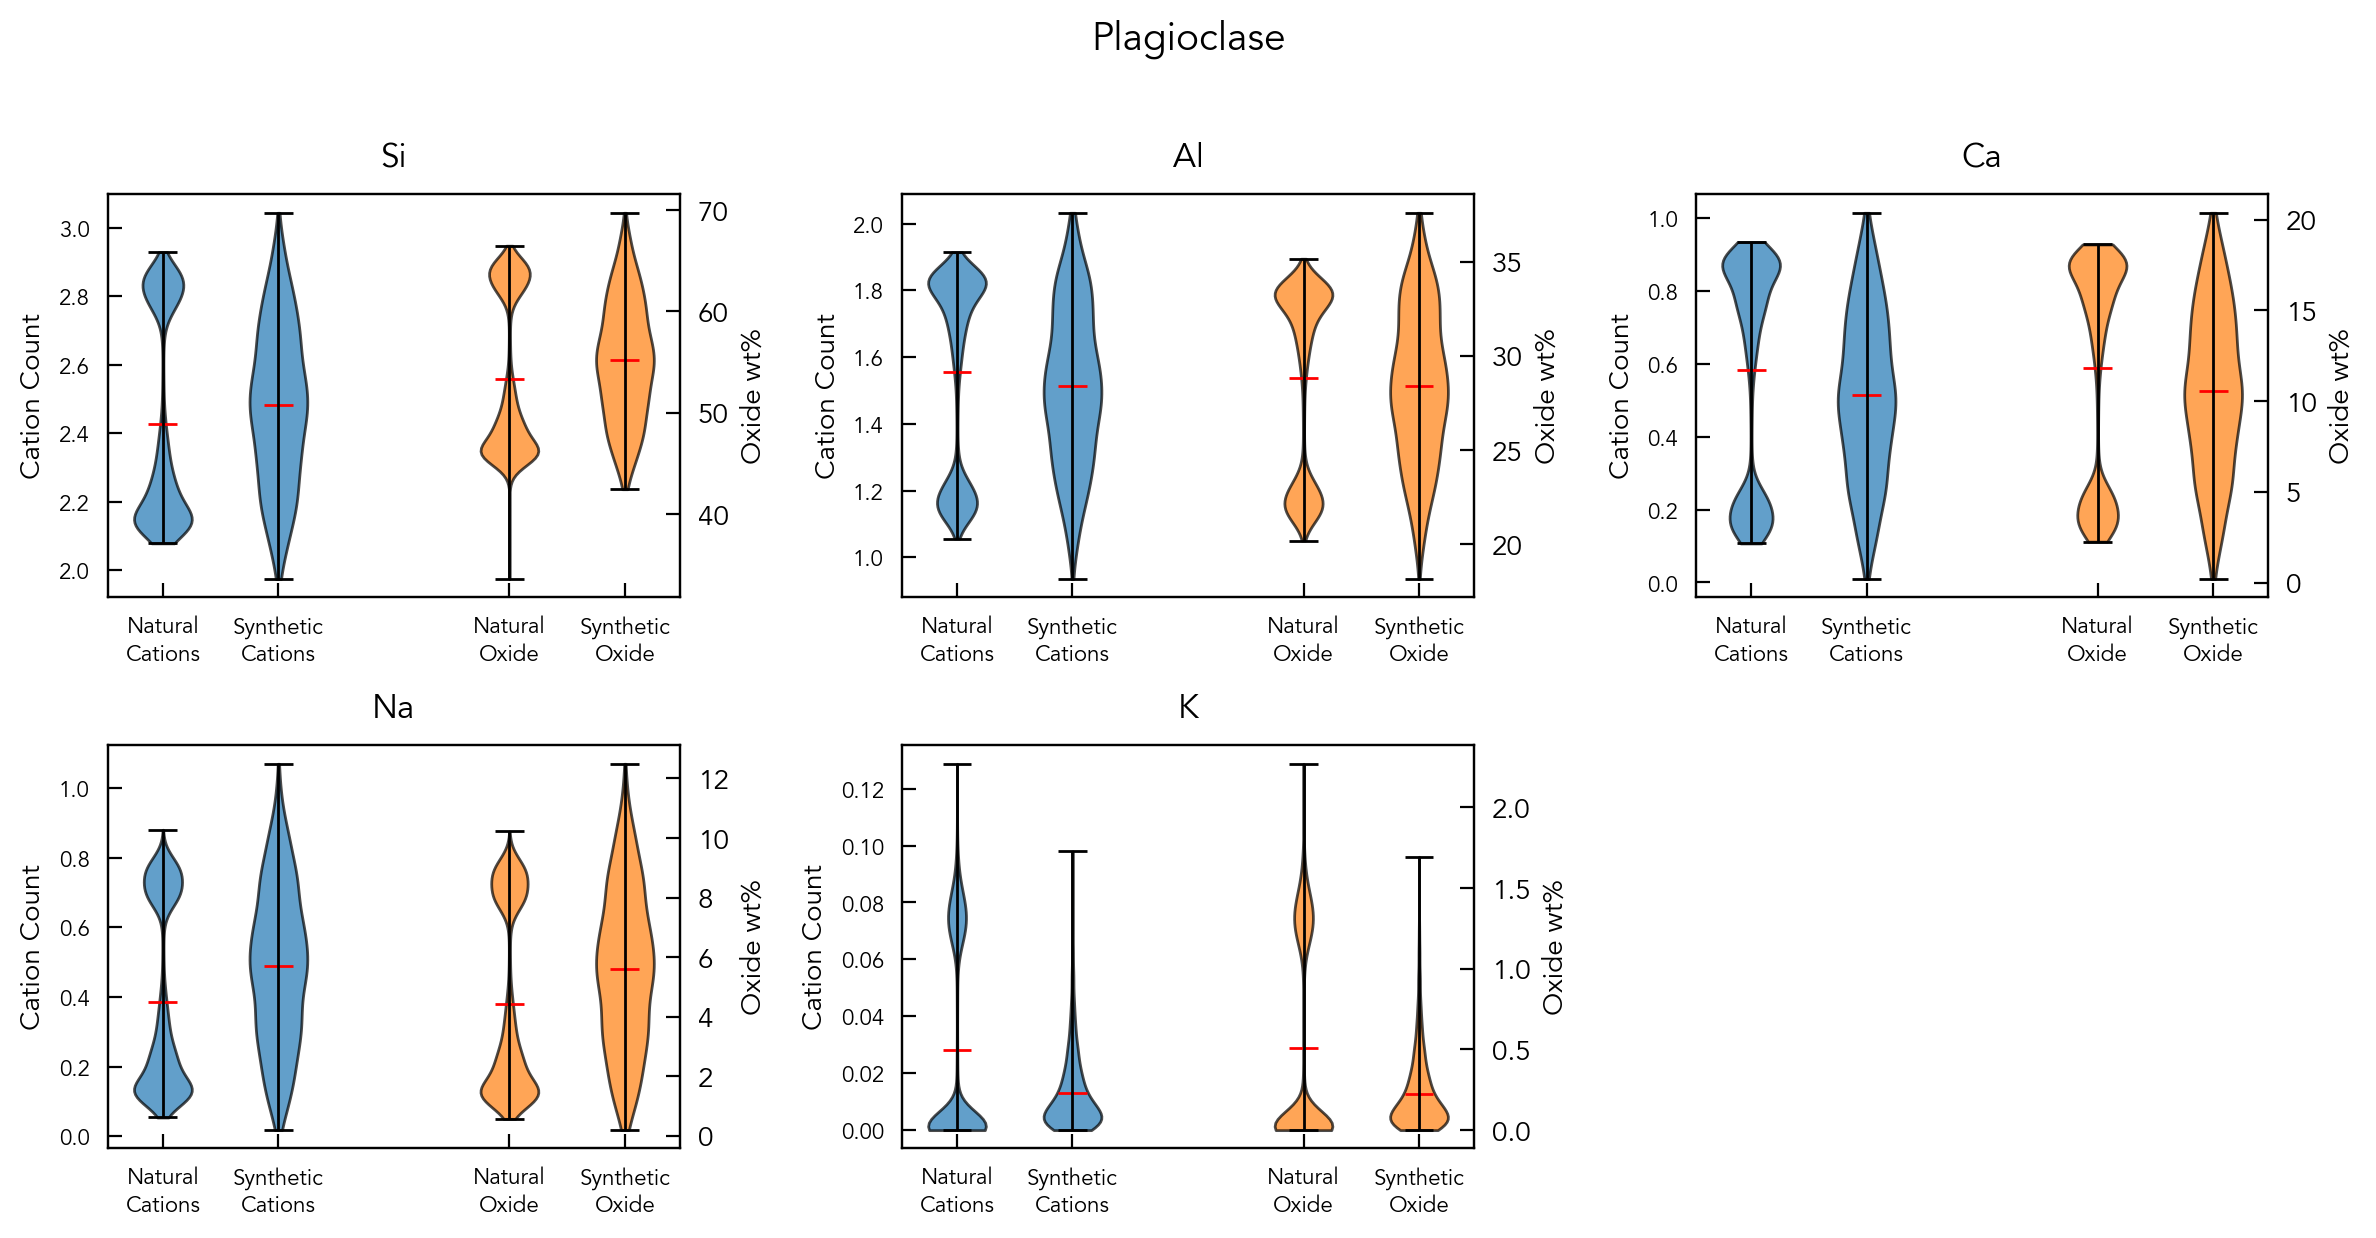

ks_stat       p_value  mean_base  mean_synth  std_base  std_synth
cation                                                                        
Si_cat_8ox  0.306728  1.129497e-79   2.427848    2.483745  0.307033   0.229912
Al_cat_8ox  0.275176  6.164921e-64   1.554234    1.512285  0.296914   0.233351
Ca_cat_8ox  0.322655  2.513469e-88   0.582453    0.513870  0.308646   0.223924
Na_cat_8ox  0.336891  1.805462e-96   0.385263    0.487401  0.268069   0.223035
K_cat_8ox   0.334276  6.052316e-95   0.028199    0.013022  0.035715   0.013311

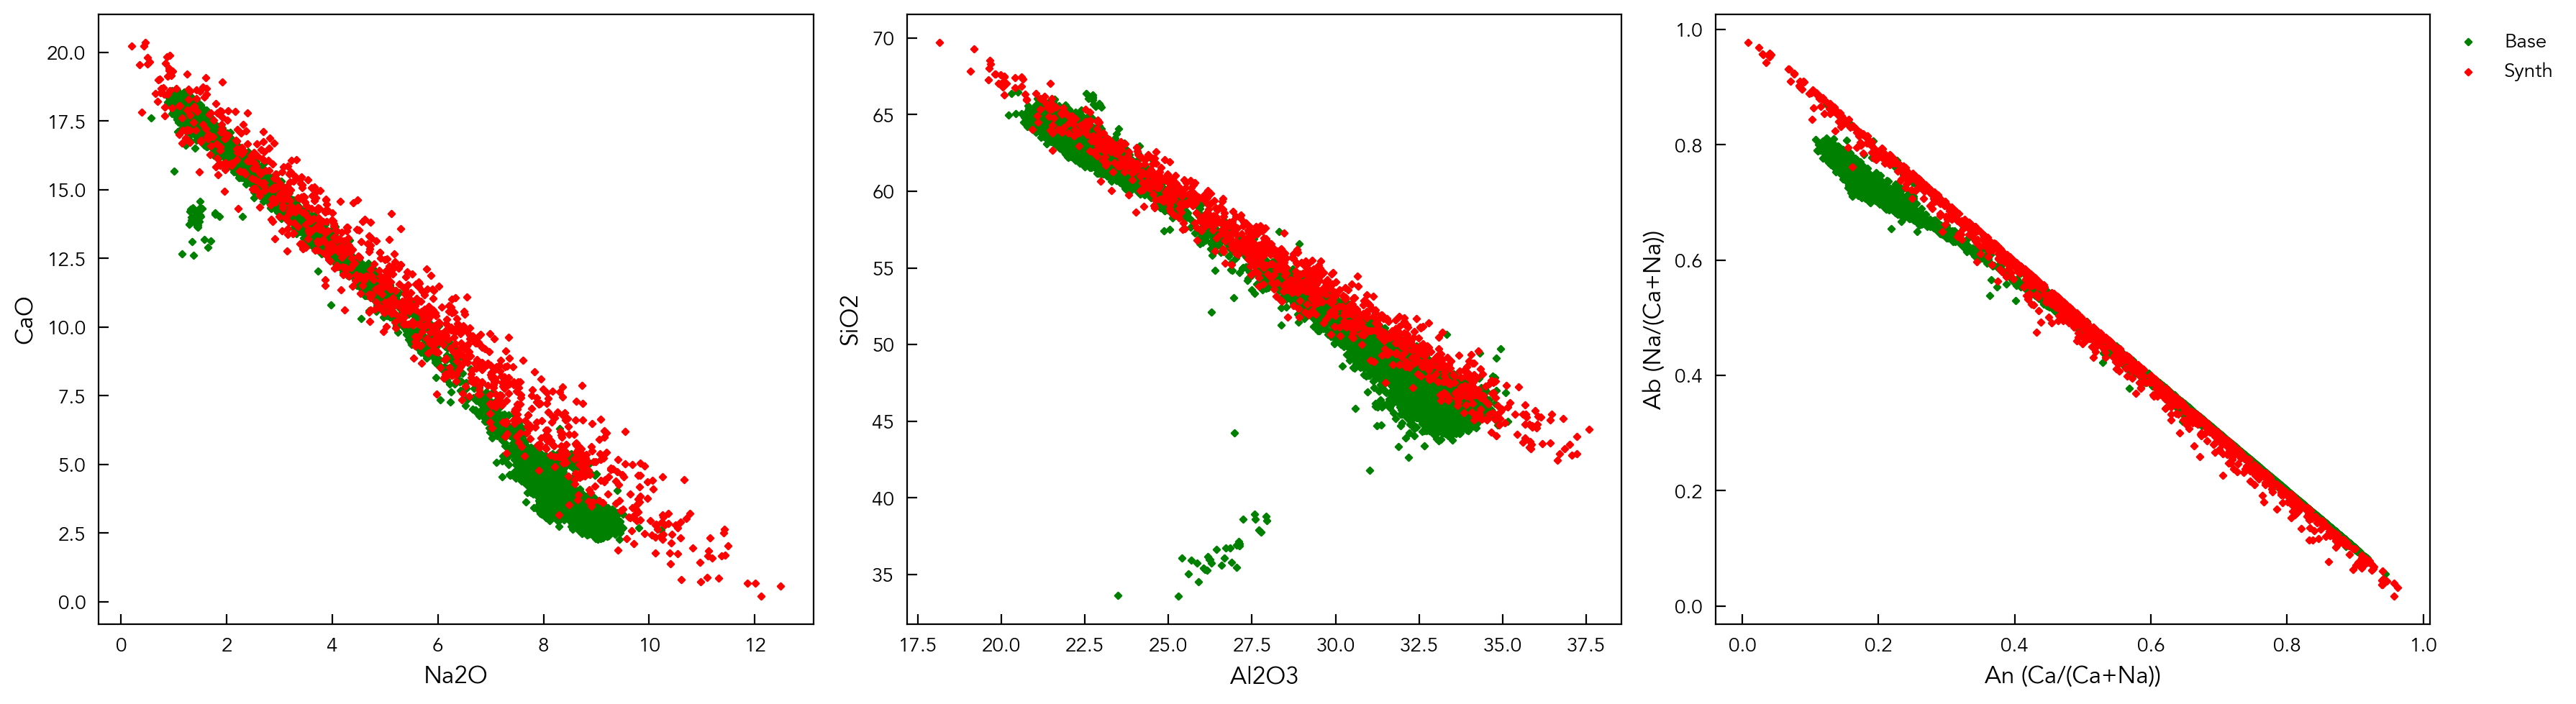

In [ ]:
# %% 

pl_endmembers = {
    # Albite: NaAlSi₃O₈
    'Ab': {'Na': 1, 'Al': 1, 'Si': 3, 'O': 8},
    # Anorthite: CaAl₂Si₂O₈
    'An': {'Ca': 1, 'Al': 2, 'Si': 2, 'O': 8},
}

# define coupled sites
pl_sites = {
    'M': {'elements': ['Na', 'Ca'], 'total': 1,
          'coupling': {'T': {'Na': ['Al', 1], 'Ca': ['Al', 2]}}},
    'T': {'elements': ['Al', 'Si'], 'total': 4}
}

# minor elements
pl_minors = {'K': {'distribution': 'exponential', 'scale': 0.01, 'max_fraction': 0.02}}

# create generator
pl_gen = mm.SolidSolutionGenerator(
    endmembers=pl_endmembers,
    coupled_sites=pl_sites,
    oxygen_basis=8,
    element_noise_scale=0.05,
    min_site_fraction=0.2,
    minor_elements=pl_minors,
    mixing_dist='beta',
    mixing_params={'a': 2, 'b': 2}
)

# generate samples
df_pl = pl_gen.generate(1000)
pl_calc_synth = mm.FeldsparCalculator(df_pl)
pl_comp_synth = pl_calc_synth.calculate_components()
display(pl_comp_synth)

stats_pl = pl_gen.compare_distributions(base_df=pl_comp_filt, synth_df=pl_comp_synth, suptitle="Plagioclase")
display(stats_pl)

# Example scatter‐plot comparing base vs. synthetic oxide proportions
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].scatter(pl_comp_filt["Na2O"],  pl_comp_filt["CaO"],  s=5, c="g")
ax[0].scatter(pl_comp_synth["Na2O"], pl_comp_synth["CaO"], s=5, c="r")
ax[0].set_xlabel("Na2O")
ax[0].set_ylabel("CaO")

ax[1].scatter(pl_comp_filt["Al2O3"],  pl_comp_filt["SiO2"],  s=5, c="g")
ax[1].scatter(pl_comp_synth["Al2O3"], pl_comp_synth["SiO2"], s=5, c="r")
ax[1].set_xlabel("Al2O3")
ax[1].set_ylabel("SiO2")

ax[2].scatter(pl_comp_filt["An"], pl_comp_filt["Ab"], s=5, c="g", label="Base")
ax[2].scatter(pl_comp_synth["An"], pl_comp_synth["Ab"], s=5, c="r", label="Synth")
ax[2].set_xlabel("An (Ca/(Ca+Na))")
ax[2].set_ylabel("Ab (Na/(Ca+Na))")
ax[2].legend()
plt.tight_layout()

Sample Name       SiO2       FeOt       MnO        MgO       CaO  \
0            NaN  38.232371  21.497814  0.082403  40.007217  0.180194   
1            NaN  34.650799  48.127181  0.235009  16.940101  0.046910   
2            NaN  33.263784  51.088301  0.100135  15.199321  0.348458   
3            NaN  42.100187   6.590379  0.759702  50.079178  0.470554   
4            NaN  38.787440  20.474121  1.366657  39.359886  0.011896   
..           ...        ...        ...       ...        ...       ...   
995          NaN  33.539699  46.568649  0.380600  19.443648  0.067404   
996          NaN  38.833412  18.246539  0.086609  42.120749  0.712692   
997          NaN  35.551001  34.246147  0.423234  29.152172  0.627447   
998          NaN  35.589534  31.379098  1.271923  30.744451  1.014993   
999          NaN  32.833484  56.433175  0.291779  10.058888  0.382675   

     SiO2_mols  FeOt_mols  MnO_mols  MgO_mols  ...  Mn_cat_4ox  Mg_cat_4ox  \
0     0.636312   0.299219  0.001162  0.992627  ...    0.001809    1.545639   
1     0.576703   0.669862  0.003313  0.420304  ...    0.005896    0.747965   
2     0.553619   0.711077  0.001412  0.377113  ...    0.002563    0.684710   
3     0.700685   0.091729  0.010709  1.242524  ...    0.015551    1.804208   
4     0.645550   0.284971  0.019266  0.976565  ...    0.029961    1.518697   
..         ...        ...       ...       ...  ...         ...         ...   
995   0.558211   0.648170  0.005365  0.482420  ...    0.009523    0.856274   
996   0.646315   0.253966  0.001221  1.045066  ...    0.001874    1.604343   
997   0.591685   0.476658  0.005966  0.723300  ...    0.009942    1.205257   
998   0.592327   0.436753  0.017930  0.762806  ...    0.029634    1.260711   
999   0.546457   0.785470  0.004113  0.249573  ...    0.007692    0.466733   

     Ca_cat_4ox  Mineral  Source  Cation_Sum    M_site    T_site  \
0      0.005003      NaN     NaN    3.009186  2.011559  0.990814   
1      0.001489      NaN     NaN    2.973711  1.940038  1.026289   
2      0.011282      NaN     NaN    2.994815  1.975786  1.005185   
3      0.012184      NaN     NaN    2.982569  1.937403  1.017431   
4      0.000330      NaN     NaN    2.996078  1.961866  1.003922   
..          ...      ...     ...         ...       ...       ...   
995    0.002133      NaN     NaN    3.009201  2.006746  0.990799   
996    0.019510      NaN     NaN    3.007803  1.994221  0.992197   
997    0.018644      NaN     NaN    3.014056  1.999527  0.985944   
998    0.029914      NaN     NaN    3.021046  1.982543  0.978954   
999    0.012762      NaN     NaN    2.978057  1.935660  1.021943   

     M_site_expanded       XFo  
0           2.018371  0.768379  
1           1.947422  0.385541  
2           1.989631  0.346551  
3           1.965138  0.931251  
4           1.992157  0.774108  
..               ...       ...  
995         2.018402  0.426698  
996         2.015605  0.804496  
997         2.028113  0.602771  
998         2.042091  0.635906  
999         1.956114  0.241123  

[1000 rows x 28 columns]

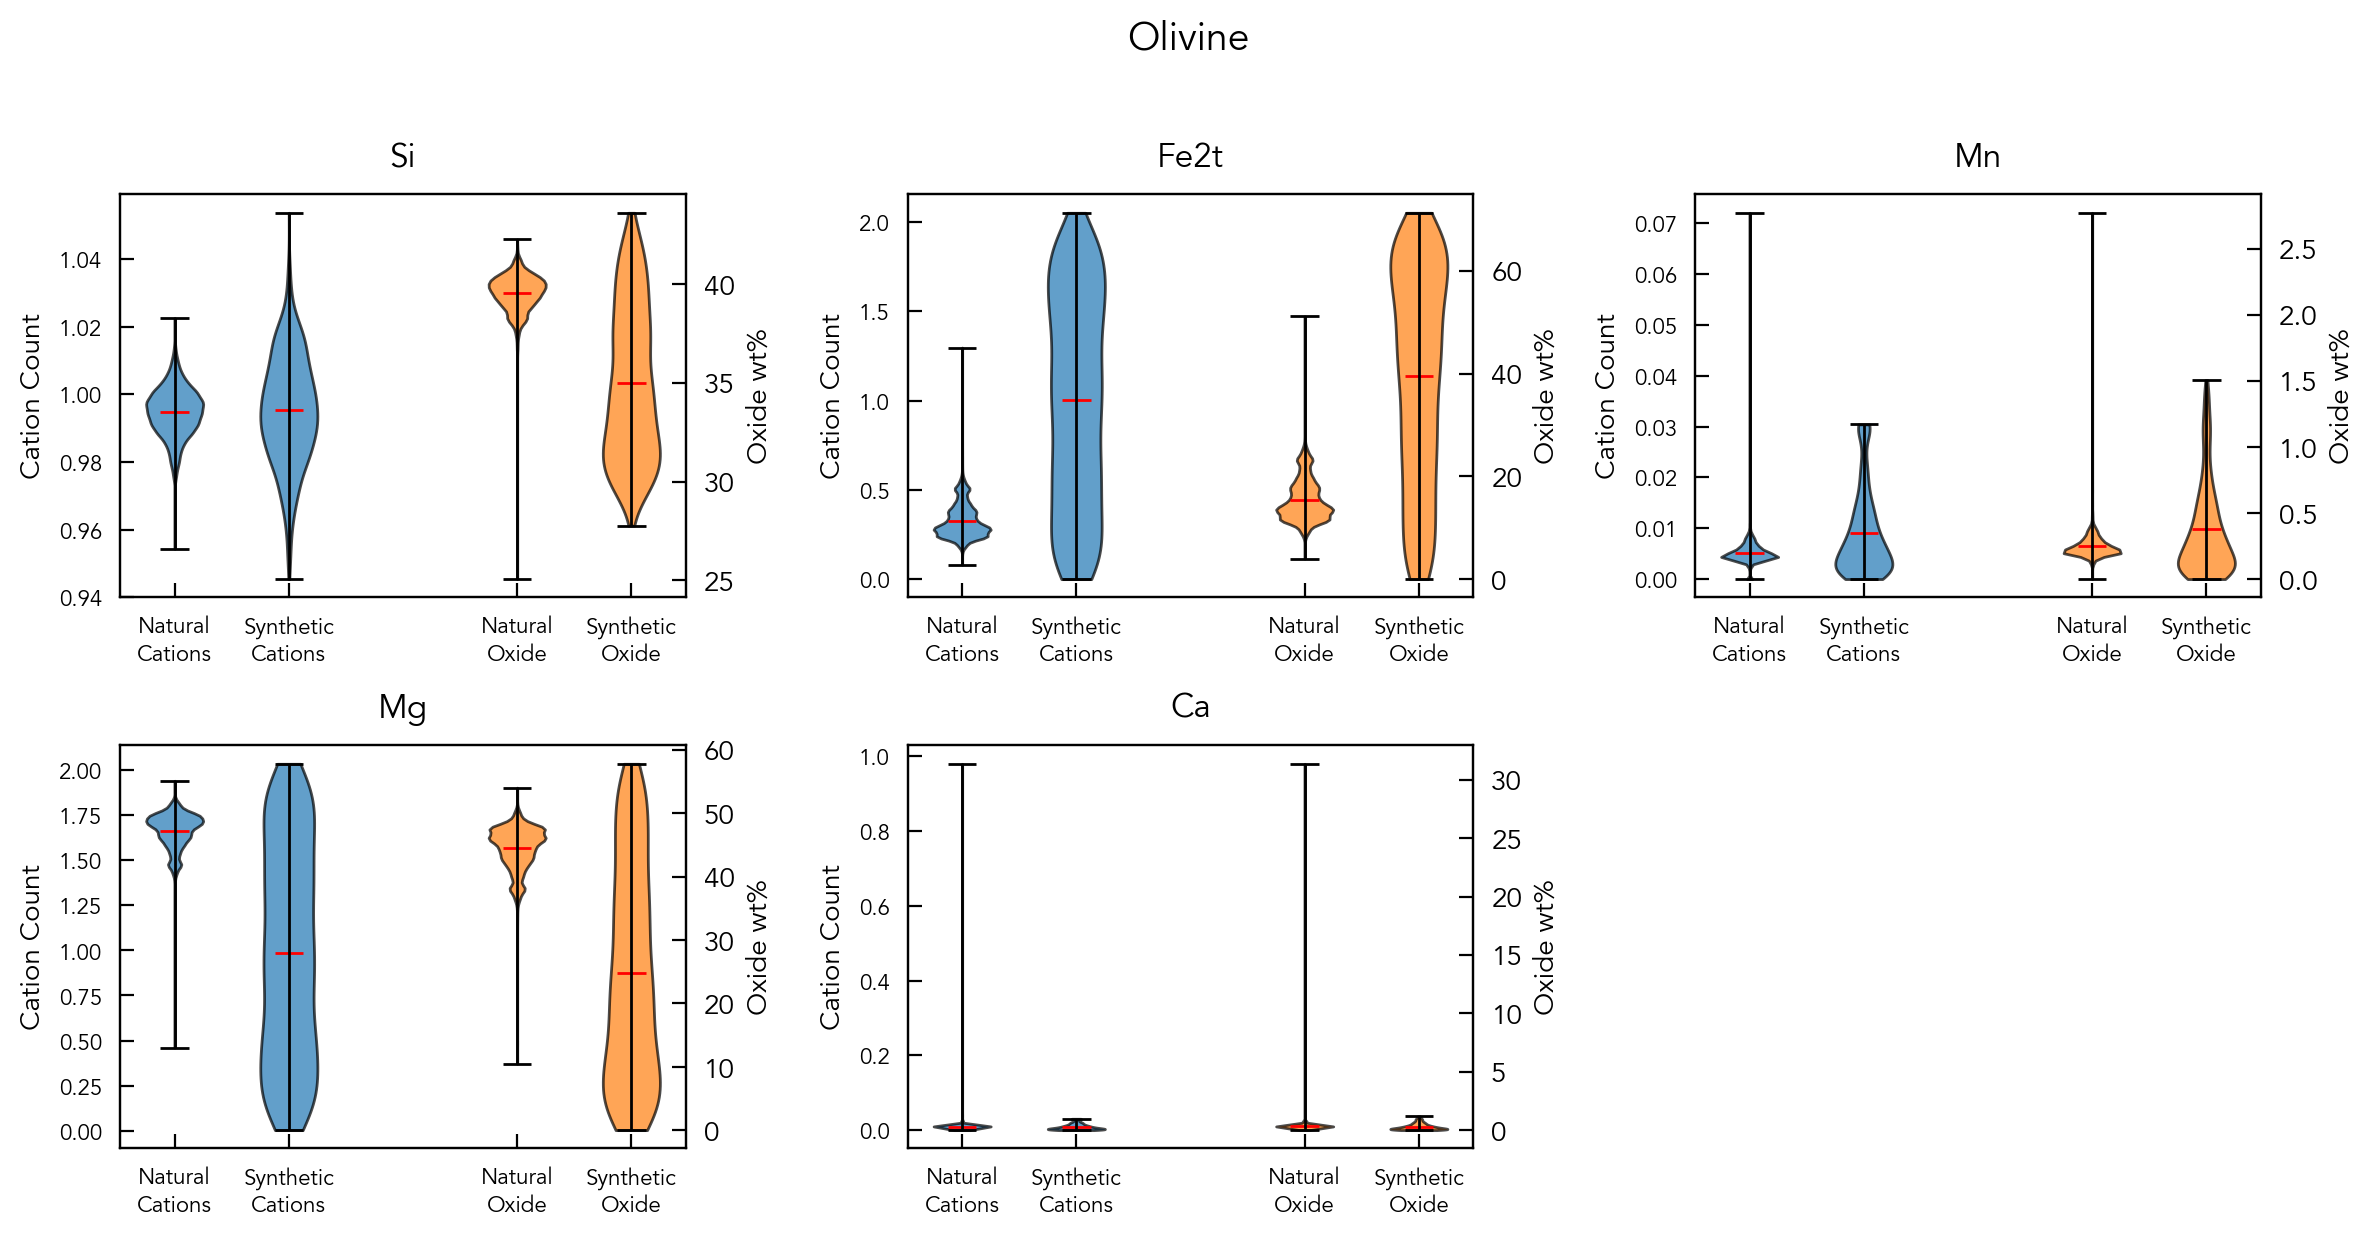

ks_stat        p_value  mean_base  mean_synth  std_base  \
cation                                                                   
Si_cat_4ox    0.218778   1.060774e-40   0.994931    0.995362  0.007191   
Fe2t_cat_4ox  0.705195   0.000000e+00   0.327586    1.002467  0.094730   
Mn_cat_4ox    0.356620  1.970213e-109   0.005196    0.009085  0.002395   
Mg_cat_4ox    0.698421   0.000000e+00   1.664860    0.988592  0.104286   
Ca_cat_4ox    0.358329  1.636863e-110   0.009133    0.009132  0.032881   

              std_synth  
cation                   
Si_cat_4ox     0.016401  
Fe2t_cat_4ox   0.590762  
Mn_cat_4ox     0.008457  
Mg_cat_4ox     0.591221  
Ca_cat_4ox     0.008227

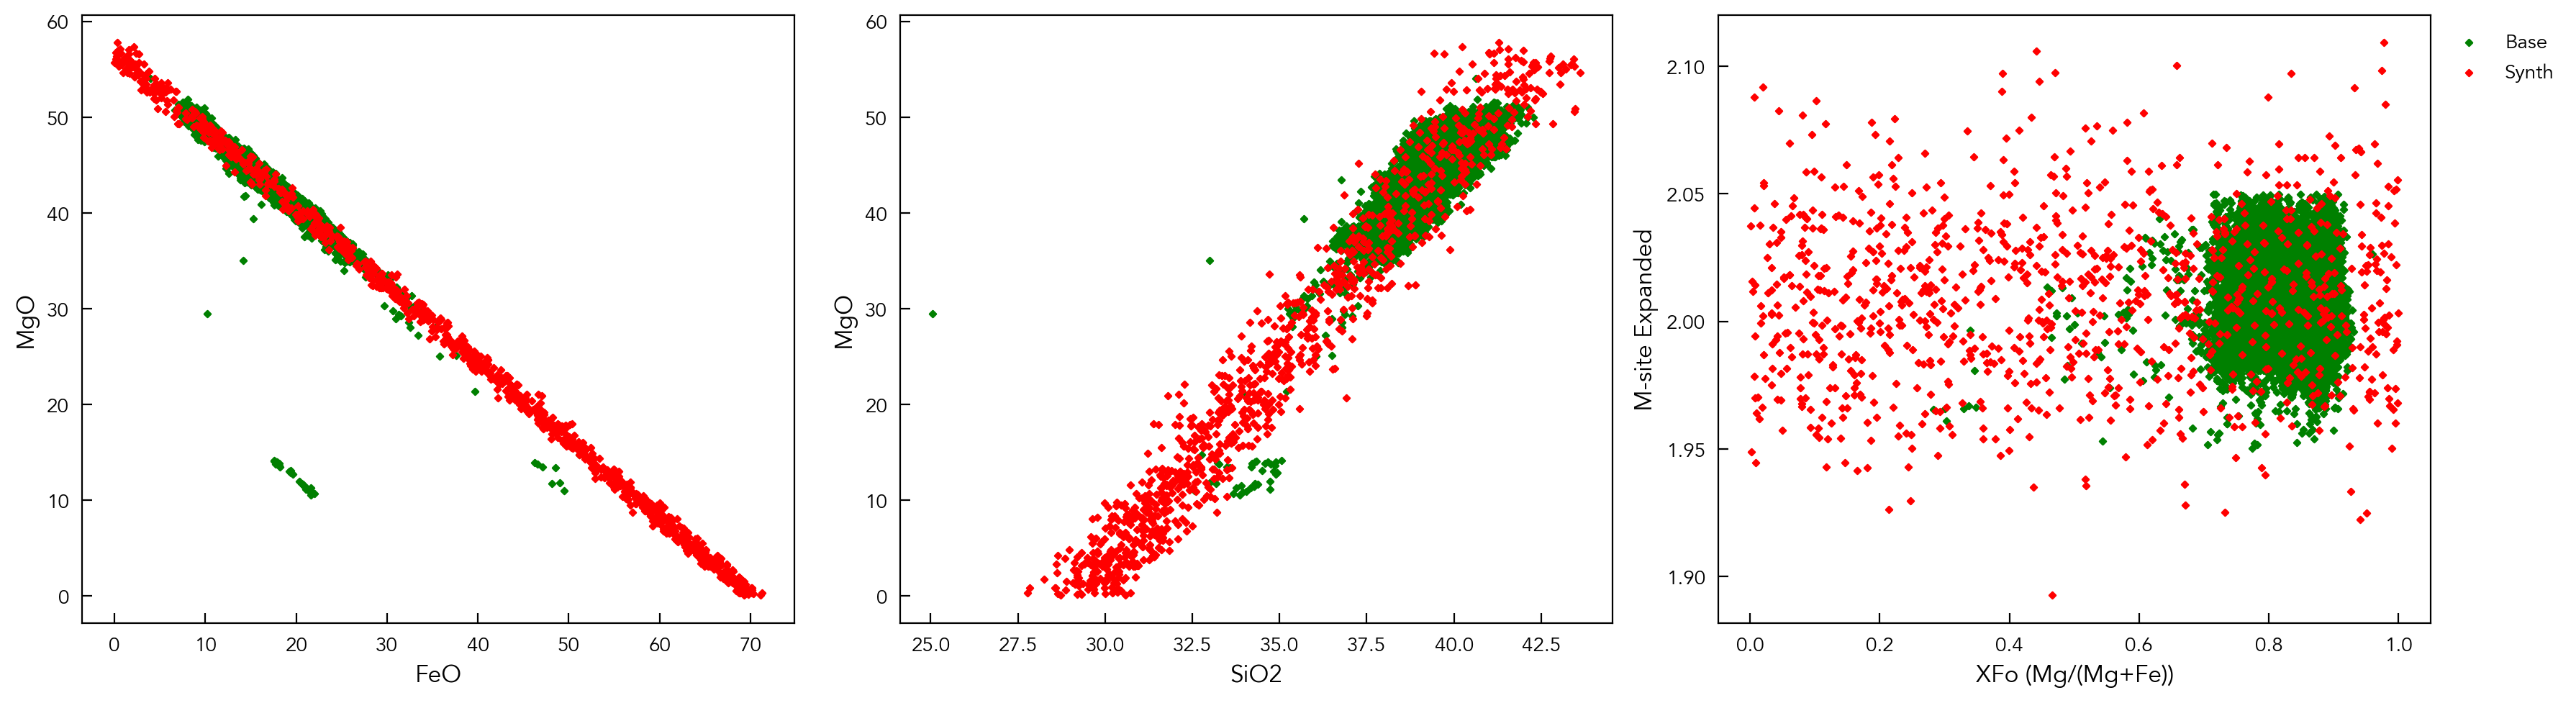

In [ ]:
# %%

ol_endmembers = {
    # Forsterite: Mg2SiO4
    'Fo': {'Mg': 2, 'Si': 1, 'O': 4},
    # Fayalite: Fe2SiO4
    'Fa': {'Fe2t': 2, 'Si': 1, 'O': 4}
}
ol_sites = {}

# minor elements
ol_minors = {
    'Ca': {'distribution': 'exponential', 'scale': 0.01, 'max_fraction': 0.01},
    'Mn': {'distribution': 'exponential', 'scale': 0.01, 'max_fraction': 0.01}
}

# create generator
ol_gen = mm.SolidSolutionGenerator(
    endmembers=ol_endmembers,
    coupled_sites=ol_sites,
    oxygen_basis=4,
    element_noise_scale=0.025,
    min_site_fraction=0.2,
    minor_elements=ol_minors,
    mixing_dist='beta',
    mixing_params={'a': 1, 'b': 1}
)

# generate samples
df_ol = ol_gen.generate(1000)
ol_calc_synth = mm.OlivineCalculator(df_ol)
ol_comp_synth = ol_calc_synth.calculate_components()
display(ol_comp_synth)

stats_ol = ol_gen.compare_distributions(base_df=ol_comp_filt, synth_df=ol_comp_synth, suptitle="Olivine")
display(stats_ol)

# scatter‐plot comparing base vs. synthetic oxide proportions
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].scatter(ol_comp_filt["FeOt"],  ol_comp_filt["MgO"],  s=5, c="g")
ax[0].scatter(ol_comp_synth["FeOt"], ol_comp_synth["MgO"], s=5, c="r")
ax[0].set_xlabel("FeO")
ax[0].set_ylabel("MgO")

ax[1].scatter(ol_comp_filt["SiO2"],  ol_comp_filt["MgO"],  s=5, c="g")
ax[1].scatter(ol_comp_synth["SiO2"], ol_comp_synth["MgO"], s=5, c="r")
ax[1].set_xlabel("SiO2")
ax[1].set_ylabel("MgO")

ax[2].scatter(ol_comp_filt["XFo"], ol_comp_filt["M_site_expanded"], s=5, c="g", label="Base")
ax[2].scatter(ol_comp_synth["XFo"], ol_comp_synth["M_site_expanded"], s=5, c="r", label="Synth")
ax[2].set_xlabel("XFo (Mg/(Mg+Fe))")
ax[2].set_ylabel("M-site Expanded")
ax[2].legend()
plt.tight_layout()

Sample Name       SiO2      FeOt       MgO       ZrO2      HfO2  \
0            NaN  33.197208  0.007849  0.004403  66.117035  0.673505   
1            NaN  32.670491  0.007805  0.004378  66.136450  1.180877   
2            NaN  32.944989  0.007816  0.004384  65.625449  1.417362   
3            NaN  31.778458  0.007741  0.004342  66.668198  1.541260   
4            NaN  32.083019  0.007704  0.004321  64.047979  3.856977   
..           ...        ...       ...       ...        ...       ...   
446          NaN  32.160093  0.007769  0.004358  66.454054  1.373726   
447          NaN  32.673325  0.007777  0.000624  65.010756  2.307518   
448          NaN  32.177342  0.007718  0.004329  64.288418  3.522192   
449          NaN  32.519269  0.007814  0.004383  67.065805  0.402728   
450          NaN  31.675393  0.007719  0.004330  66.117082  2.195476   

     SiO2_mols  FeOt_mols  MgO_mols  ZrO2_mols  ...  Fe2t_cat_4ox  Mg_cat_4ox  \
0     0.552511   0.000109  0.000109   0.536568  ...        0.0002    0.000200   
1     0.543744   0.000109  0.000109   0.536726  ...        0.0002    0.000200   
2     0.548313   0.000109  0.000109   0.532579  ...        0.0002    0.000200   
3     0.528898   0.000108  0.000108   0.541041  ...        0.0002    0.000200   
4     0.533967   0.000107  0.000107   0.519777  ...        0.0002    0.000200   
..         ...        ...       ...        ...  ...           ...         ...   
446   0.535250   0.000108  0.000108   0.539303  ...        0.0002    0.000200   
447   0.543791   0.000108  0.000015   0.527590  ...        0.0002    0.000029   
448   0.535537   0.000107  0.000107   0.521728  ...        0.0002    0.000200   
449   0.541227   0.000109  0.000109   0.544268  ...        0.0002    0.000200   
450   0.527183   0.000107  0.000107   0.536569  ...        0.0002    0.000200   

     Zr_cat_4ox  Hf_cat_4ox  Mineral  Source  Cation_Sum    M_site    T_site  \
0      0.982377    0.005858      NaN     NaN    2.000200  0.982377  1.011565   
1      0.988274    0.010330      NaN     NaN    2.000200  0.988274  1.001196   
2      0.979245    0.012381      NaN     NaN    2.000200  0.979245  1.008174   
3      1.004375    0.013593      NaN     NaN    2.000200  1.004375  0.981832   
4      0.969575    0.034182      NaN     NaN    2.000200  0.969575  0.996044   
..          ...         ...      ...     ...         ...       ...       ...   
446    0.997613    0.012073      NaN     NaN    2.000200  0.997613  0.990114   
447    0.974847    0.020257      NaN     NaN    2.000114  0.974847  1.004782   
448    0.971465    0.031159      NaN     NaN    2.000200  0.971465  0.997176   
449    1.000937    0.003519      NaN     NaN    2.000200  1.000937  0.995345   
450    0.998928    0.019419      NaN     NaN    2.000200  0.998928  0.981453   

        Hf_Zr  
0    0.005963  
1    0.010453  
2    0.012644  
3    0.013534  
4    0.035254  
..        ...  
446  0.012102  
447  0.020779  
448  0.032074  
449  0.003515  
450  0.019439  

[451 rows x 27 columns]

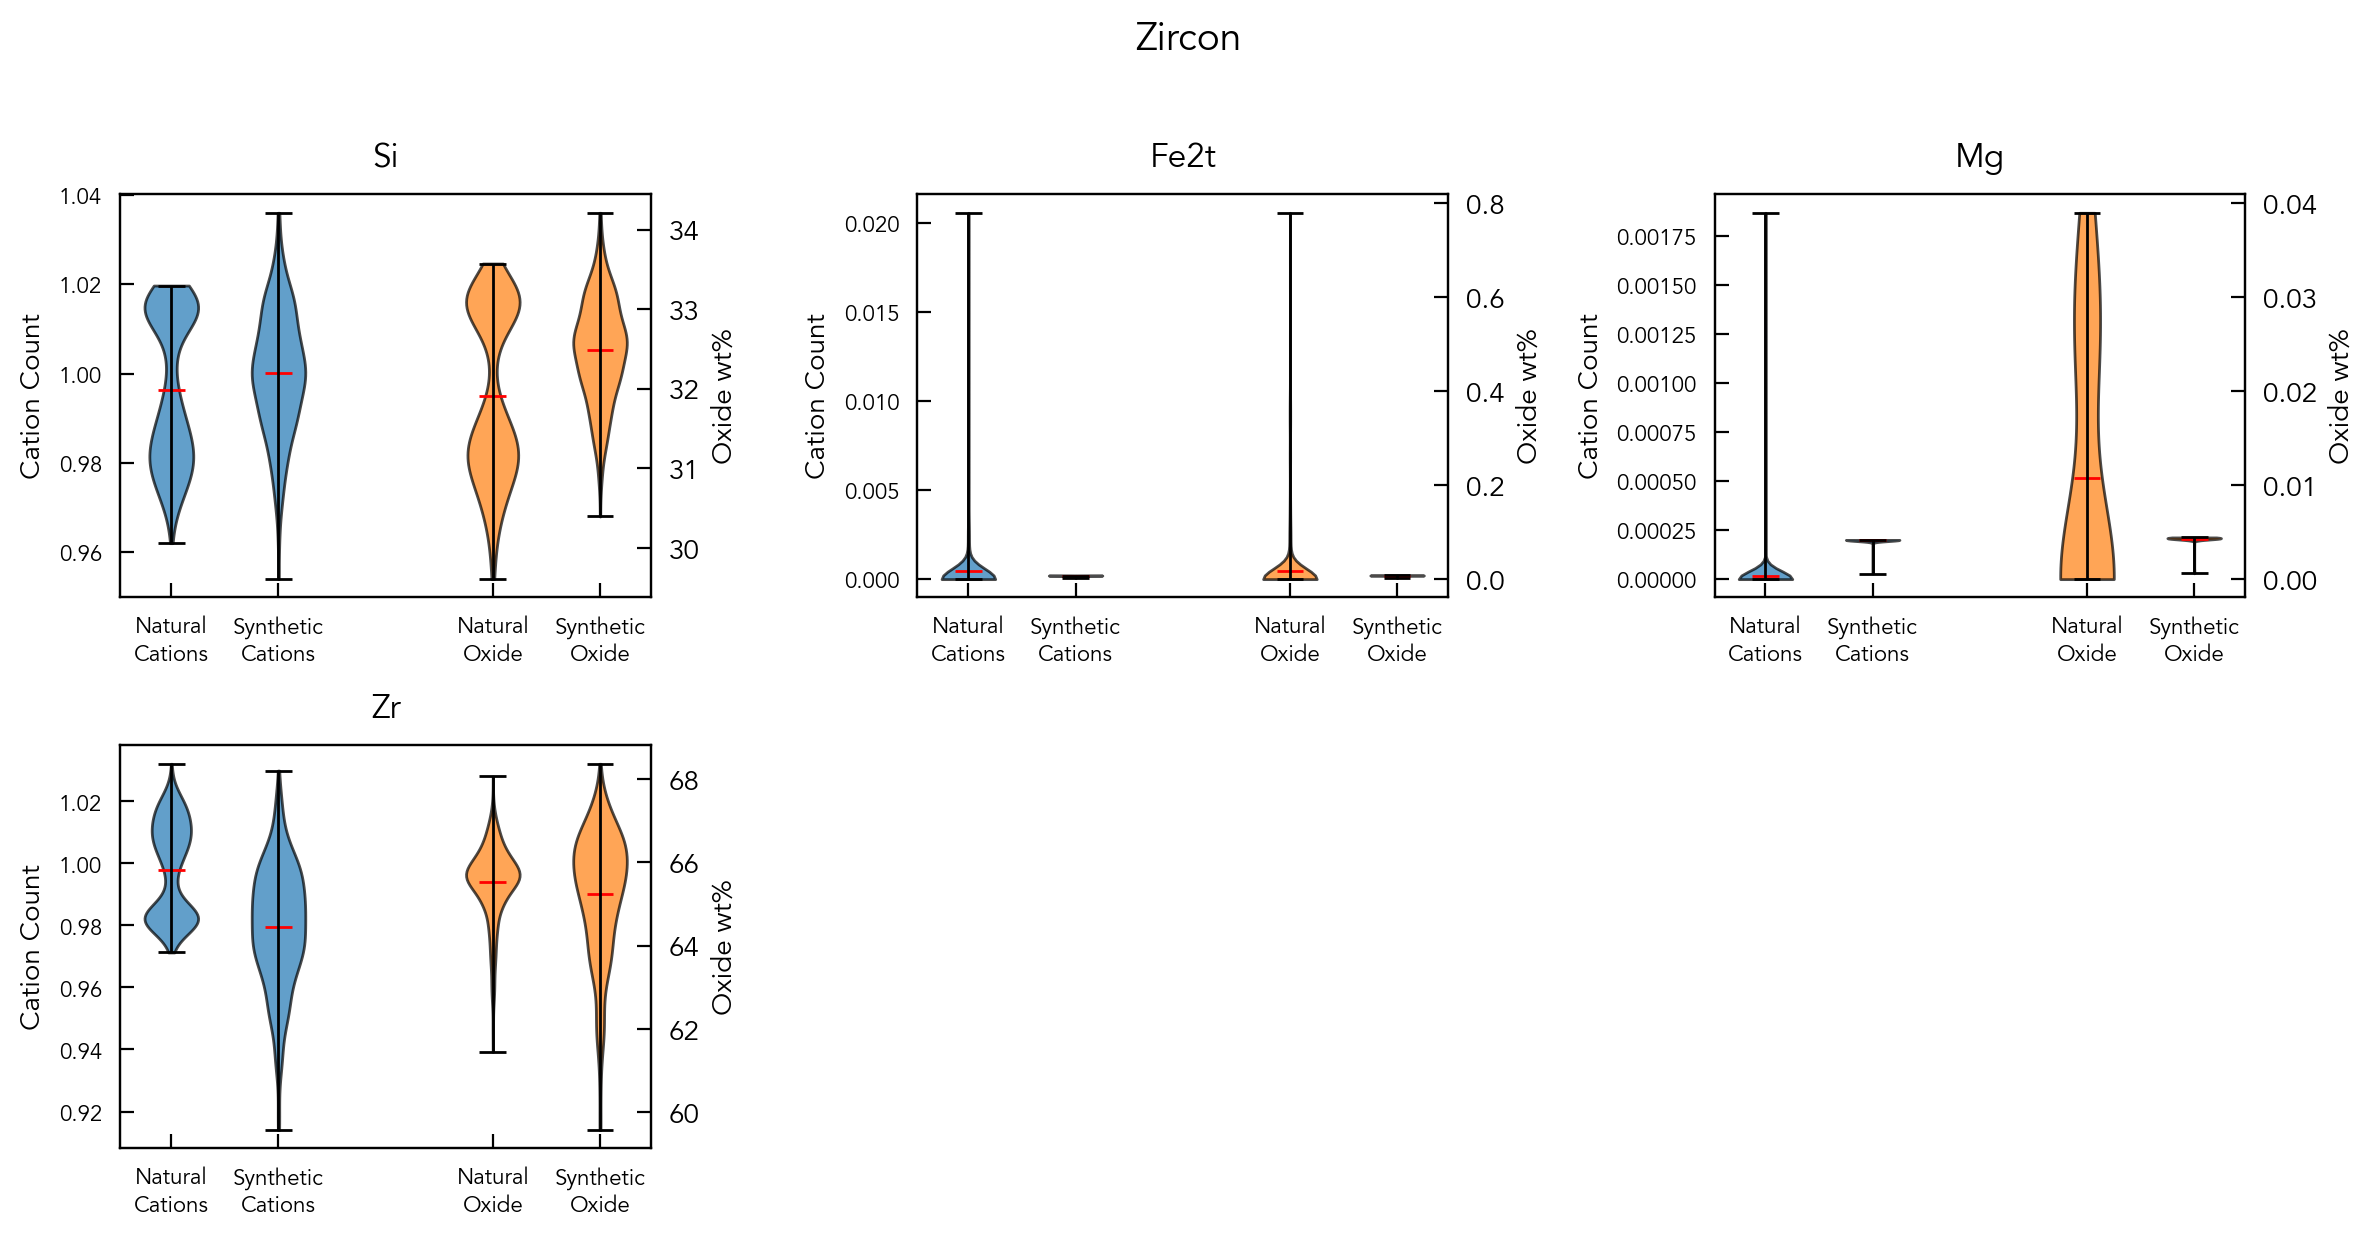

ks_stat        p_value  mean_base  mean_synth  std_base  \
cation                                                                   
Si_cat_4ox    0.263971   1.126928e-15   0.996219    1.000246  0.016841   
Fe2t_cat_4ox  0.916211  3.929071e-224   0.000468    0.000199  0.002066   
Mg_cat_4ox    0.989071  1.798963e-284   0.000015    0.000197  0.000145   
Zr_cat_4ox    0.426589   5.576949e-41   0.997951    0.979524  0.015137   

              std_synth  
cation                   
Si_cat_4ox     0.013658  
Fe2t_cat_4ox   0.000011  
Mg_cat_4ox     0.000020  
Zr_cat_4ox     0.019522

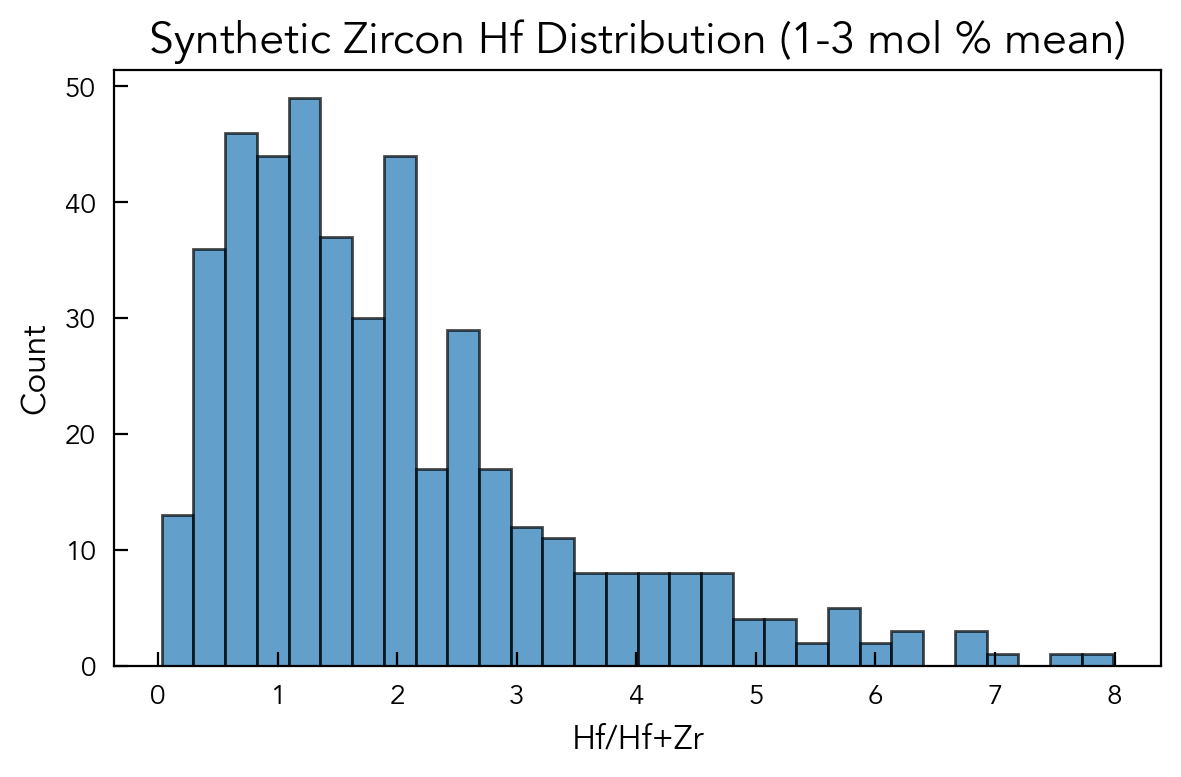

In [ ]:
# %% 

mm.SolidSolutionGenerator.OXIDE_MASSES = dict(
    mm.SolidSolutionGenerator.OXIDE_MASSES,
    **{"ZrO2": 123.222, "HfO2": 210.484}
)
mm.SolidSolutionGenerator.CATION_NUMBERS = dict(
    mm.SolidSolutionGenerator.CATION_NUMBERS,
    **{"ZrO2": 1, "HfO2": 1}
)
mm.SolidSolutionGenerator.OXYGEN_NUMBERS = dict(
    mm.SolidSolutionGenerator.OXYGEN_NUMBERS,
    **{"ZrO2": 2, "HfO2": 2}
)
mm.SolidSolutionGenerator.CATION_TO_OXIDE_MAP = dict(
    mm.SolidSolutionGenerator.CATION_TO_OXIDE_MAP,
    **{"Zr": "ZrO2", "Hf": "HfO2"}
)

# zircon endmembers
zr_endmembers = {
    'Zr': {'Zr': 1, 'Si': 1, 'O': 4}, # zircon
    'Hf': {'Hf': 1, 'Si': 1, 'O': 4}, # hafnon
}

# no coupled sites for zircon
zr_sites = {}

# optional traces
zr_minors = {
    'Mg': {'distribution': 'exponential', 'scale': 0.01, 'max_fraction': 0.0001},
    'Fe2t': {'distribution': 'exponential', 'scale': 0.01, 'max_fraction': 0.0001}
}  

#beta mix
zr_mix_params = {'a': 2, 'b': 98}

# instantiate generator
zr_gen = mm.SolidSolutionGenerator(
    endmembers = zr_endmembers,
    coupled_sites = zr_sites,
    oxygen_basis = 4,
    element_noise_scale = 0.02,
    min_site_fraction = 0.2,
    minor_elements = zr_minors,
    mixing_dist = 'beta',
    mixing_params = zr_mix_params
)

# generate 1000 synthetic zircons
df_zr = zr_gen.generate(n_samples=(1000-len(min_df_all[min_df_all.Mineral=='Zircon'])))
zr_calc_synth = mm.ZirconCalculator(df_zr)
zr_comp_synth = zr_calc_synth.calculate_components()
display(zr_comp_synth)
zr_comp_synth['Mineral'] = 'Zircon'

stats_zr = zr_gen.compare_distributions(base_df=zr_comp_filt,synth_df=zr_comp_synth, suptitle="Zircon")
display(stats_zr)

zr_comp_synth['Hf_per'] = zr_comp_synth['Hf_cat_4ox'] / (zr_comp_synth['Zr_cat_4ox'] + zr_comp_synth['Hf_cat_4ox'])

# quick histogram of Hf_mol_% to verify HfO2 generation
plt.figure(figsize=(6,4))
plt.hist(zr_comp_synth['Hf_per']*100, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Hf/Hf+Zr")
plt.ylabel("Count")
plt.title("Synthetic Zircon Hf Distribution (1-3 mol % mean)")
plt.tight_layout()
plt.show()

Sample Name       SiO2      Al2O3      Na2O        K2O  SiO2_mols  \
0            NaN  37.346538  32.533647  0.066267  30.053548   0.621569   
1            NaN  37.998356  32.210743  0.084820  29.706081   0.632417   
2            NaN  37.530883  32.328741  0.037898  30.102478   0.624637   
3            NaN  38.958116  31.988035  0.060015  28.993834   0.648391   
4            NaN  38.156231  32.374601  0.080947  29.388221   0.635045   
..           ...        ...        ...       ...        ...        ...   
811          NaN  38.397425  32.224748  0.109296  29.268531   0.639059   
812          NaN  38.031183  32.105937  0.121145  29.741735   0.632964   
813          NaN  37.525041  32.283273  0.032982  30.158704   0.624540   
814          NaN  37.500987  32.092414  0.059721  30.346878   0.624140   
815          NaN  37.130950  33.416532  0.177495  29.275022   0.617981   

     Al2O3_mols  Na2O_mols  K2O_mols   SiO2_ox  ...  Al_cat_4ox  Na_cat_4ox  \
0      0.319079   0.001069  0.319053  1.243138  ...    1.012750    0.003394   
1      0.315912   0.001369  0.315365  1.264835  ...    0.999207    0.004329   
2      0.317070   0.000611  0.319573  1.249274  ...    1.006304    0.001941   
3      0.313728   0.000968  0.307803  1.296782  ...    0.985506    0.003042   
4      0.317519   0.001306  0.311990  1.270090  ...    1.001661    0.004120   
..          ...        ...       ...       ...  ...         ...         ...   
811    0.316050   0.001763  0.310719  1.278118  ...    0.995922    0.005557   
812    0.314884   0.001955  0.315743  1.265927  ...    0.996360    0.006185   
813    0.316624   0.000532  0.320170  1.249080  ...    1.005293    0.001690   
814    0.314752   0.000964  0.322167  1.248279  ...    1.000934    0.003064   
815    0.327738   0.002864  0.310788  1.235962  ...    1.035169    0.009045   

     K_cat_4ox  Mineral  Source  Cation_Sum  A_B_site    A_site    B_site  \
0     1.012667      NaN     NaN    3.015233  1.016061  1.012667  0.003394   
1     0.997474      NaN     NaN    3.001154  1.001803  0.997474  0.004329   
2     1.014248      NaN     NaN    3.013718  1.016189  1.014248  0.001941   
3     0.966894      NaN     NaN    2.973828  0.969936  0.966894  0.003042   
4     0.984218      NaN     NaN    2.991668  0.988338  0.984218  0.004120   
..         ...      ...     ...         ...       ...       ...       ...   
811   0.979126      NaN     NaN    2.987492  0.984683  0.979126  0.005557   
812   0.999077      NaN     NaN    3.003036  1.005262  0.999077  0.006185   
813   1.016552      NaN     NaN    3.015004  1.018241  1.016552  0.001690   
814   1.024516      NaN     NaN    3.020918  1.027580  1.024516  0.003064   
815   0.981632      NaN     NaN    3.001801  0.990678  0.981632  0.009045   

       T_site  
0    1.999172  
1    1.999351  
2    1.997529  
3    2.003893  
4    2.003331  
..        ...  
811  2.002810  
812  1.997775  
813  1.996763  
814  1.993338  
815  2.011123  

[816 rows x 24 columns]

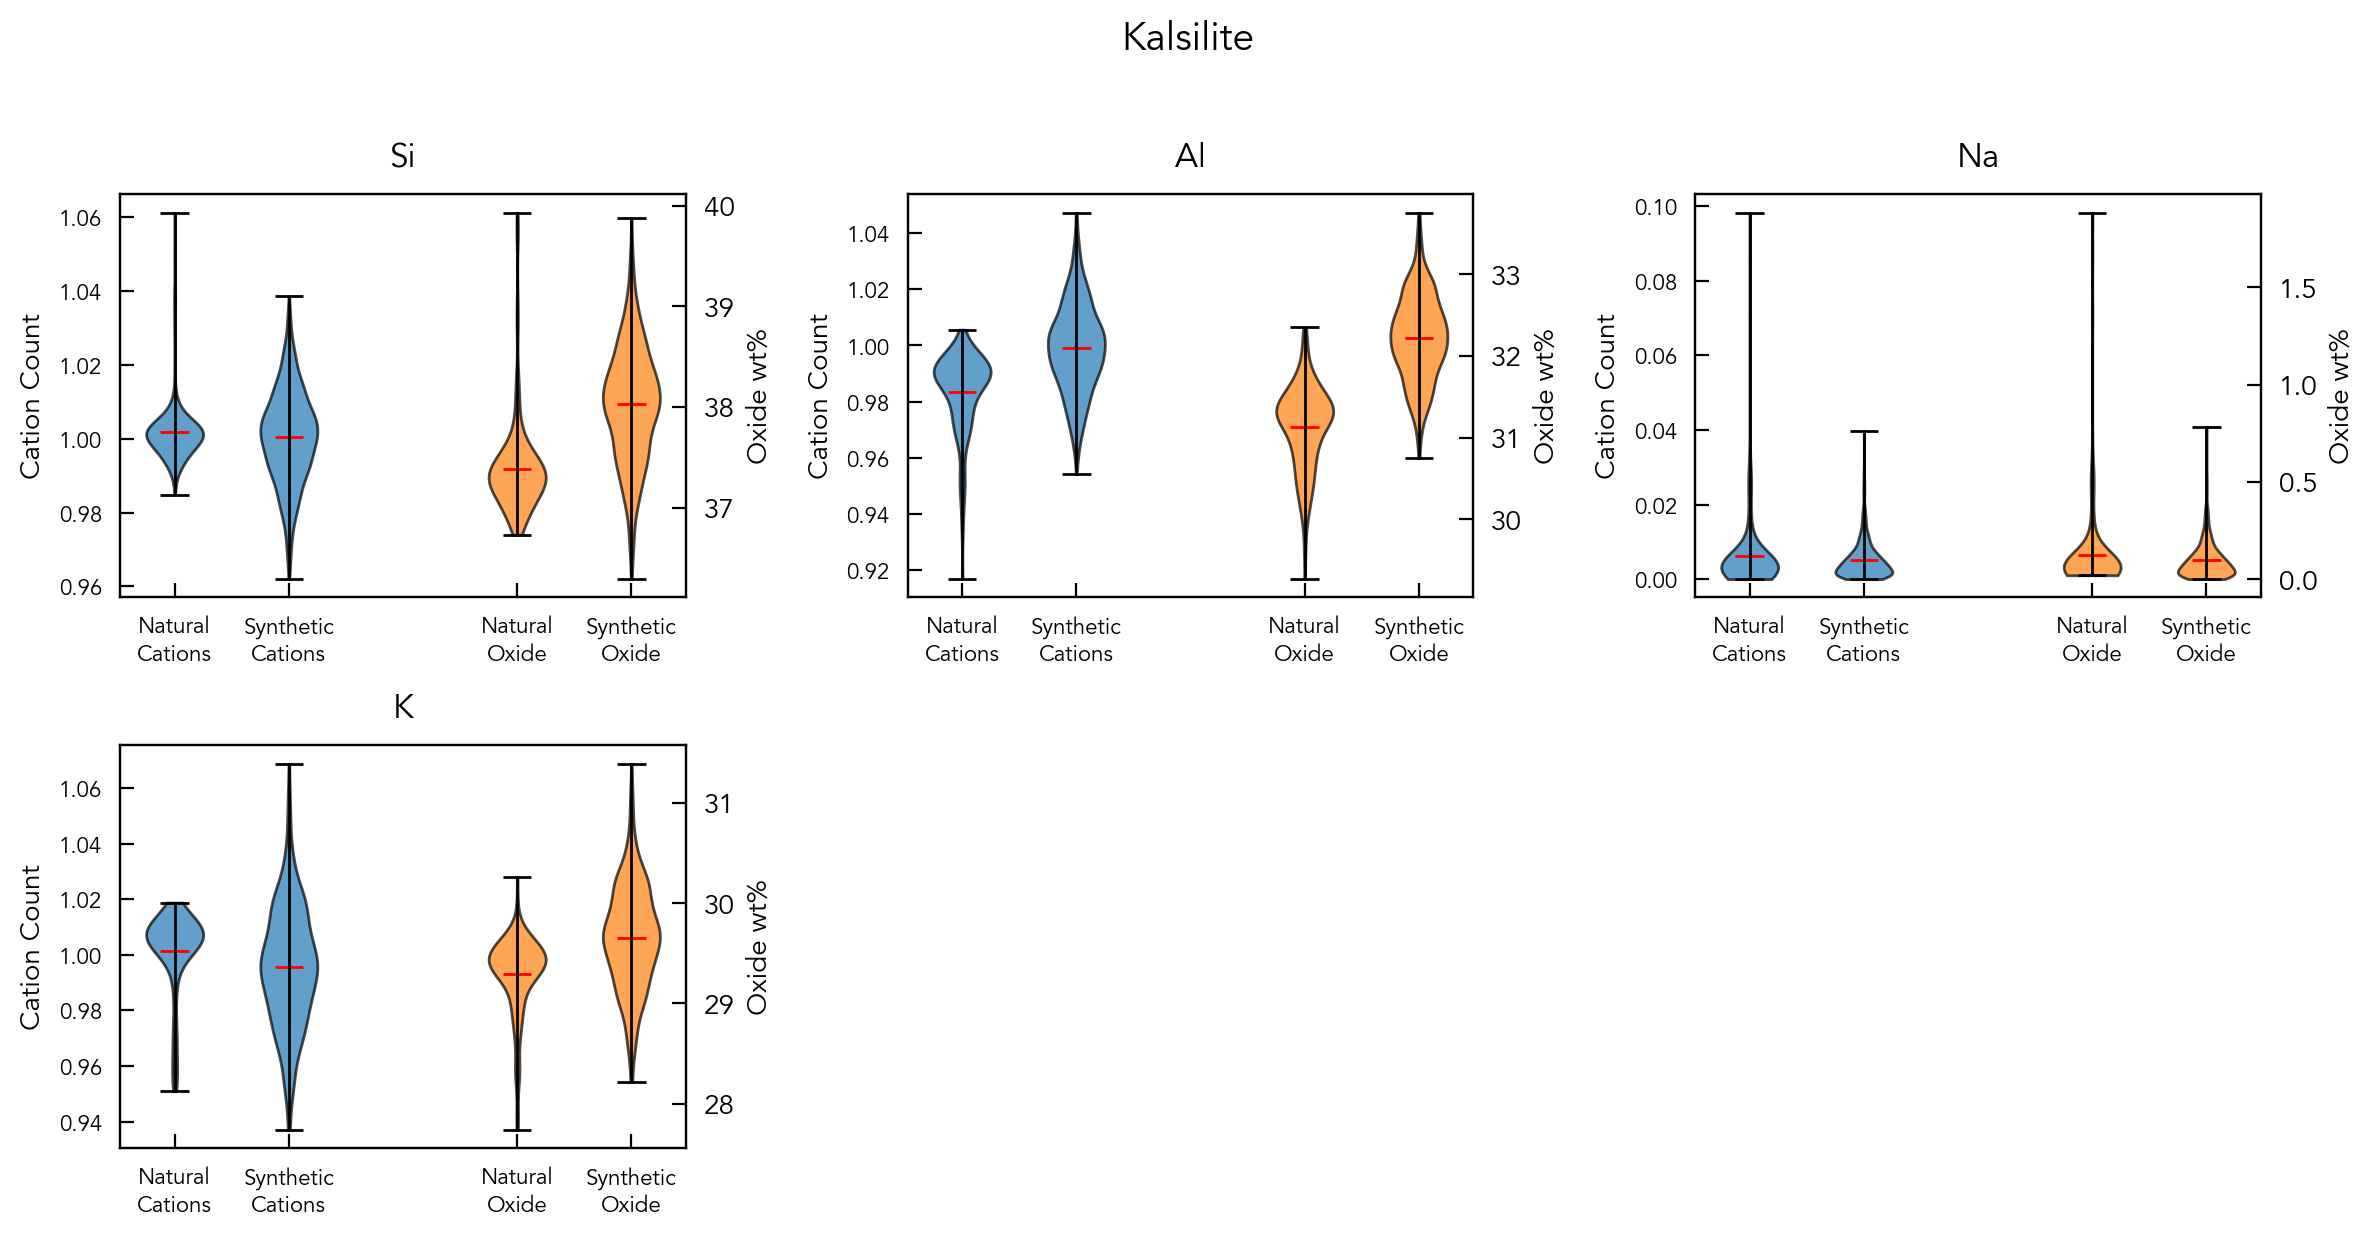

ks_stat       p_value  mean_base  mean_synth  std_base  std_synth
cation                                                                        
Si_cat_4ox  0.234548  9.622387e-08   1.001863    1.000500  0.008713   0.012762
Al_cat_4ox  0.503037  2.471229e-35   0.983321    0.999149  0.014419   0.016019
Na_cat_4ox  0.287937  1.711848e-11   0.006328    0.005027  0.011794   0.004963
K_cat_4ox   0.379103  8.220812e-20   1.001486    0.995523  0.015149   0.021830

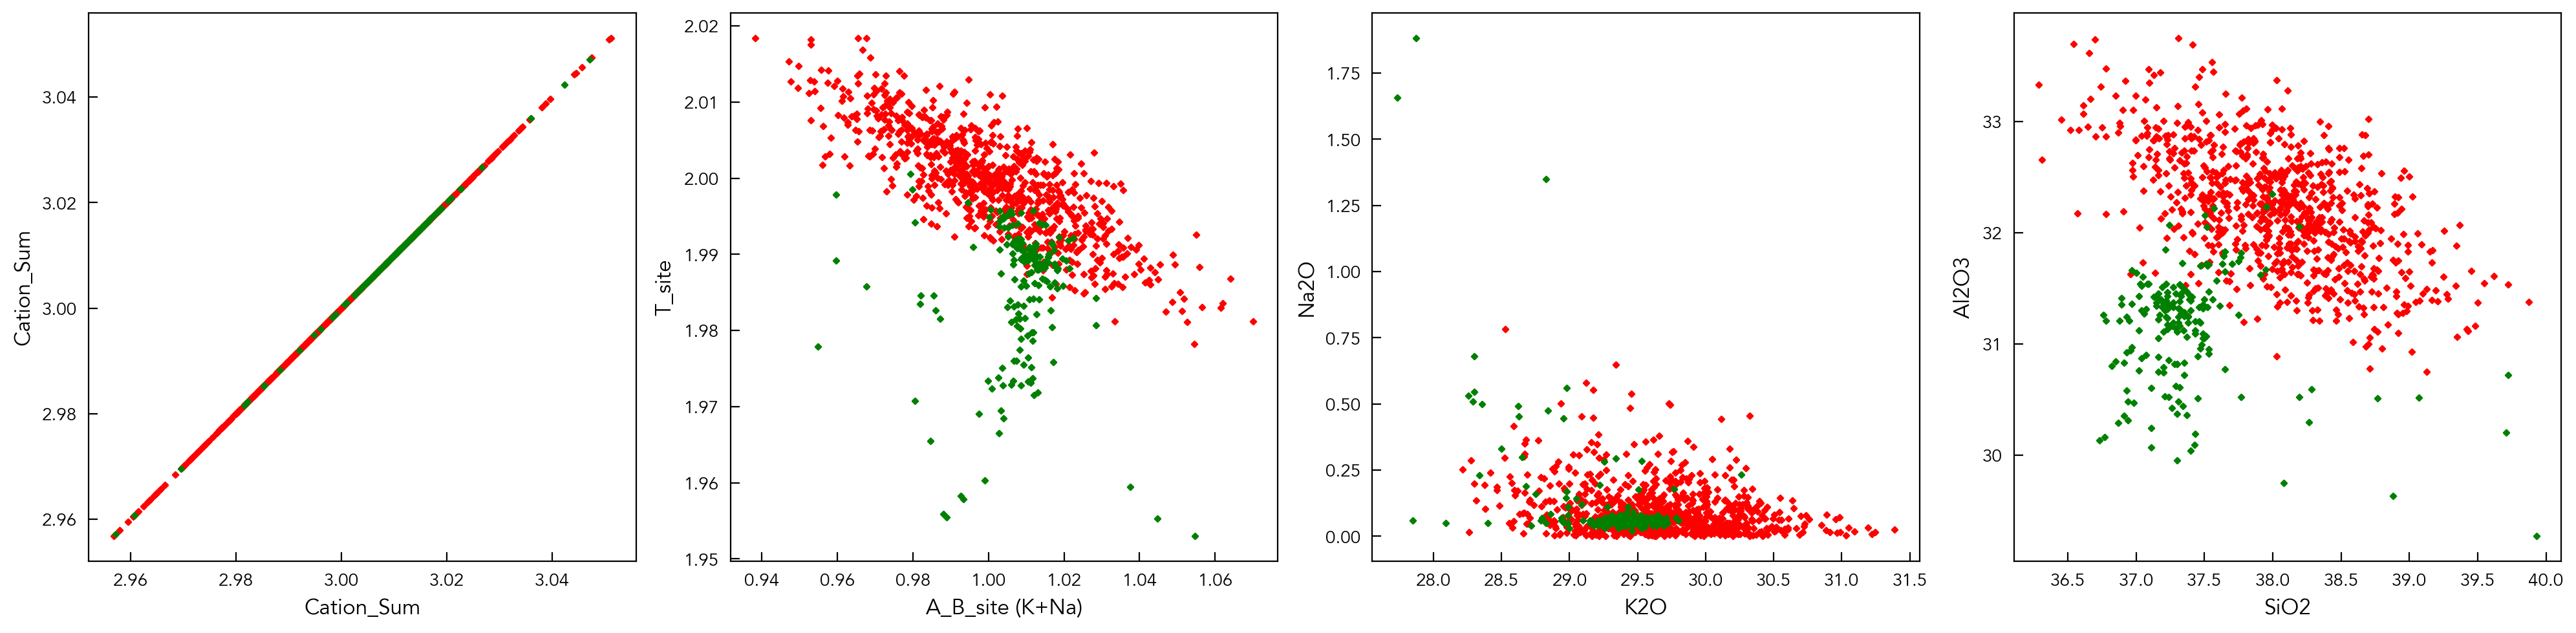

In [ ]:
# %% 

ks_endmembers = {
    "Ks": {"K":  1, "Al": 1, "Si": 1, "O": 4},
    "Ne": {"Na": 1, "Al": 1, "Si": 1, "O": 4}
}

ks_sites = {}
ks_minors = {} # no minors for pure KAlSiO4–NaAlSiO4

gen_ks = mm.SolidSolutionGenerator(
    endmembers = ks_endmembers,
    coupled_sites = ks_sites,
    oxygen_basis = 4,
    minor_elements = ks_minors,
    element_noise_scale = 0.02,
    min_site_fraction = 0.2,
    mixing_dist = "beta",
    mixing_params = {"a": 1, "b": 200},
)

# generate samples
df_ks = gen_ks.generate(n_samples=(1000-len(min_df_all[min_df_all.Mineral=='Kalsilite'])))
ks_calc_synth = mm.KalsiliteCalculator(df_ks)
ks_comp_synth = ks_calc_synth.calculate_components()
display(ks_comp_synth)
ks_comp_synth['Mineral'] = 'Kalsilite'

stats_ks = gen_ks.compare_distributions(base_df=ks_comp_filt, synth_df=ks_comp_synth, suptitle="Kalsilite")
display(stats_ks)

fig, ax = plt.subplots(1, 4, figsize = (20, 5))
ax = ax.flatten()
ax[0].scatter(ks_comp_synth['Cation_Sum'], ks_comp_synth['Cation_Sum'], s = 5, color = 'r')
ax[0].scatter(ks_comp_filt['Cation_Sum'], ks_comp_filt['Cation_Sum'], s = 5, color = 'g')
ax[0].set_xlabel('Cation_Sum')
ax[0].set_ylabel('Cation_Sum')
ax[1].scatter(ks_comp_synth['A_B_site'], ks_comp_synth['T_site'], s = 5, color = 'r')
ax[1].scatter(ks_comp_filt['A_B_site'], ks_comp_filt['T_site'], s = 5, color = 'g')
ax[1].set_xlabel('A_B_site (K+Na)')
ax[1].set_ylabel('T_site')
ax[2].scatter(ks_comp_synth['K2O'], ks_comp_synth['Na2O'], s = 5, color = 'r')
ax[2].scatter(ks_comp_filt['K2O'], ks_comp_filt['Na2O'], s = 5, color = 'g')
ax[2].set_xlabel('K2O')
ax[2].set_ylabel('Na2O')
ax[3].scatter(ks_comp_synth['SiO2'], ks_comp_synth['Al2O3'], s = 5, color = 'r')
ax[3].scatter(ks_comp_filt['SiO2'], ks_comp_filt['Al2O3'], s = 5, color = 'g')
ax[3].set_xlabel('SiO2')
ax[3].set_ylabel('Al2O3')
plt.tight_layout()
plt.show()

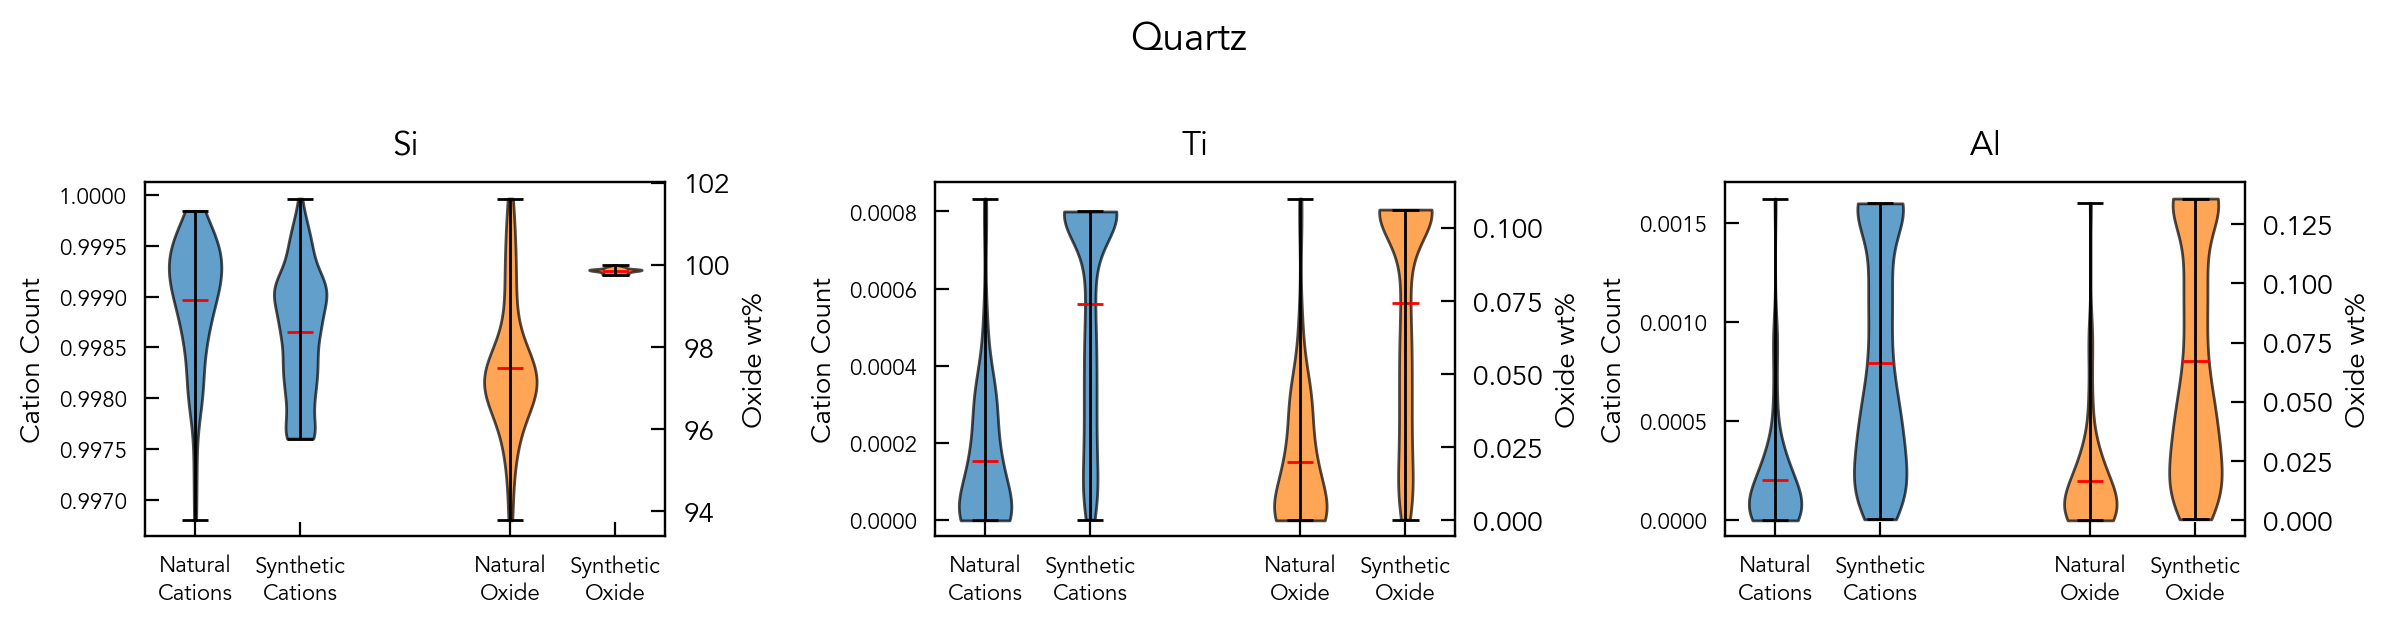

ks_stat       p_value  mean_base  mean_synth  std_base  std_synth
cation                                                                        
Si_cat_2ox  0.293824  9.882158e-06   0.998963    0.998648  0.000629   0.000614
Ti_cat_2ox  0.632216  7.489782e-27   0.000153    0.000560  0.000178   0.000279
Al_cat_2ox  0.566283  3.729976e-21   0.000202    0.000792  0.000281   0.000561

Sample Name       SiO2      TiO2     Al2O3  SiO2_mols  TiO2_mols  \
0          NaN  99.816146  0.048129  0.135725   1.661268   0.000603   
1          NaN  99.865053  0.106212  0.028735   1.662082   0.001331   
2          NaN  99.890227  0.043615  0.066158   1.662501   0.000547   
3          NaN  99.966440  0.025616  0.007944   1.663770   0.000321   
4          NaN  99.969018  0.020418  0.010563   1.663813   0.000256   

   Al2O3_mols   SiO2_ox   TiO2_ox  Al2O3_ox  Si_cat_2ox  Ti_cat_2ox  \
0    0.001331  3.322537  0.001206  0.003993    0.998437    0.000363   
1    0.000282  3.324165  0.002662  0.000845    0.998946    0.000800   
2    0.000649  3.325003  0.001093  0.001947    0.999087    0.000329   
3    0.000078  3.327539  0.000642  0.000234    0.999737    0.000193   
4    0.000104  3.327625  0.000512  0.000311    0.999753    0.000154   

   Al_cat_2ox Mineral  Source  Cation_Sum    T_site  
0    0.001600  Quartz     NaN    1.000400  1.000400  
1    0.000339  Quartz     NaN    1.000085  1.000085  
2    0.000780  Quartz     NaN    1.000195  1.000195  
3    0.000094  Quartz     NaN    1.000023  1.000023  
4    0.000125  Quartz     NaN    1.000031  1.000031

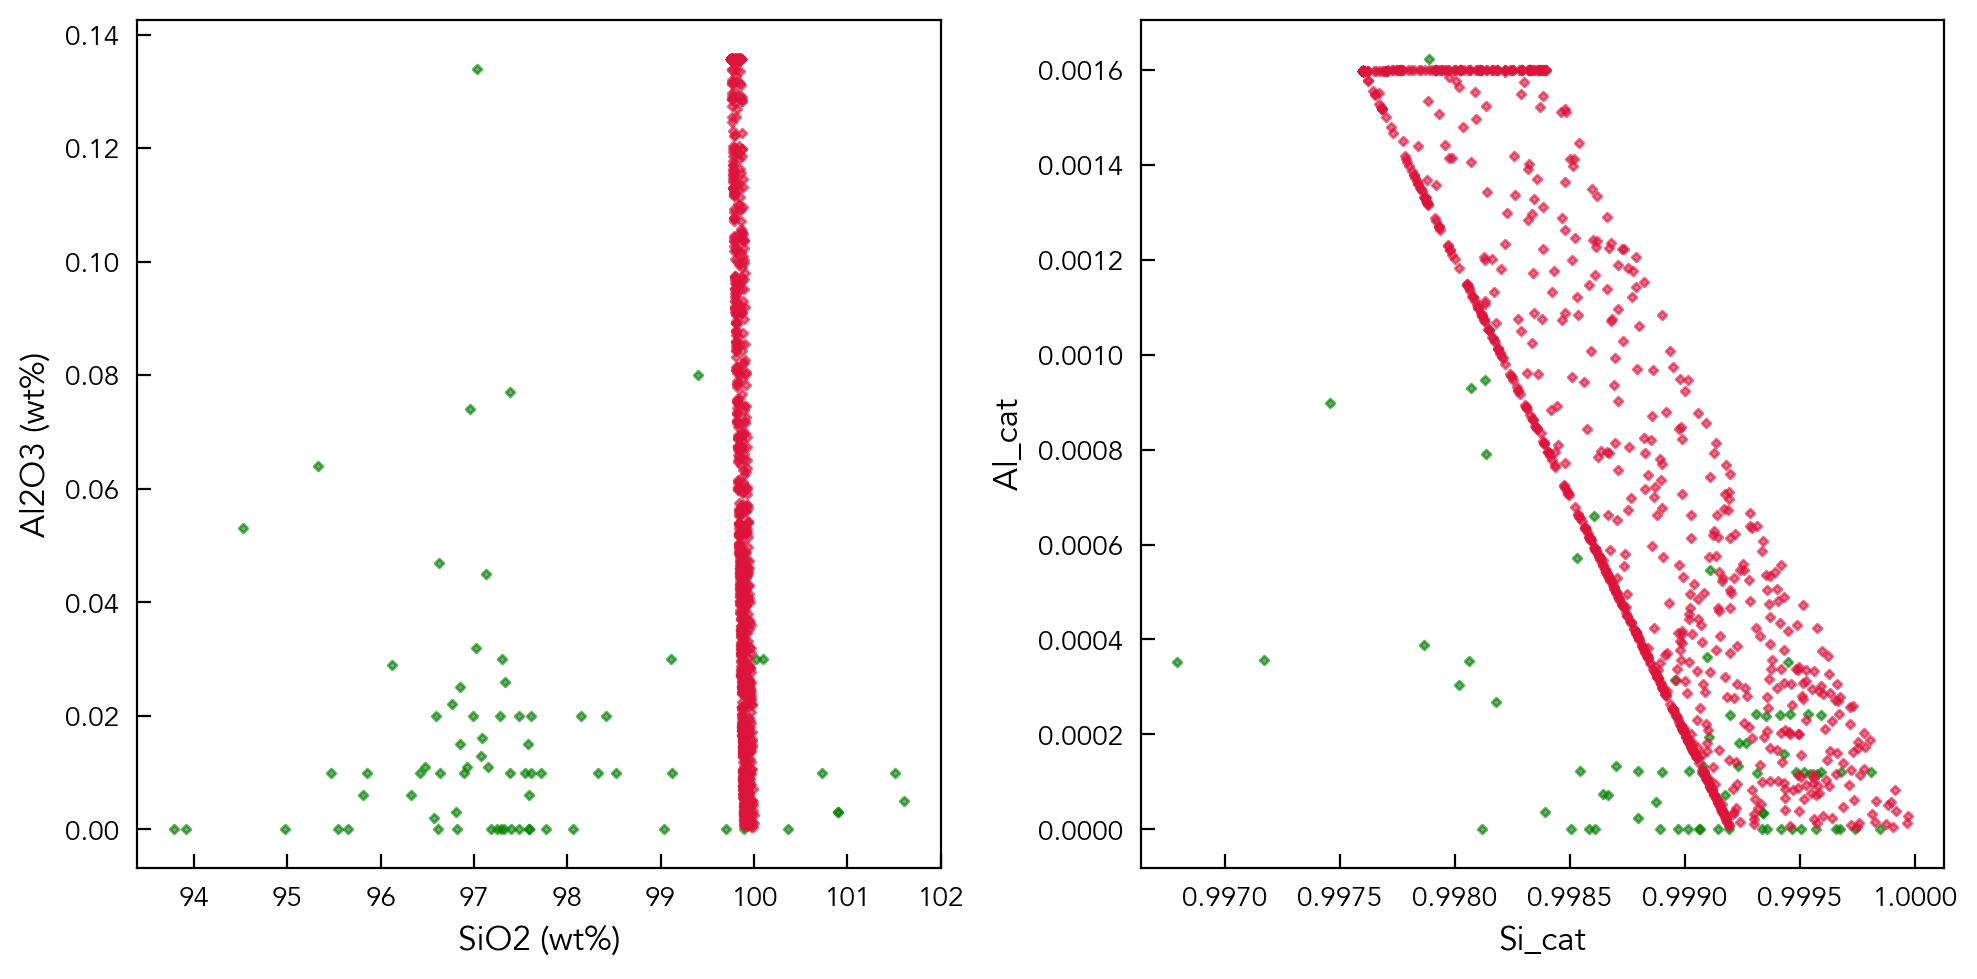

In [ ]:
# %% 

quartz_endmembers = {
    "Qz1": {"Si": 0.95, "O": 2},
    "Qz2": {"Si": 1, "O": 2}
}
quartz_coupled_sites = {}
# define minor elements for quartz
quartz_minors = {
    "Al": {"distribution": "exponential", "scale": 0.001, "max_fraction": 0.0016},
    "Ti": {"distribution": "exponential", "scale": 0.001, "max_fraction": 0.0008},
}

# run SolidSolutionGenerator with oxygen_basis = 2
gen_qz = mm.SolidSolutionGenerator(
    endmembers = quartz_endmembers,
    coupled_sites = quartz_coupled_sites,
    oxygen_basis = 2,
    minor_elements = quartz_minors,
    site_variation = 0.10,
    element_noise_scale = 0.05,
    min_site_fraction = 0.95,
    mixing_dist = "beta",
    mixing_params = {"a": 1, "b": 1},
    validate_fn = (lambda ox: True)
)

# generate synthetic quartz analyses
df_qz_synth = gen_qz.generate(n_samples=(1000-len(min_df_all[min_df_all.Mineral=='Quartz'])))

# compare synthetic and natural data 
stats_qz = gen_qz.compare_distributions(base_df = qz_comp_filt, synth_df = df_qz_synth, suptitle = "Quartz")
display(stats_qz)

# compute final formulas
qz_calc_synth = mm.QuartzCalculator(df_qz_synth)
qz_comp_synth = qz_calc_synth.calculate_components()
qz_comp_synth["Mineral"] = "Quartz"
display(qz_comp_synth.head())

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax = ax.flatten()
ax[0].scatter(qz_comp_filt["SiO2"], qz_comp_filt["Al2O3"], s=5, c="green", alpha=0.6)
ax[0].scatter(df_qz_synth["SiO2"], df_qz_synth["Al2O3"], s=5, c="crimson", alpha=0.6)
ax[0].set_xlabel("SiO2 (wt%)")
ax[0].set_ylabel("Al2O3 (wt%)")

ax[1].scatter(qz_comp_filt["Si_cat_2ox"], qz_comp_filt["Al_cat_2ox"], s=5, c="green", alpha=0.6)
ax[1].scatter(df_qz_synth["Si_cat_2ox"], df_qz_synth["Al_cat_2ox"], s=5, c="crimson", alpha=0.6)
ax[1].set_xlabel("Si_cat")
ax[1].set_ylabel("Al_cat")
plt.tight_layout()
plt.show()

Charge mismatch: 5.79 vs 6
Charge mismatch: 5.78 vs 6
Charge mismatch: 5.77 vs 6
Charge mismatch: 5.80 vs 6
Charge mismatch: 5.80 vs 6
Charge mismatch: 5.76 vs 6
Charge mismatch: 5.79 vs 6
Charge mismatch: 5.78 vs 6
Charge mismatch: 5.76 vs 6
Charge mismatch: 5.78 vs 6
Charge mismatch: 5.74 vs 6
Charge mismatch: 5.78 vs 6
Charge mismatch: 5.79 vs 6
Charge mismatch: 5.78 vs 6
Charge mismatch: 5.77 vs 6
Charge mismatch: 5.77 vs 6
Charge mismatch: 5.76 vs 6


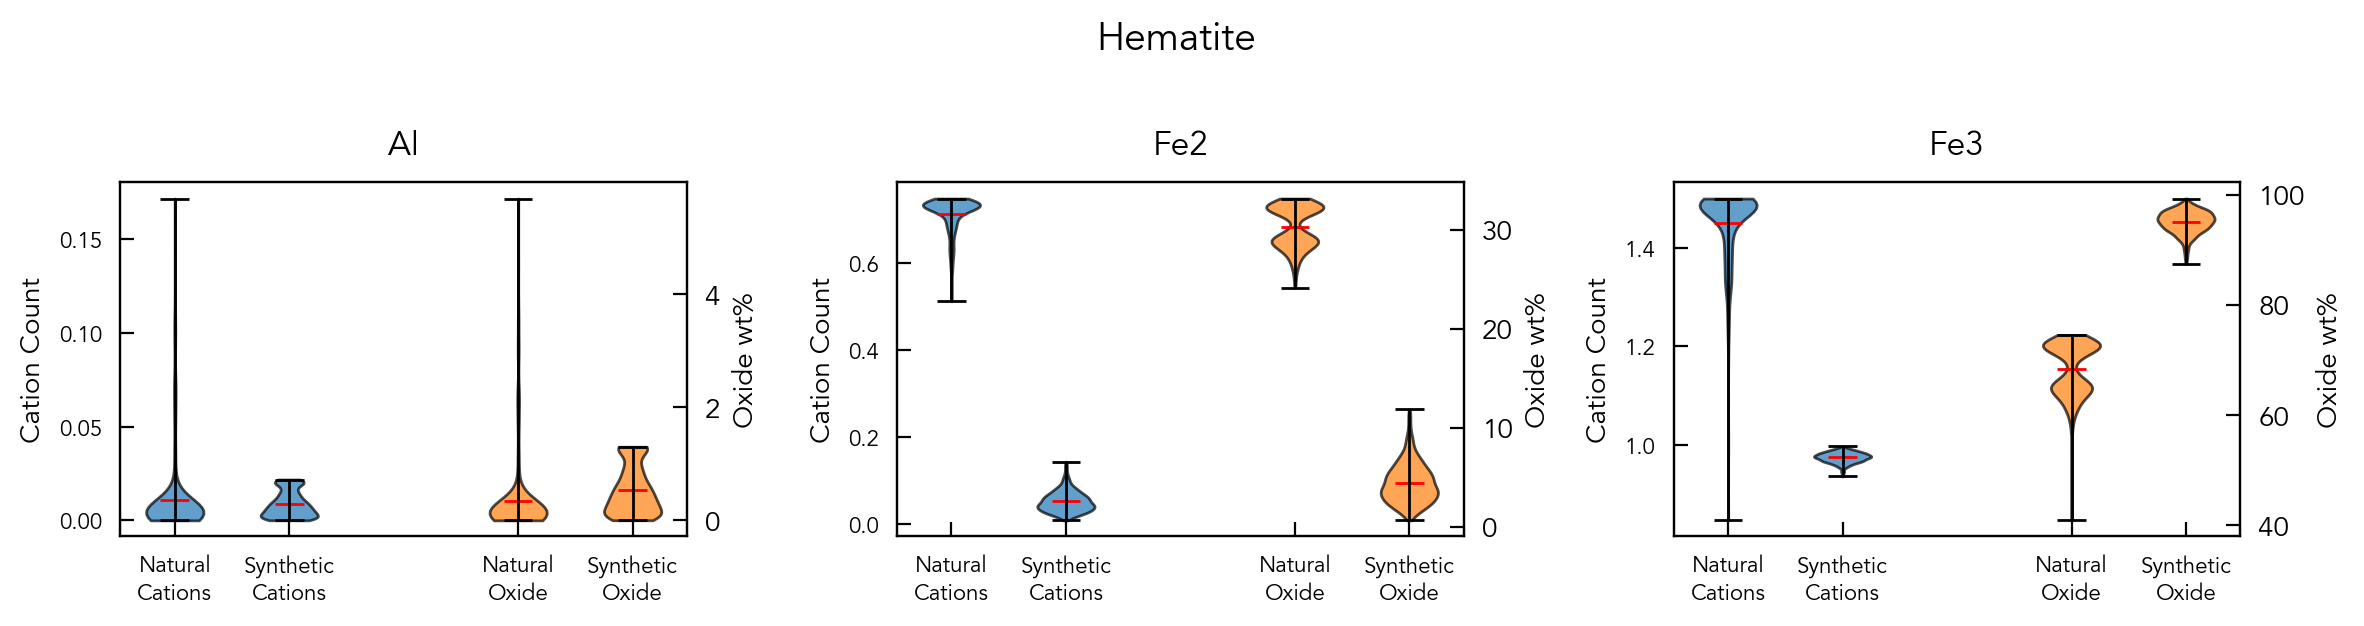

ks_stat        p_value  mean_base  mean_synth  std_base  \
cation                                                                  
Al_cat_3ox   0.231971   1.138514e-11   0.010761    0.008590  0.021768   
Fe2_cat_3ox  1.000000  2.805315e-288   0.714559    0.051241  0.039560   
Fe3_cat_3ox  0.997403  2.805315e-285   1.450361    0.974616  0.073035   

             std_synth  
cation                  
Al_cat_3ox    0.006784  
Fe2_cat_3ox   0.023658  
Fe3_cat_3ox   0.010190

['Al2O3', 'FeO', 'Fe2O3']


Sample Name     Al2O3        FeO      Fe2O3  Al2O3_mols  FeO_mols  \
0            NaN  0.632849  29.640914  66.862201    0.006207  0.412559   
1            NaN  0.938595  29.367324  66.721275    0.009205  0.408752   
2            NaN  1.292412  29.154317  66.782926    0.012676  0.405787   
3            NaN  0.145918  29.918811  66.726472    0.001431  0.416427   
4            NaN  0.009249  30.267866  67.288766    0.000091  0.421286   
..           ...       ...        ...        ...         ...       ...   
610          NaN  0.012105  30.029575  66.763604    0.000119  0.417969   
611          NaN  0.022022  30.142337  67.029755    0.000216  0.419539   
612          NaN  0.279050  29.886032  66.860745    0.002737  0.415971   
613          NaN  0.851557  29.418221  66.701857    0.008352  0.409460   
614          NaN  0.127224  30.020533  66.923412    0.001248  0.417843   

     Fe2O3_mols  Al2O3_ox    FeO_ox  Fe2O3_ox  ...  A_site_expanded    B_site  \
0      0.418705  0.018620  0.412559  1.256116  ...         0.733528  1.510981   
1      0.417823  0.027616  0.408752  1.253468  ...         0.725665  1.516223   
2      0.418209  0.038027  0.405787  1.254626  ...         0.716752  1.522165   
3      0.417855  0.004293  0.416427  1.253566  ...         0.746158  1.502561   
4      0.421376  0.000272  0.421286  1.264129  ...         0.749758  1.500161   
..          ...       ...       ...       ...  ...              ...       ...   
610    0.418088  0.000356  0.417969  1.254263  ...         0.749681  1.500213   
611    0.419754  0.000648  0.419539  1.259263  ...         0.749421  1.500386   
612    0.418696  0.008210  0.415971  1.256088  ...         0.742686  1.504876   
613    0.417701  0.025055  0.409460  1.253103  ...         0.727878  1.514748   
614    0.419089  0.003743  0.417843  1.257266  ...         0.746659  1.502227   

     A_B_site     Fe_Ti  Fe3_prop  XHem  XIlm  XMnIlm  XGk  XSum  
0    2.244509  2.222438  0.669944   1.0   0.0     0.0  0.0   1.0  
1    2.241888  2.209203  0.671526   1.0   0.0     0.0  0.0   1.0  
2    2.238917  2.194139  0.673333   1.0   0.0     0.0  0.0   1.0  
3    2.248719  2.243591  0.667427   1.0   0.0     0.0  0.0   1.0  
4    2.249919  2.249596  0.666715   1.0   0.0     0.0  0.0   1.0  
..        ...       ...       ...   ...   ...     ...  ...   ...  
610  2.249894  2.249468  0.666730   1.0   0.0     0.0  0.0   1.0  
611  2.249807  2.249036  0.666781   1.0   0.0     0.0  0.0   1.0  
612  2.247562  2.237789  0.668116   1.0   0.0     0.0  0.0   1.0  
613  2.242626  2.212933  0.671080   1.0   0.0     0.0  0.0   1.0  
614  2.248886  2.244427  0.667328   1.0   0.0     0.0  0.0   1.0  

[615 rows x 27 columns]

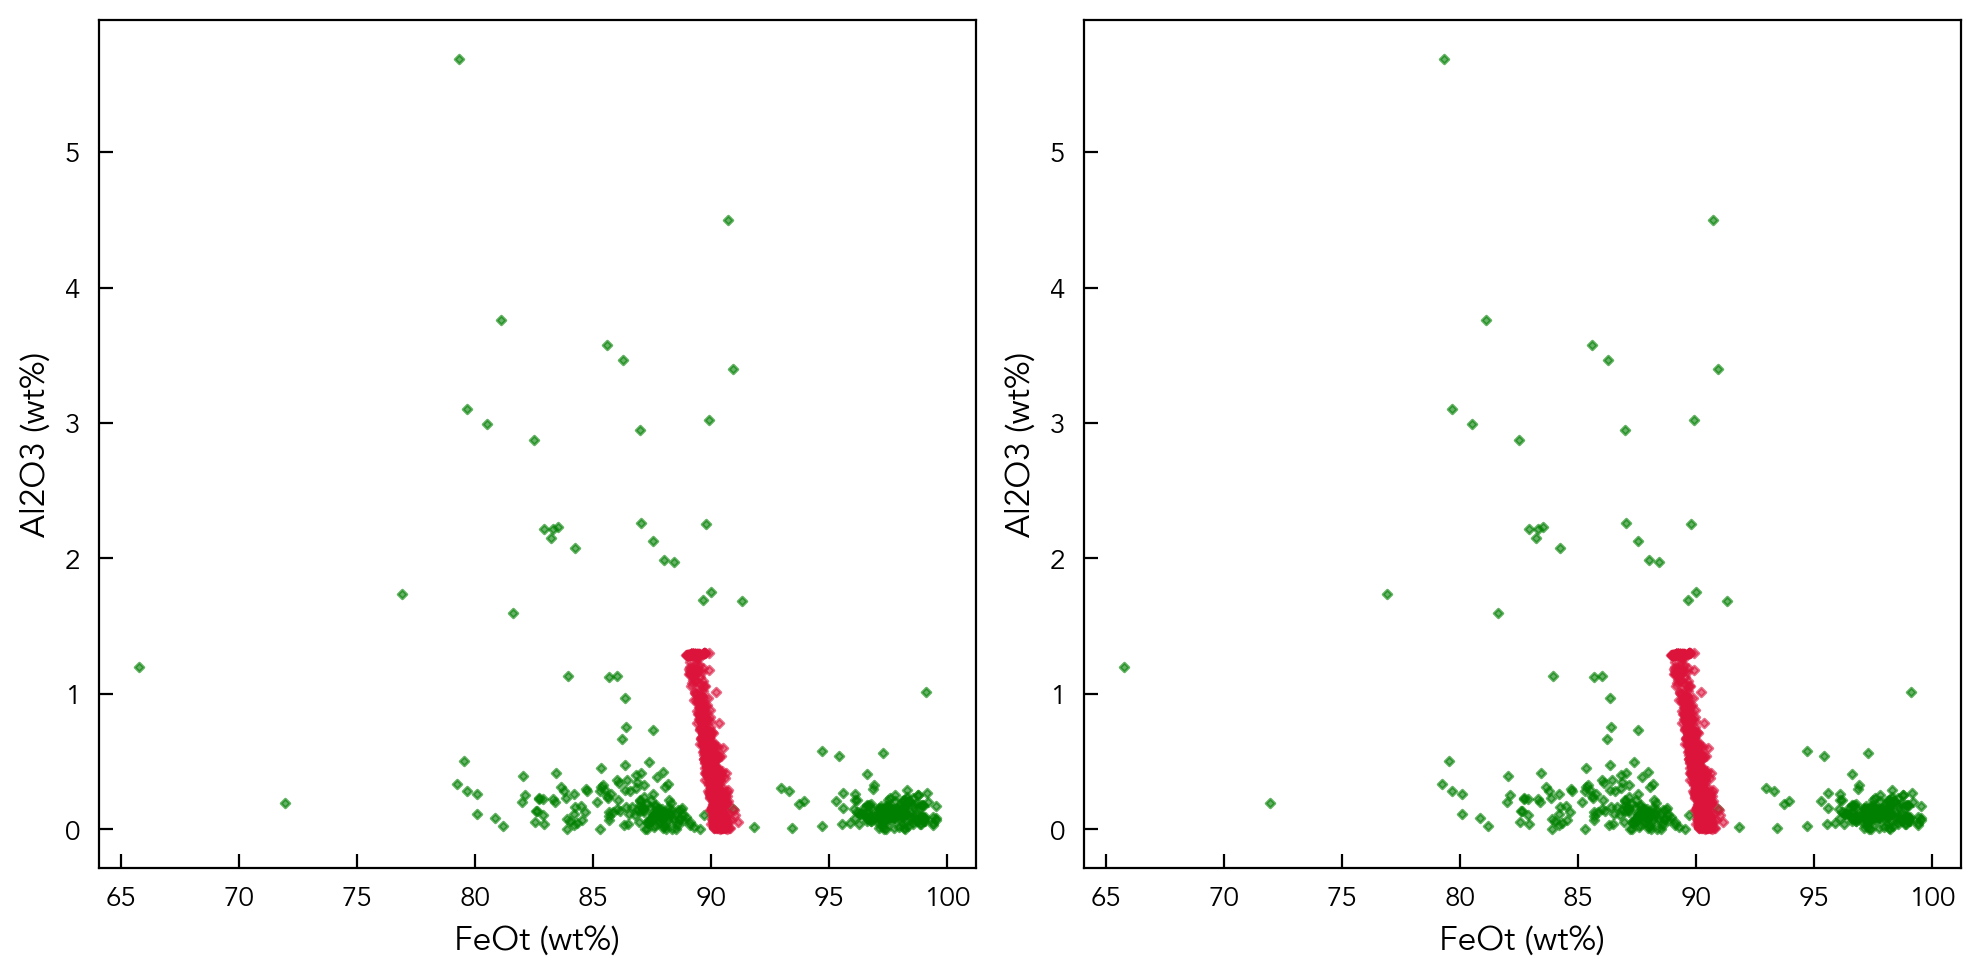

In [ ]:
# %% 

# game by faking two endmembers, mixed with beta distribution
hematite_endmembers = {
    "Hem_fe3": {"Fe3": 2, "O": 3},
    "Hem_fe2": {"Fe2": 2, "O": 3}
}
# no coupled_sites needed since we are just mixing these two endmembers
hematite_coupled_sites = {}

# define Al as minor element
hematite_minors = {
    "Al": {"distribution": "exponential", "scale": 0.01, "max_fraction": 0.02}
}

# run SolidSolutionGenerator with oxygen_basis = 3
gen_hem = mm.SolidSolutionGenerator(
    endmembers = hematite_endmembers,
    coupled_sites = hematite_coupled_sites,
    oxygen_basis = 3,
    minor_elements = hematite_minors,
    site_variation = 0.01,
    element_noise_scale = 0.05,
    min_site_fraction = 0.95,
    mixing_dist = "beta",
    mixing_params = {"a": 5, "b": 95}, # mean Fe2‐fraction ≈ 5/(5+95)=0.05
    validate_fn = (lambda ox: True) # keep all oxide‐wt variants
)

# generate synthetic hematite analyses
df_hem_synth = gen_hem.generate(n_samples=(1000-len(min_df_all[min_df_all.Mineral=='Hematite'])))
fe_conversion = 159.688 / (2 * 71.8464)
df_hem_synth["FeOt"] = (df_hem_synth["FeO"] + df_hem_synth["Fe2O3"] / fe_conversion)

# compare synthetic vs. natural
stats_hem = gen_hem.compare_distributions(base_df = hem_comp_filt, synth_df = df_hem_synth, suptitle = "Hematite")
display(stats_hem)

hem_calc_synth = mm.OxideCalculator(df_hem_synth[["FeOt", "Al2O3"]])
hem_comp_synth = hem_calc_synth.calculate_components()
hem_comp_synth["Mineral"] = "Hematite"
display(hem_comp_synth)
hem_comp_synth["FeOt"] = (hem_comp_synth["FeO"] + hem_comp_synth["Fe2O3"] / fe_conversion)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax = ax.flatten()
ax[0].scatter(hem_comp_filt["FeOt"], hem_comp_filt["Al2O3"], s=5, c="green", alpha=0.6, label="Natural")
ax[0].scatter(hem_comp_synth["FeOt"], hem_comp_synth["Al2O3"], s=5, c="crimson", alpha=0.6, label="Synthetic")
ax[0].set_xlabel("FeOt (wt%)")
ax[0].set_ylabel("Al2O3 (wt%)")

ax[1].scatter(hem_comp_filt["FeOt"], hem_comp_filt["Al2O3"], s=5, c="green", alpha=0.6, label="Natural")
ax[1].scatter(hem_comp_synth["FeOt"], hem_comp_synth["Al2O3"], s=5, c="crimson", alpha=0.6, label="Synthetic")
ax[1].set_xlabel("FeOt (wt%)")
ax[1].set_ylabel("Al2O3 (wt%)")
plt.tight_layout()
plt.show()

In [ ]:
# %% 

min_df_all_synth = pd.concat([amp_comp_filt, ap_comp_filt, bt_comp_filt, cal_comp_filt, chl_comp_filt,
                              cpx_comp_filt, ep_comp_filt, gt_comp_filt, hem_comp_filt, hem_comp_synth,
                              ilm_comp_filt, ks_comp_filt, ks_comp_synth, ksp_comp_filt, lc_comp_filt,
                              mt_comp_filt, ml_comp_filt, ms_comp_filt, ne_comp_filt, ol_comp_filt,
                              opx_comp_filt, pl_comp_filt, qz_comp_filt, qz_comp_synth, rt_comp_filt,
                              srp_comp_filt, sp_comp_filt, tit_comp_filt, trm_comp_filt,
                              zr_comp_filt, zr_comp_synth, gl_df], axis=0)
display(min_df_all_synth)
display(min_df_all_synth.Mineral.value_counts())

oxideslab = ['Sample Name', 'SiO2', 'TiO2', 'Al2O3', 'FeOt', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'Cr2O3', 'Mineral']
min_df_lim_synth = min_df_all_synth[oxideslab]
min_df_lim_synth.to_csv('../Training_Data/min_df_v2_clean_synth.csv', index=False)

Sample Name   SiO2  TiO2  Al2O3   FeOt   MnO    MgO  \
0                           Z2099  42.96  1.80  14.33   4.07  0.07  17.39   
1                           Z2070  43.03  2.39  13.35   4.09  0.06  17.01   
2                           Z2073  42.95  3.02  14.12   4.35  0.06  17.53   
3                           Z2067  43.01  4.65  12.83   4.39  0.07  17.14   
4                           Z2068  42.13  4.87  12.15   4.08  0.05  16.42   
...                           ...    ...   ...    ...    ...   ...    ...   
9395                     55_055 z  71.02  0.53   8.44   5.79  0.22    NaN   
9396           2002S_ 2002/3S-11b  43.30  2.28  18.57   7.91  0.25   3.18   
9397         Ha3-3/06F27_cpx2_mib  51.65  0.44  18.52  10.30  0.25   3.94   
9398  Astroni 1_CF69_cpx_109_mi_1  58.26  0.59  16.49   3.65  0.19   0.41   
9399           CM02-2_03-039-10.1  49.88  1.30  17.81   9.40  0.13   7.87   

        CaO  Na2O   K2O  ...  Zr_cat_4ox  Hf_Zr  HfO2  HfO2_mols  HfO2_ox  \
0     12.03  3.10  0.03  ...         NaN    NaN   NaN        NaN      NaN   
1     11.71  2.97  0.05  ...         NaN    NaN   NaN        NaN      NaN   
2     12.02  3.04  0.07  ...         NaN    NaN   NaN        NaN      NaN   
3     12.14  2.88  0.03  ...         NaN    NaN   NaN        NaN      NaN   
4     11.89  2.75  0.02  ...         NaN    NaN   NaN        NaN      NaN   
...     ...   ...   ...  ...         ...    ...   ...        ...      ...   
9395   0.45  5.29  4.18  ...         NaN    NaN   NaN        NaN      NaN   
9396  14.24  3.59  2.46  ...         NaN    NaN   NaN        NaN      NaN   
9397   9.08  1.48  0.29  ...         NaN    NaN   NaN        NaN      NaN   
9398   2.13  4.47  7.98  ...         NaN    NaN   NaN        NaN      NaN   
9399  11.11  3.08  1.69  ...         NaN    NaN   NaN        NaN      NaN   

      Hf_cat_4ox  Hf_per  Na2O + K2O  TAS  \
0            NaN     NaN         NaN  NaN   
1            NaN     NaN         NaN  NaN   
2            NaN     NaN         NaN  NaN   
3            NaN     NaN         NaN  NaN   
4            NaN     NaN         NaN  NaN   
...          ...     ...         ...  ...   
9395         NaN     NaN        9.47    R   
9396         NaN     NaN        6.05   U1   
9397         NaN     NaN        1.77   Bs   
9398         NaN     NaN       12.45   Ph   
9399         NaN     NaN        4.77   Ba   

                                       Rocknames  
0                                            NaN  
1                                            NaN  
2                                            NaN  
3                                            NaN  
4                                            NaN  
...                                          ...  
9395                         [Rhyolite, Granite]  
9396                     [Tephrite, Foid Gabbro]  
9397  [Subalkalic \nBasalt, Subalkalic \nGabbro]  
9398                   [Phonolite, Foid Syenite]  
9399        [Alkalic \nBasalt, Alkalic \nGabbro]  

[115722 rows x 398 columns]

Mineral
Olivine          22015
Plagioclase      18312
Clinopyroxene    10910
Glass             9391
Titanite          8051
KFeldspar         6011
Orthopyroxene     5770
Magnetite         3597
Biotite           3230
Amphibole         3172
Serpentine        2588
Ilmenite          2016
Garnet            2004
Spinel            1743
Apatite           1735
Rutile            1719
Leucite           1528
Chlorite          1325
Epidote           1264
Muscovite         1153
Melilite          1136
Tourmaline        1021
Nepheline         1020
Calcite           1011
Quartz            1000
Hematite          1000
Zircon            1000
Kalsilite         1000
Name: count, dtype: int64